In [1]:
from collections import Counter
import numpy as np
import torch
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.io as sio

In [2]:
# Set the seed for reproducibility
np.random.seed(42)
torch.manual_seed(42)

In [3]:
# Load the Caltech Silouttes dataset
mat_16 = sio.loadmat('data/caltech101_silhouettes_16.mat')
mat_28 = sio.loadmat('data/caltech101_silhouettes_28.mat')  # TODO: can try with 28 by 28 images 
# TODO: see if the results are similar or differ with 16 by 16 images or 28 by 28 images

In [4]:
classnames = []
selected_images = []
selected_labels = []

# Data with 16x16 images
dim = 16
images = mat_16['X']
labels = mat_16['Y']

# # Data with 28x28 images
# dim = 28
# images = mat_28['X']
# labels = mat_28['Y']

# Get classnames
for i in range(len(mat_28["classnames"][0])):
    classnames.append(mat_28["classnames"][0][i][0])

In [5]:
print(labels[0])    # contains the labels with their occurrence count
print("Number of images: ", len(images))
print("Number of labels: ", len(labels[0]))

# Count the number of occurrences of each label
label_counts = Counter(labels[0])
print("Label occurrences:", label_counts)
print("Classnames: ", classnames)

[  1   1   1 ... 101 101 101]
Number of images:  8641
Number of labels:  8641
Label occurrences: Counter({1: 798, 5: 798, 2: 435, 3: 435, 95: 235, 4: 200, 13: 128, 20: 123, 56: 114, 24: 107, 48: 100, 47: 99, 14: 98, 17: 91, 51: 88, 64: 87, 55: 86, 87: 86, 93: 86, 16: 85, 40: 85, 82: 84, 91: 84, 76: 82, 52: 80, 58: 78, 59: 78, 66: 76, 36: 75, 94: 75, 27: 73, 28: 70, 35: 68, 26: 67, 42: 67, 32: 66, 61: 66, 34: 65, 37: 64, 39: 64, 54: 64, 85: 64, 89: 64, 41: 63, 80: 63, 23: 62, 57: 61, 101: 60, 22: 59, 77: 59, 88: 59, 97: 59, 75: 57, 83: 57, 99: 56, 6: 55, 67: 55, 10: 54, 31: 54, 50: 54, 38: 53, 73: 53, 30: 51, 46: 51, 29: 50, 78: 49, 92: 49, 18: 47, 21: 47, 25: 47, 70: 47, 11: 46, 9: 45, 43: 45, 72: 45, 86: 45, 15: 43, 19: 43, 33: 43, 62: 43, 7: 42, 8: 42, 49: 42, 60: 41, 63: 40, 79: 40, 69: 39, 81: 39, 71: 38, 100: 38, 96: 37, 68: 35, 84: 35, 90: 35, 44: 34, 45: 34, 74: 34, 98: 34, 12: 32, 65: 32, 53: 31})
Classnames:  ['Airplanes Side 2', 'Faces 2', 'Faces 3', 'Leopards', 'Motorbikes 1

In [6]:
import os

# Define the directory to search
directory = "./images"

# Iterate through files in the directory
for dir in os.listdir(directory):
    for filename in os.listdir(os.path.join(directory, dir)):
        # Check if filename ends with ".png" and is a file
        if filename.endswith(".png"):
            # Construct the full path
            filepath = os.path.join(directory, dir, filename)
            os.remove(filepath)

Classname: sea horse, Index: 83
Desired indices for sea horse: [7383 7384 7385 7386 7387 7388 7389 7390 7391 7392 7393 7394 7395 7396
 7397 7398 7399 7400 7401 7402 7403 7404 7405 7406 7407 7408 7409 7410
 7411 7412 7413 7414 7415 7416 7417 7418 7419 7420 7421 7422 7423 7424
 7425 7426 7427 7428 7429 7430 7431 7432 7433 7434 7435 7436 7437 7438
 7439]
Classname: headphone, Index: 49
Desired indices for headphone: [5403 5404 5405 5406 5407 5408 5409 5410 5411 5412 5413 5414 5415 5416
 5417 5418 5419 5420 5421 5422 5423 5424 5425 5426 5427 5428 5429 5430
 5431 5432 5433 5434 5435 5436 5437 5438 5439 5440 5441 5442 5443 5444]
Number of images selected:  4


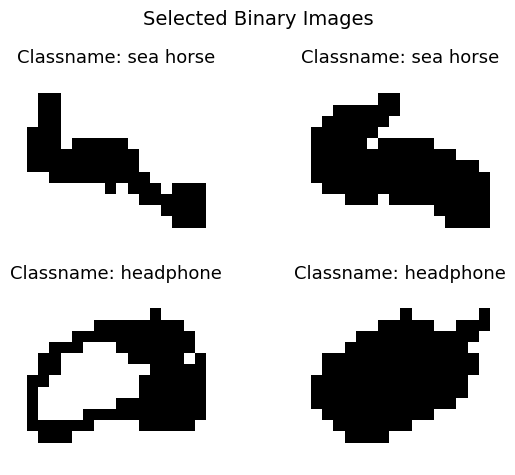

In [7]:
# Multiple labels, One or more images per label
num_labels = 2
num_images_per_label = 2

"""
methods	
	experiment with dim 16
		see point of convergence?
		try with images that are not similar
	3, 3: for small hyperparams that lead to convergence, changes along sparsity and magnitude don't have an affect
	10, 1: convergence
	5, 1: poor convergence
    2,2 is okay with some unexplained behavior
    
    different possibilities for the retrieval:
    - is matching
    - is flipped
    - is not matching
    - is a fix of 2 or more inputs
    - a dead state

"""

desired_classnames = ['sea horse', 'headphone', 'electric guitar', 'ant', 'bass', 'Leopards', 'accordion', 'beaver', 'binocular', 'bonsai']
# desired_classnames = ['electric guitar', 'ant', 'bass', 'Leopards', 'accordion', 'beaver', 'binocular', 'bonsai', 'brain', 'buddha']
# desired_classnames = ['binocular', 'starfish', 'flamingo', 'brontosaurus', 'accordion', 'beaver', 'binocular', 'bonsai', 'brain', 'buddha']

# Select up to the number of labels
desired_classnames = desired_classnames[:num_labels]

# Check if the number of labels match the number of desired classnames
assert num_labels == len(desired_classnames), "The number of labels must match the number of desired classnames."

# Check if the desired classnames are in the classnames
assert all(classname in classnames for classname in desired_classnames), "All desired classnames must be in the classnames."

# Select the images for the number of labels and images per label
classname_indices = []
desired_indices = []

for i, classname in enumerate(desired_classnames):
    classname_indices.append(classnames.index(classname) + 1)   # FIXME: indexing is off for nosiy inputs
    print(f"Classname: {classname}, Index: {classname_indices[i]}")
    print(f"Desired indices for {classname}: {np.where(labels[0] == classname_indices[i])[0]}")
    desired_indices.append(np.where(labels[0] == classname_indices[i])[0])

# print(labels[0])
# print(classname_indices)
# print(desired_indices)
# print(len(desired_indices))

fig, ax = plt.subplots(num_labels, num_images_per_label)
fig.suptitle("Selected Binary Images", fontsize=14)

if num_labels == 1:
    ax = np.expand_dims(ax, axis=0)

# Get and show the selected images
for i in range(num_labels):
    for j in range(num_images_per_label):
        image = images[desired_indices[i][j]].reshape(dim, dim)
        selected_images.append(torch.Tensor(image))
        selected_labels.append(desired_classnames[i])
        
        if num_images_per_label == 1:
            # if j == 0:
            ax[i].set_title(f"Classname: {desired_classnames[i]}", fontsize=13)
            ax[i].imshow(image, cmap='gray')
            ax[i].axis('off')
        else:
            # if j == 0:
            ax[i, j].set_title(f"Classname: {desired_classnames[i]}", fontsize=13)
            ax[i, j].imshow(image, cmap='gray')
            ax[i, j].axis('off')

print("Number of images selected: ", min(num_labels * num_images_per_label, len(selected_images)))
# plt.title("Selected Binary Images", fontsize=14)
plt.tight_layout()
plt.savefig('./images/init/selected_images.png')
plt.show()
plt.close(fig)

In [8]:
# Convert input image to binary patterns with values 1 and -1
binary_inputs = []

for i in range(len(selected_images)):
    binary_input = torch.where(selected_images[i] > 0, torch.tensor(1), torch.tensor(-1))
    binary_input = binary_input.view(dim, dim)
    binary_inputs.append(binary_input)

# print(binary_inputs[0])
# print(len(binary_inputs[0]))

Number of selected images:  4
Unique values in weight matrix:  tensor([-1.0000, -0.5000,  0.0000,  0.5000,  1.0000])


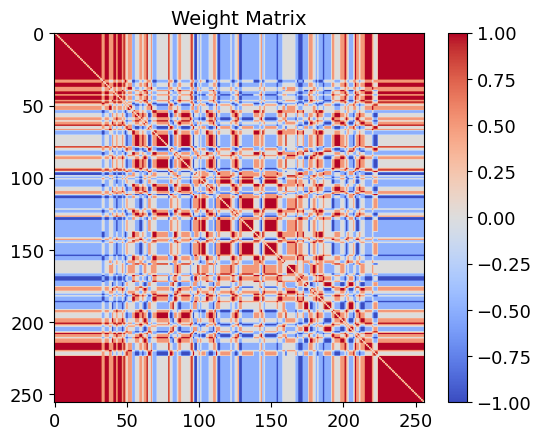

In [9]:
# From the selected images, build the weight matrix
print("Number of selected images: ", len(selected_images))

num_neurons = dim**2
weight = torch.zeros(num_neurons, num_neurons)
num_inputs = len(selected_images)

# Apply Hopfield weight matrix formula
for input in binary_inputs:
	flattened_binary_input = torch.flatten(input).unsqueeze(dim=1)
	weight += torch.matmul(flattened_binary_input, flattened_binary_input.T)

# No recurrent weights
weight.fill_diagonal_(0)

# Normalize weight values
weight /= num_inputs

print("Unique values in weight matrix: ", torch.unique(weight))

weight_map = plt.imshow(weight, cmap=cm.coolwarm)
color_bar = plt.colorbar(weight_map)
color_bar.ax.tick_params(labelsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title("Weight Matrix", fontsize=14)
plt.savefig('./images/init/init_weight_matrix.png')
plt.show()

In [10]:
# Model parameters
removed_percents = [25, 50, 75]
bias = torch.zeros(weight.size(0)).float()	# was 15
num_iterations = 50

length of removed percents 3
length of binary inputs 4
classname indices:  [83 83 49 49]


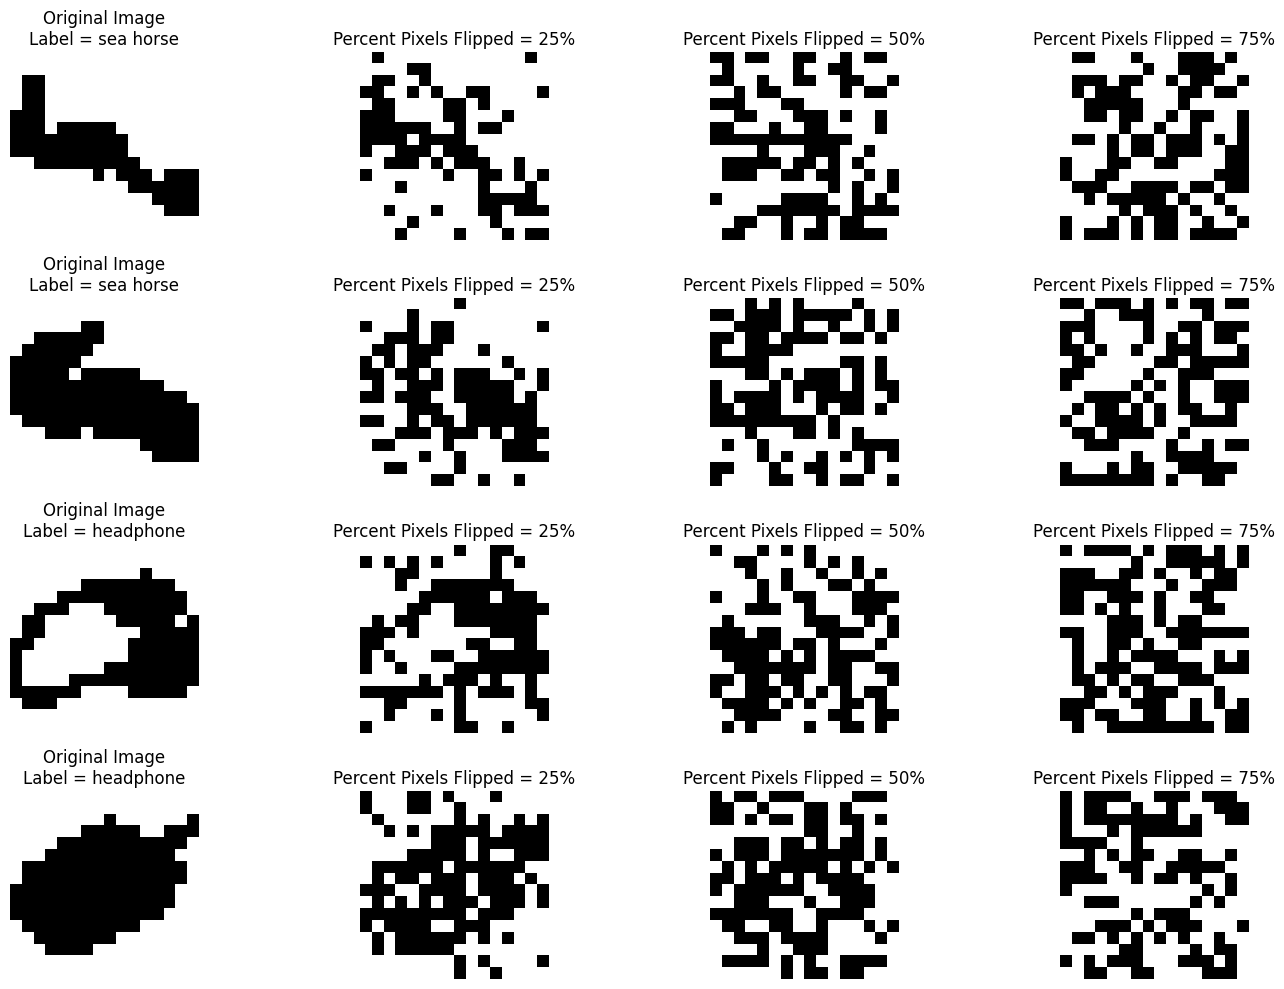

In [11]:
def flip_pixels(pattern, percent):
    pattern = torch.Tensor(pattern)
    num_pixels = pattern.numel()
    num_pixels_to_remove = int(num_pixels * percent / 100)
    indices_to_remove = np.random.choice(range(num_pixels), num_pixels_to_remove)
    noisy_pattern = pattern.clone()
    flattened_noisy_pattern = noisy_pattern.flatten()
    flattened_noisy_pattern[indices_to_remove] *= -1
    
    return flattened_noisy_pattern

noisy_inputs = []

# Get noisy inputs
for i in range(len(binary_inputs)):
    for j in range(len(removed_percents)):
        noisy_inputs.append(flip_pixels(binary_inputs[i], removed_percents[j]))

def plot_noisy_inputs(binary_inputs, noisy_inputs, removed_percents, classnames, classname_indices, num_images_per_label):
    num_rows = len(binary_inputs)
    num_cols = len(removed_percents) + 1
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 10))
    print("length of removed percents", len(removed_percents))
    print("length of binary inputs", len(binary_inputs))

    classname_indices = np.repeat(classname_indices, num_images_per_label)
    print("classname indices: ", classname_indices)
    
    # Ensure axs is always 2D
    if num_rows == 1 or num_cols == 1:
        axs = np.atleast_2d(axs).reshape(num_rows, num_cols)
    
    for i in range(num_rows):
        for j in range(num_cols):
            # Plot the binary inputs
            if j == 0:
                classname = classnames[classname_indices[i] - 1]
                axs[i, j].set_title(f'Original Image\nLabel = {classname}', fontsize=12)
                axs[i, j].imshow(binary_inputs[i].reshape(dim, dim), cmap='gray')
                axs[i, j].axis('off')
            # Plot the noisy inputs
            else:
                idx = i * len(removed_percents) + j - 1
                axs[i, j].set_title(f'Percent Pixels Flipped = {removed_percents[j - 1]}%', fontsize=12)
                axs[i, j].imshow(noisy_inputs[idx].reshape(dim, dim), cmap='gray')
                axs[i, j].axis('off')

    plt.tight_layout()
    plt.savefig('./images/init/noisy_inputs.png')
    plt.show()
    plt.close(fig)

plot_noisy_inputs(binary_inputs, noisy_inputs, removed_percents, classnames, classname_indices, num_images_per_label)

In [12]:
class HopfieldNetwork():
    def __init__(self, num_neurons, weight, bias):
        self.num_neurons = num_neurons
        self.weight = weight
        self.bias = bias
        self.is_async_update = True
        self.energy_values = []

    def compute_energy(self, state) -> float:
        return -0.5 * torch.dot(state.T, torch.matmul(self.weight, state)) - torch.dot(self.bias, state)

    def update(self, input_pattern, num_iter) -> torch.Tensor:
        curr_state = input_pattern.clone()
        curr_state = curr_state.float()
        curr_energy = self.compute_energy(curr_state)
        
        # Asychronous update rule
        if self.is_async_update:
            for i in range(num_iter):       # Can test with different update orderings
                neuron_indices = list(range(self.num_neurons))
                np.random.shuffle(neuron_indices)
                for idx in neuron_indices:
                    new_state = torch.sign(torch.matmul(self.weight[idx], curr_state) - self.bias[idx])
                    curr_state[idx] = new_state
                
                # Check convergence condition
                new_energy = self.compute_energy(curr_state)
                self.energy_values.append(new_energy)
                
                if curr_energy == new_energy:
                    # print(f"Updated for {i + 1} iterations")
                    # print("curr energy:", curr_energy)
                    # print("new energy:", new_energy)
                    return curr_state
                    
                curr_energy = new_energy
        # Sychronous update rule
        else:
            for i in range(num_iter):
                new_state = torch.sign(torch.matmul(self.weight, curr_state) - self.bias)
                curr_state = new_state
                
                # Check convergence
                new_energy = self.compute_energy(curr_state)
                
                if curr_energy == new_energy:
                    # print(f"Updated for {i + 1} iterations")
                    # print("curr energy:", curr_energy)
                    # print("new energy:", new_energy)
                    return curr_state

                curr_energy = new_energy
        
        # print(f"Updated for {i + 1} iterations")
        # print("curr energy:", curr_energy)
        # print("new energy:", new_energy)
        
        return curr_state

    def retrieve(self, dim, weight, binary_inputs, noisy_inputs, removed_percents, num_iter, async_update, pruning, show_plot) -> list:
        # self.weight = weight
        self.pruning_method = None
        
        # If there is a valid pruning method, plot with that pruning
        if pruning is not None:
            self.pruning_method = next(iter(pruning))
            self.pruning_val = pruning[f'{self.pruning_method}']
        
        # Select pruning method
        if self.pruning_method not in ["sparse", "magnitude"]:
            self.pruning_method = "retrieved"

        retrieved_str = ""
        plot_name = self.pruning_method
        
        if self.pruning_method == "sparse":
            retrieved_str = f"Sparsity = {self.pruning_val}"
            plot_name += "_" + str(self.pruning_val)
        elif self.pruning_method == "magnitude":
            retrieved_str = f"Magnitude = {self.pruning_val:.2f}"
            plot_name += "_" + str(self.pruning_val)

        retrieved_patterns = []
    
        # Process the noisy inputs and retrieve patterns
        for i in range(len(noisy_inputs)):
            noisy_input = noisy_inputs[i]
            flattened_noisy_input = noisy_input.flatten()
            retrieved_input = self.update(flattened_noisy_input, num_iter)
            print("energy values for noisy input", i, self.energy_values)
            retrieved_patterns.append(retrieved_input)
        
        if show_plot:
            for i, removed_percent in enumerate(removed_percents):
                fig, axs = plt.subplots(len(binary_inputs), 3, figsize=(15, 5 * len(binary_inputs)))
                
                # Ensure axs is always a 2D array
                if len(binary_inputs) == 1:
                    axs = np.expand_dims(axs, axis=0)
                
                for j in range(len(binary_inputs)):
                    noisy_index = i * len(binary_inputs) + j
                    noisy_input = noisy_inputs[noisy_index]
                    retrieved_input = retrieved_patterns[noisy_index]
                    
                    # Plot title
                    if j == 0:
                        axs[j, 0].set_title('Original Input', fontsize=20)
                        axs[j, 1].set_title(f'Percent Pixels Flipped = {removed_percent}%\nNoisy Input', fontsize=20)
                    
                        if retrieved_str == "":
                            axs[j, 2].set_title(f'Retrieved Pattern', fontsize=20)
                        else:
                            axs[j, 2].set_title(f'Retrieved Pattern\n{retrieved_str}', fontsize=20)
                        
                    # Plot the original input
                    axs[j, 0].imshow(binary_inputs[j].view(dim, dim), cmap='binary')
                    axs[j, 0].axis('off')

                    # Plot the noisy input
                    axs[j, 1].imshow(noisy_input.view(dim, dim), cmap='binary')
                    axs[j, 1].axis('off')

                    # Plot the retrieved input
                    axs[j, 2].imshow(retrieved_input.view(dim, dim), cmap='binary')
                    axs[j, 2].axis('off')
                
                plt.tight_layout()
                plt.savefig(f'./images/retrieved/{plot_name}_fig_removed_{removed_percent}.png')
                plt.show()
                plt.close(fig)
        
        return retrieved_patterns

C:\Users\brian\AppData\Local\Temp\ipykernel_51784\1550217831.py:10: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3641.)
  return -0.5 * torch.dot(state.T, torch.matmul(self.weight, state)) - torch.dot(self.bias, state)


energy values for noisy input 0 [tensor(-11236.5000), tensor(-11236.5000)]
energy values for noisy input 1 [tensor(-11236.5000), tensor(-11236.5000), tensor(-11000.5000), tensor(-12692.5000), tensor(-12692.5000)]
energy values for noisy input 2 [tensor(-11236.5000), tensor(-11236.5000), tensor(-11000.5000), tensor(-12692.5000), tensor(-12692.5000), tensor(-10494.5000), tensor(-11339.5000), tensor(-11339.5000)]
energy values for noisy input 3 [tensor(-11236.5000), tensor(-11236.5000), tensor(-11000.5000), tensor(-12692.5000), tensor(-12692.5000), tensor(-10494.5000), tensor(-11339.5000), tensor(-11339.5000), tensor(-12727.5000), tensor(-12727.5000)]
energy values for noisy input 4 [tensor(-11236.5000), tensor(-11236.5000), tensor(-11000.5000), tensor(-12692.5000), tensor(-12692.5000), tensor(-10494.5000), tensor(-11339.5000), tensor(-11339.5000), tensor(-12727.5000), tensor(-12727.5000), tensor(-12555.5000), tensor(-12727.5000), tensor(-12727.5000)]
energy values for noisy input 5 [tens

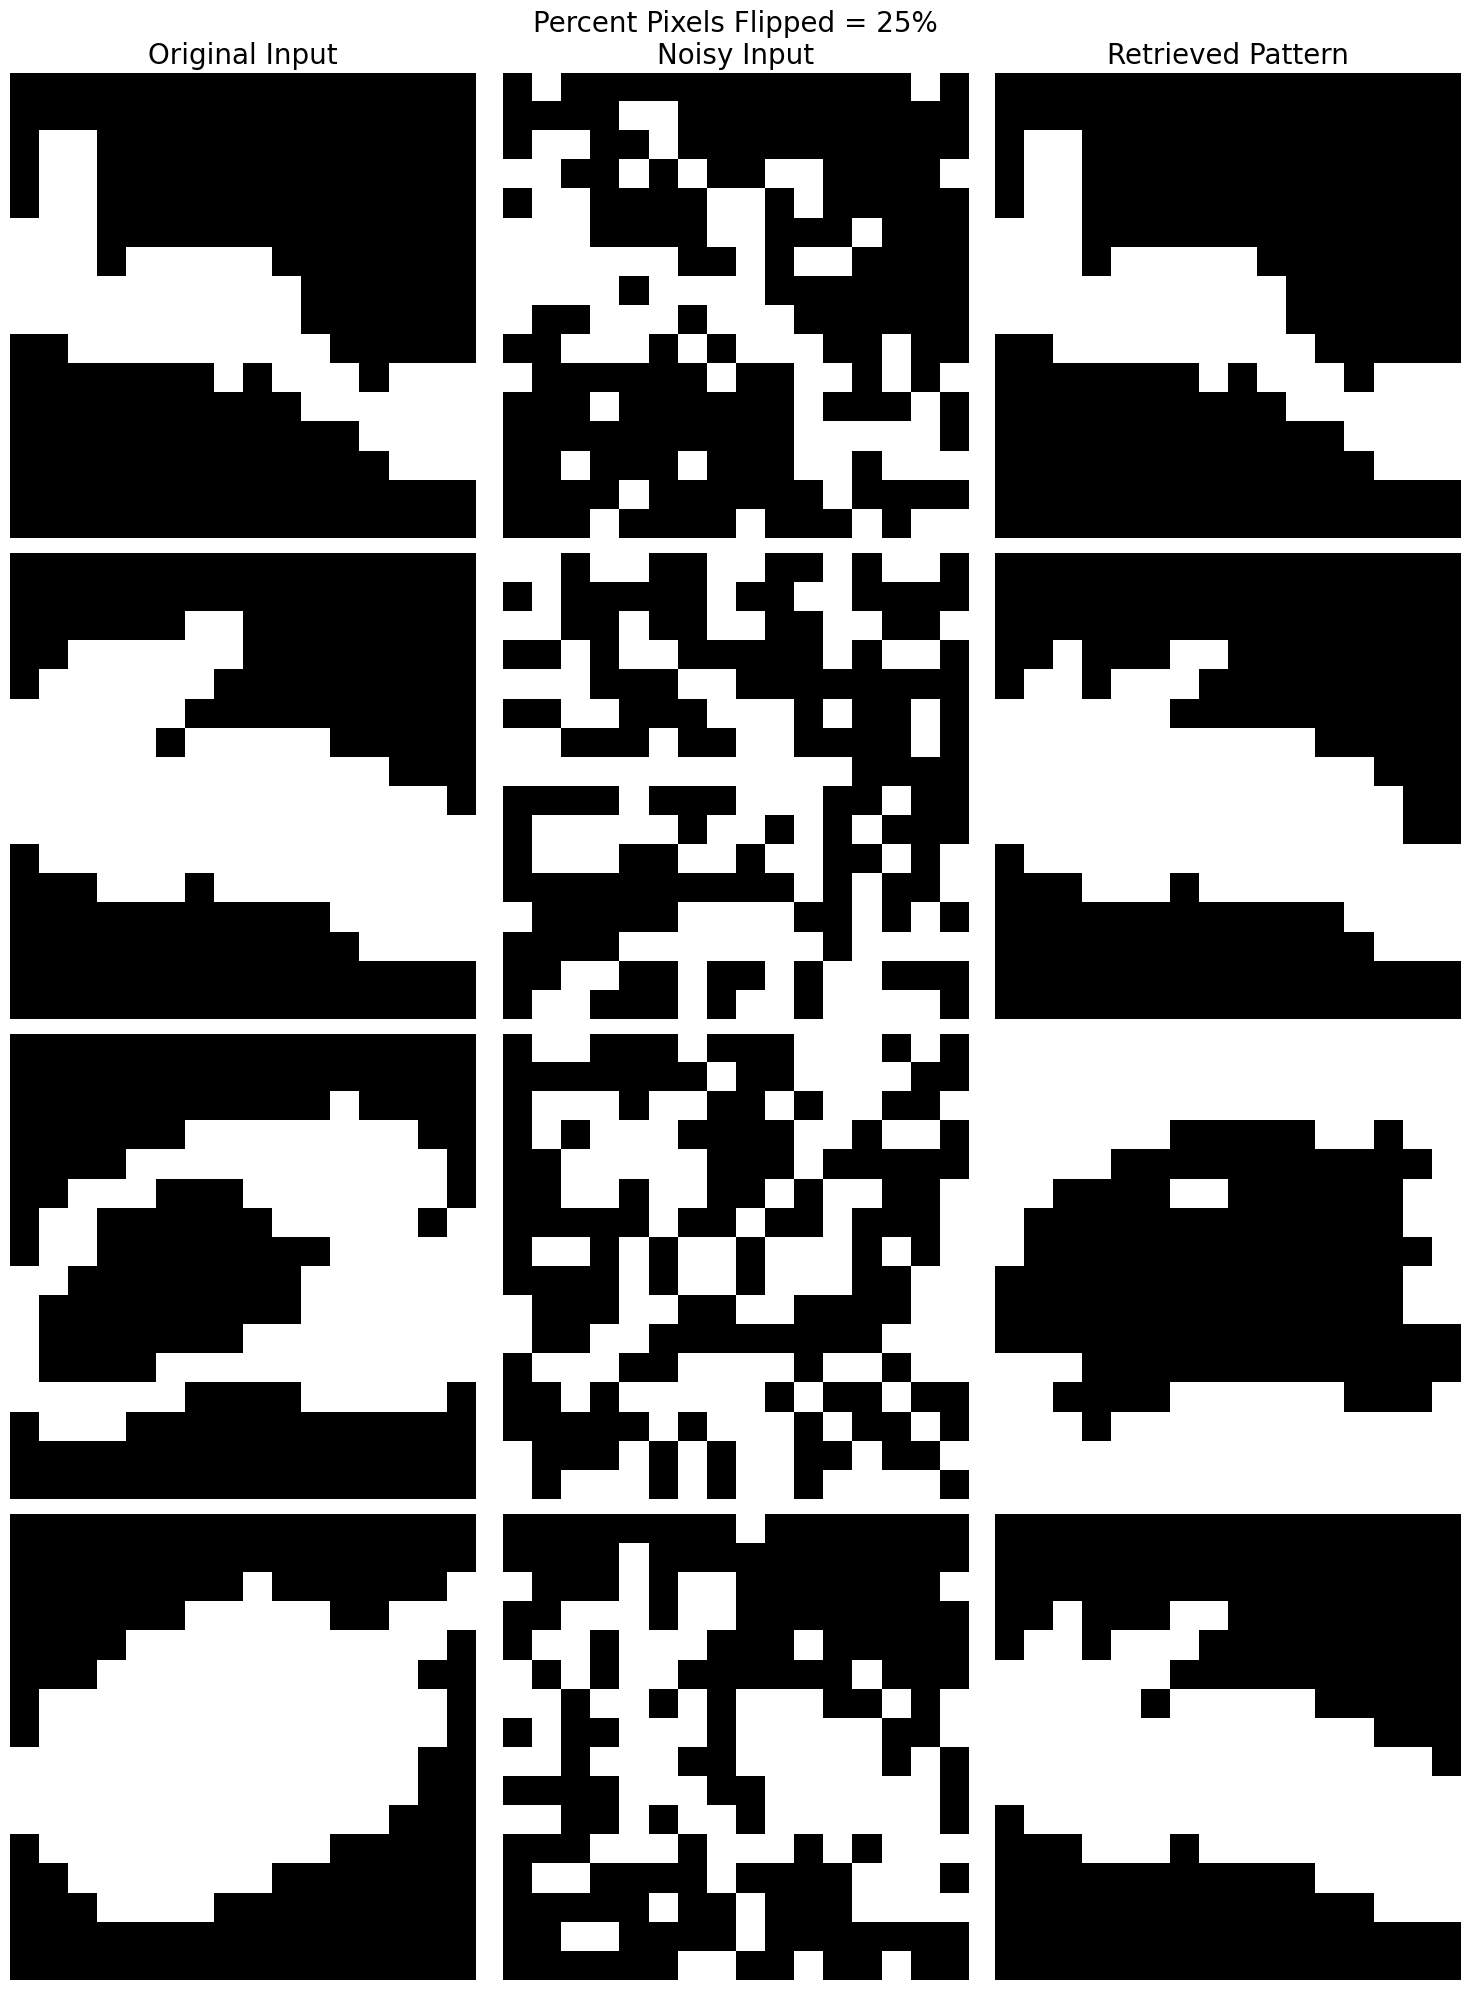

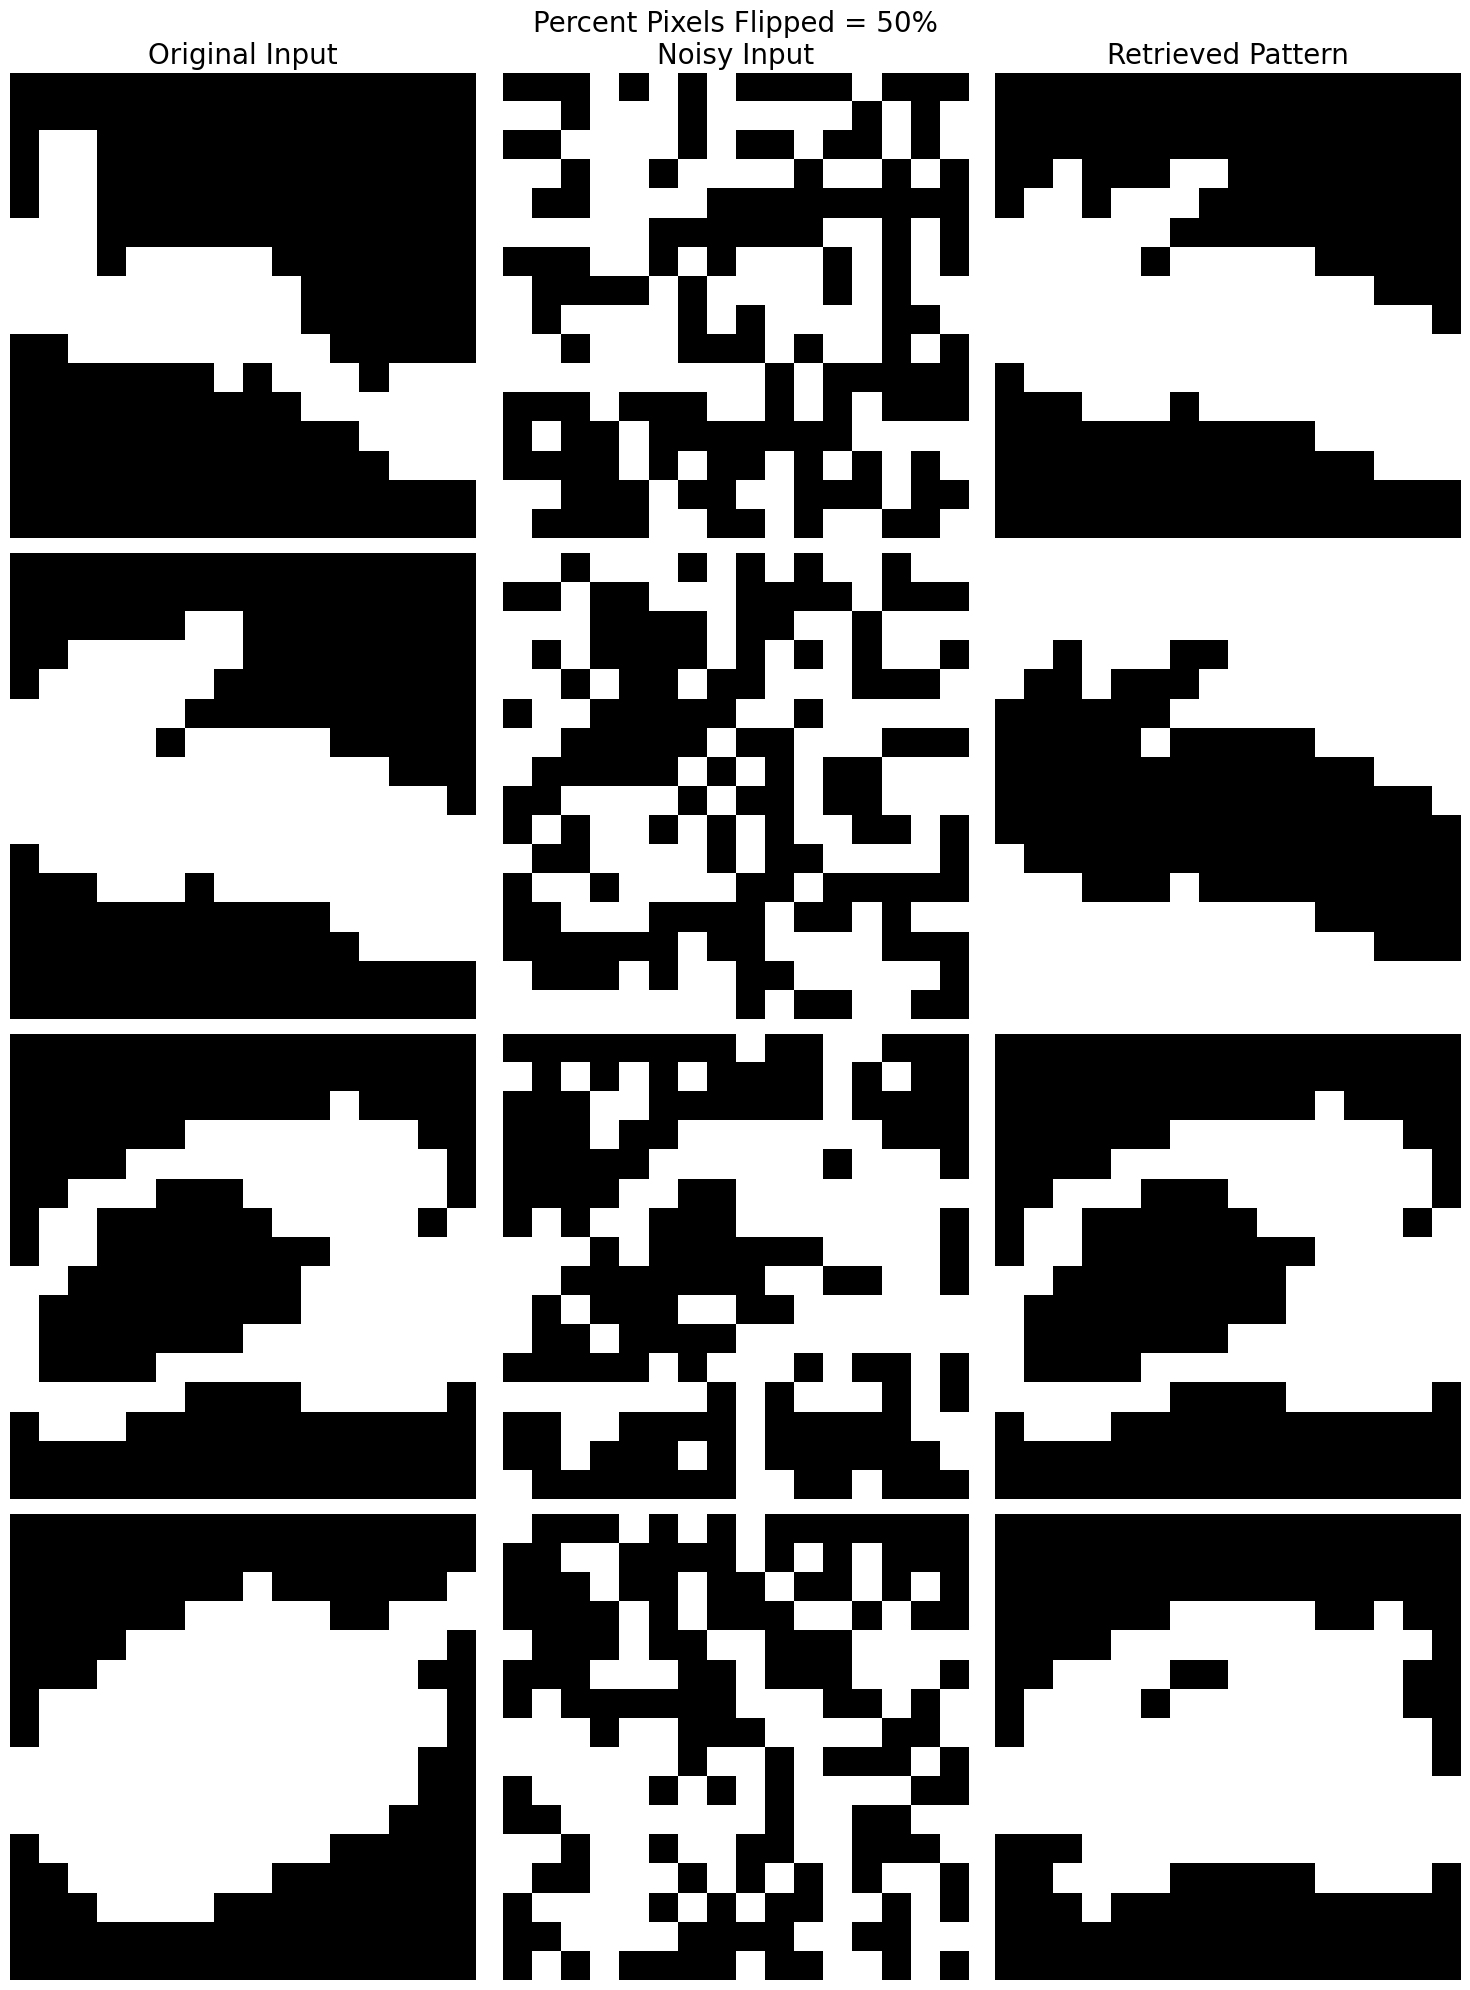

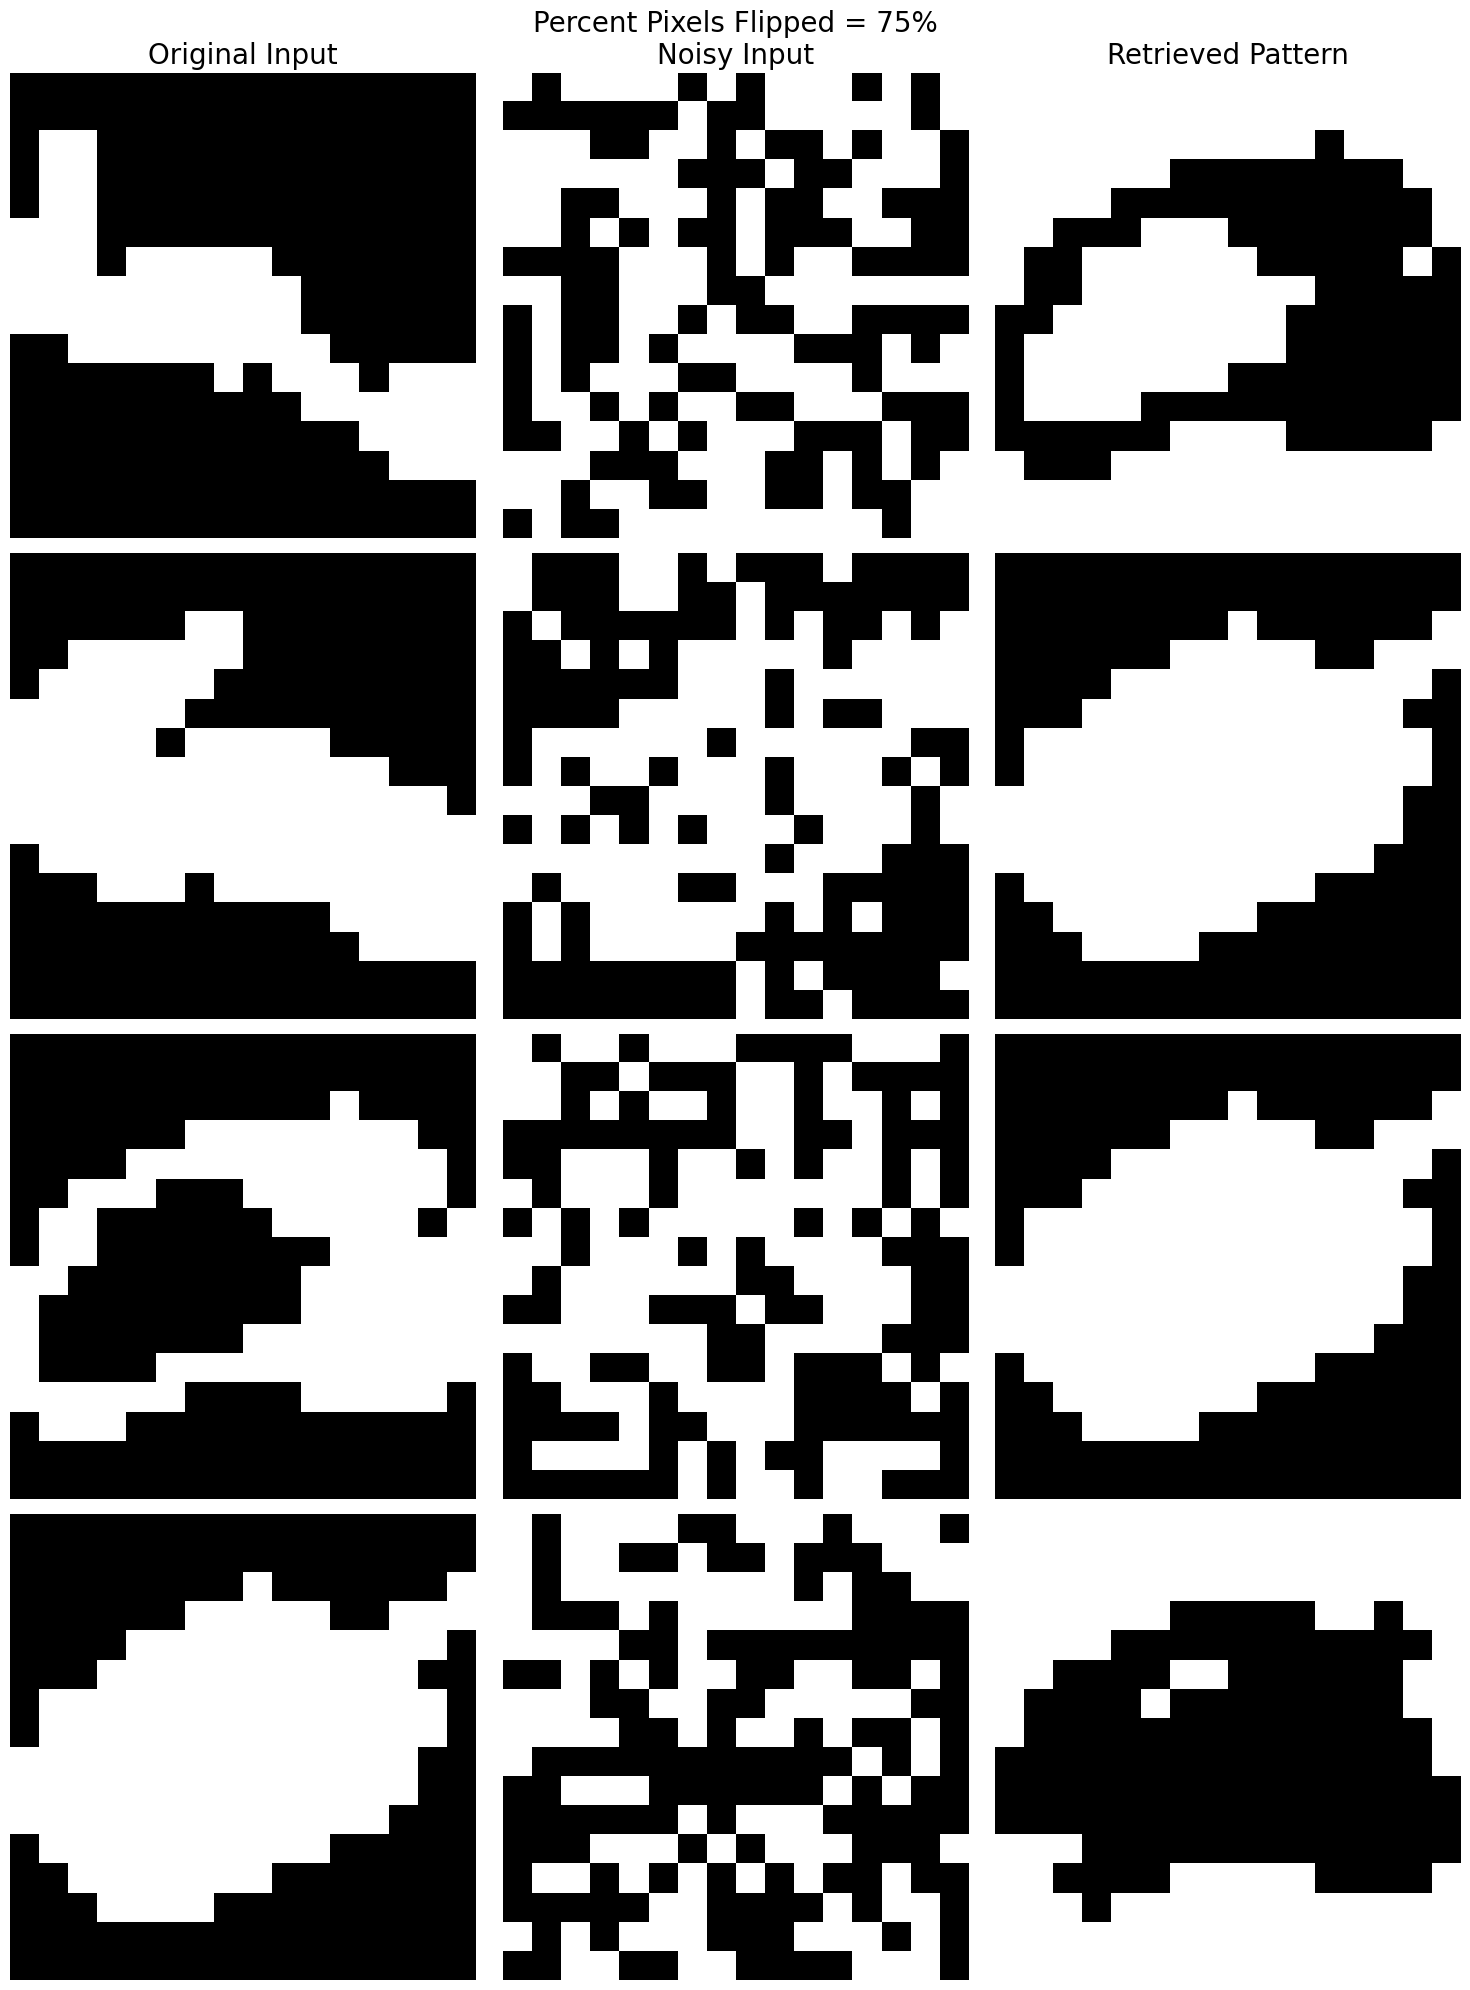

In [13]:
# Build the Hopfield Network on the dataset
model = HopfieldNetwork(num_neurons, weight, bias)

async_update = True
pruning_method = None

showcase_pat = model.retrieve(dim, weight, selected_images, noisy_inputs, removed_percents, num_iterations, async_update, pruning_method, show_plot=True)

In [14]:
def pruning_performance(orig_input, pruned_input) -> float:
    """
    Calculate the performance of the pruning method
    
    Args:
        orig_input (torch.Tensor): The original input pattern
        pruned_input (list): The pruned input pattern
    
    Returns:
        float: The performance of the pruning method.
    """
    
    pruned_input_tensor = torch.Tensor(pruned_input)
    
    # Count the number of mismatching pixels
    mismatches = torch.ne(orig_input.flatten(), pruned_input_tensor)
    num_incorrect_pixels = mismatches.sum().item()
    
    # Calculate the pruning performance
    num_pixels = orig_input.numel()
    performance = (1 - (num_incorrect_pixels / num_pixels)) * 100
    
    return performance

# Sparse Pruning

Running trial with a sparsity of 25


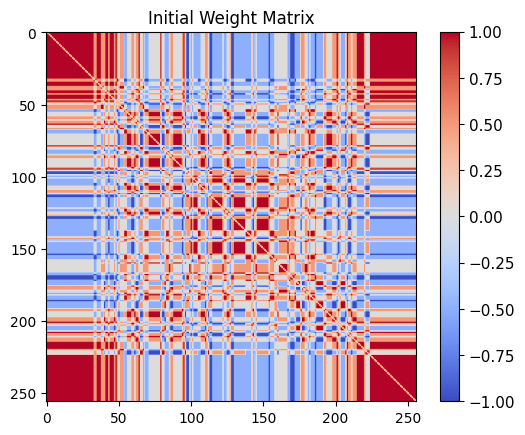

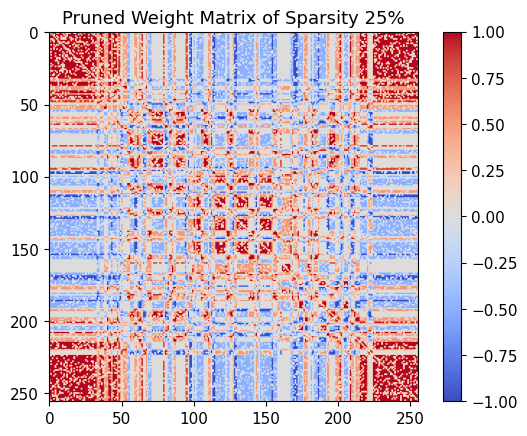

energy values for noisy input 0 [tensor(-8362.2500), tensor(-8819.7500), tensor(-9483.7500), tensor(-9497.7500), tensor(-9506.7500), tensor(-9506.7500)]
energy values for noisy input 1 [tensor(-8362.2500), tensor(-8819.7500), tensor(-9483.7500), tensor(-9497.7500), tensor(-9506.7500), tensor(-9506.7500), tensor(-8326.7500), tensor(-8388.7500), tensor(-8388.7500)]
energy values for noisy input 2 [tensor(-8362.2500), tensor(-8819.7500), tensor(-9483.7500), tensor(-9497.7500), tensor(-9506.7500), tensor(-9506.7500), tensor(-8326.7500), tensor(-8388.7500), tensor(-8388.7500), tensor(-8266.7500), tensor(-9482.7500), tensor(-9497.7500), tensor(-9506.7500), tensor(-9506.7500)]
energy values for noisy input 3 [tensor(-8362.2500), tensor(-8819.7500), tensor(-9483.7500), tensor(-9497.7500), tensor(-9506.7500), tensor(-9506.7500), tensor(-8326.7500), tensor(-8388.7500), tensor(-8388.7500), tensor(-8266.7500), tensor(-9482.7500), tensor(-9497.7500), tensor(-9506.7500), tensor(-9506.7500), tensor(-

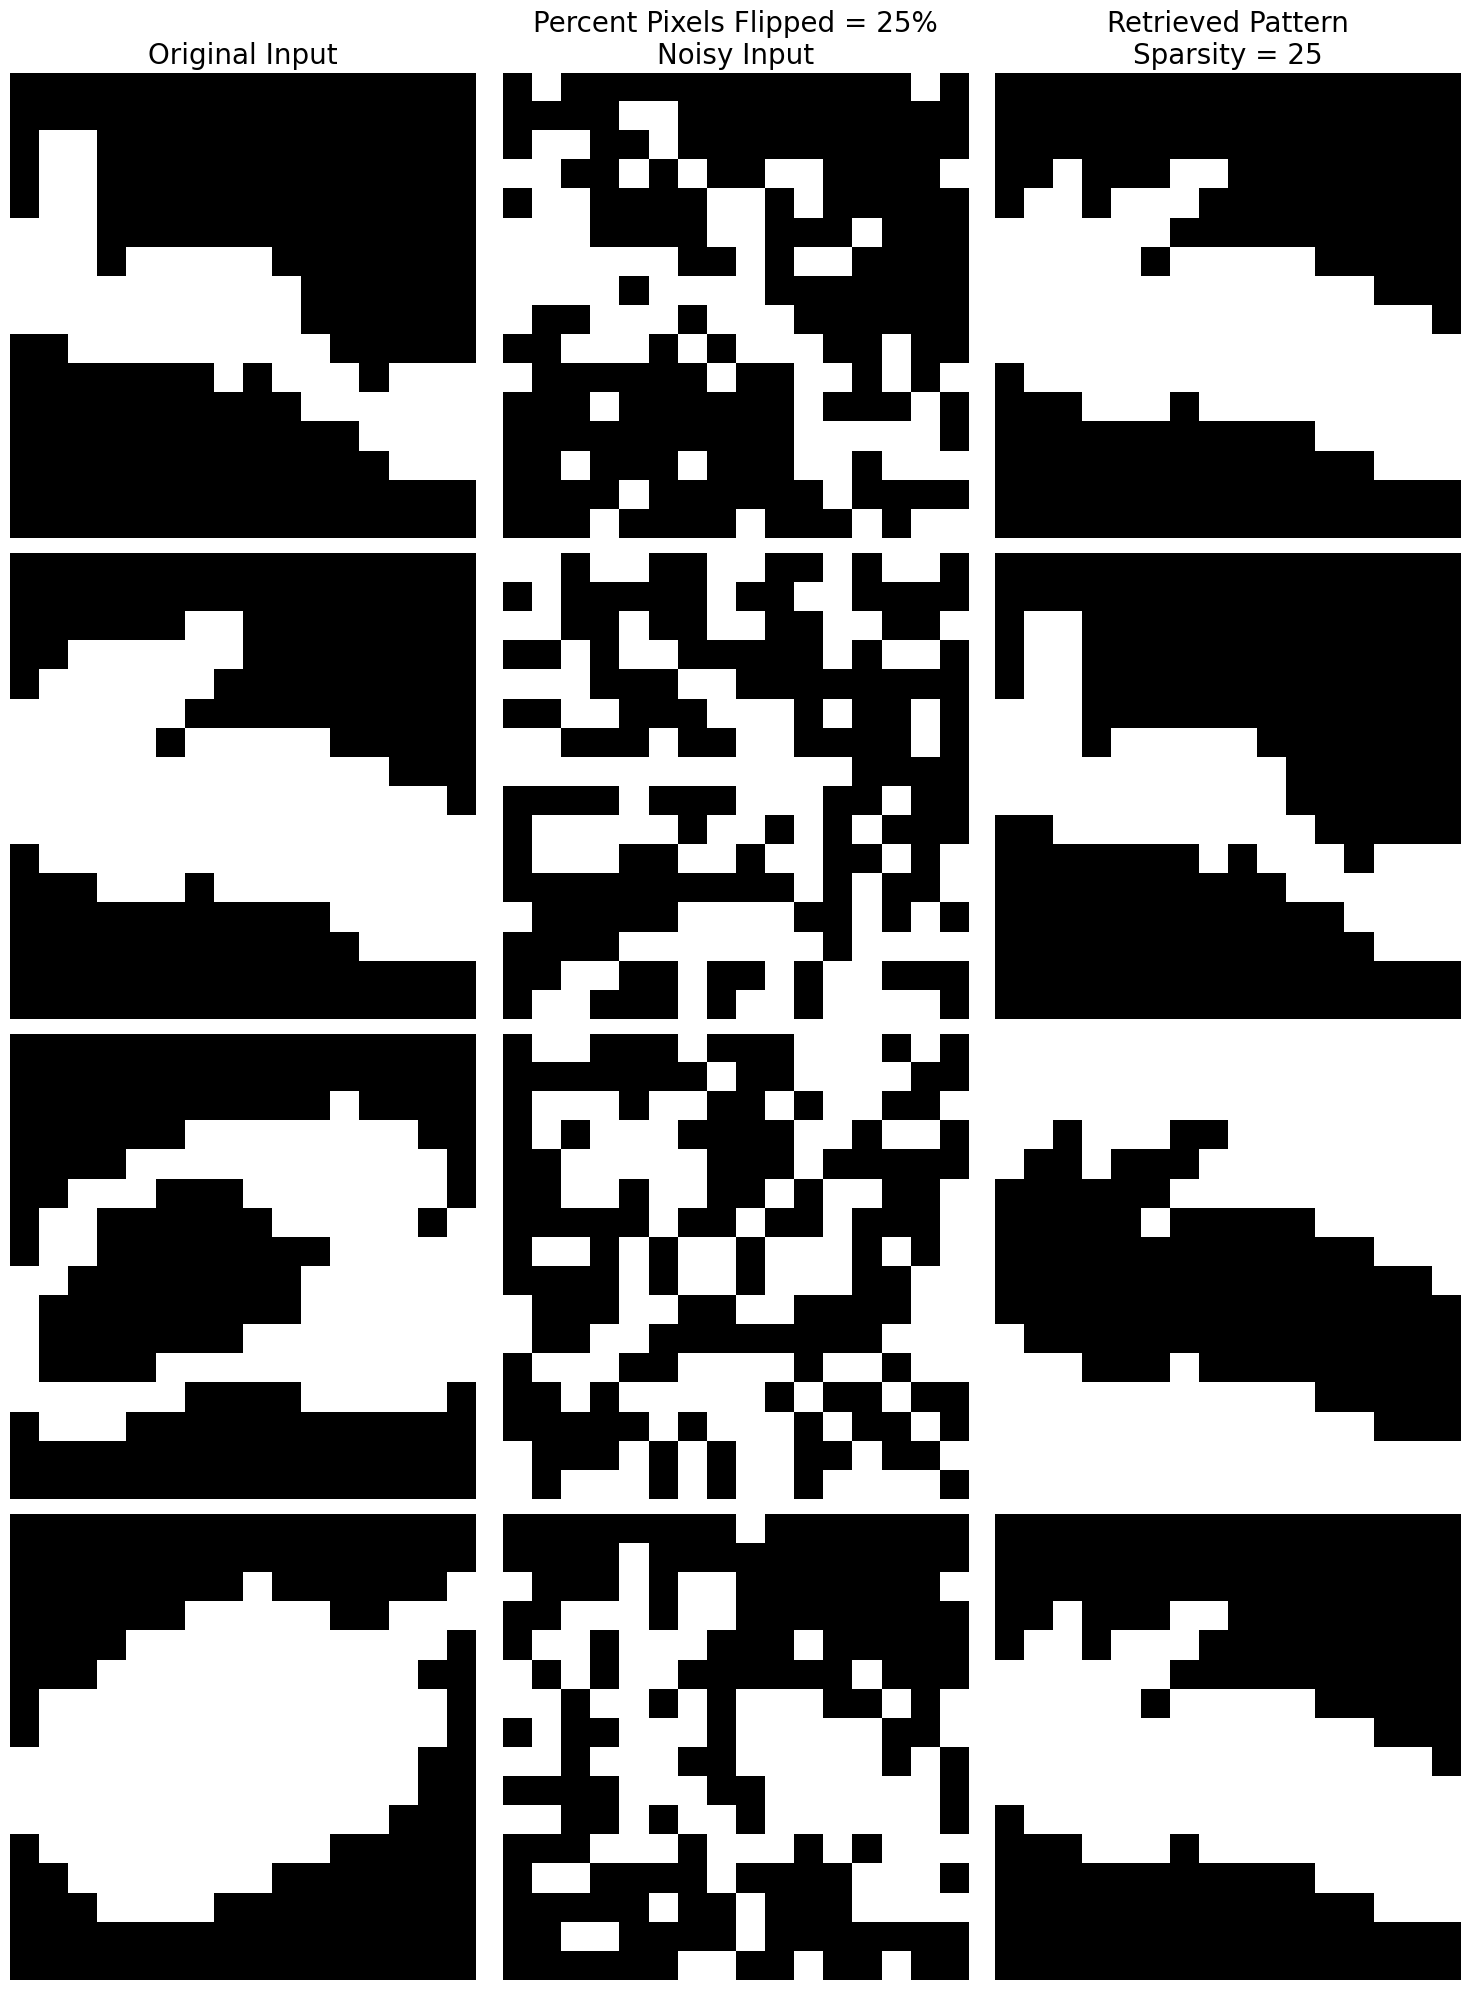

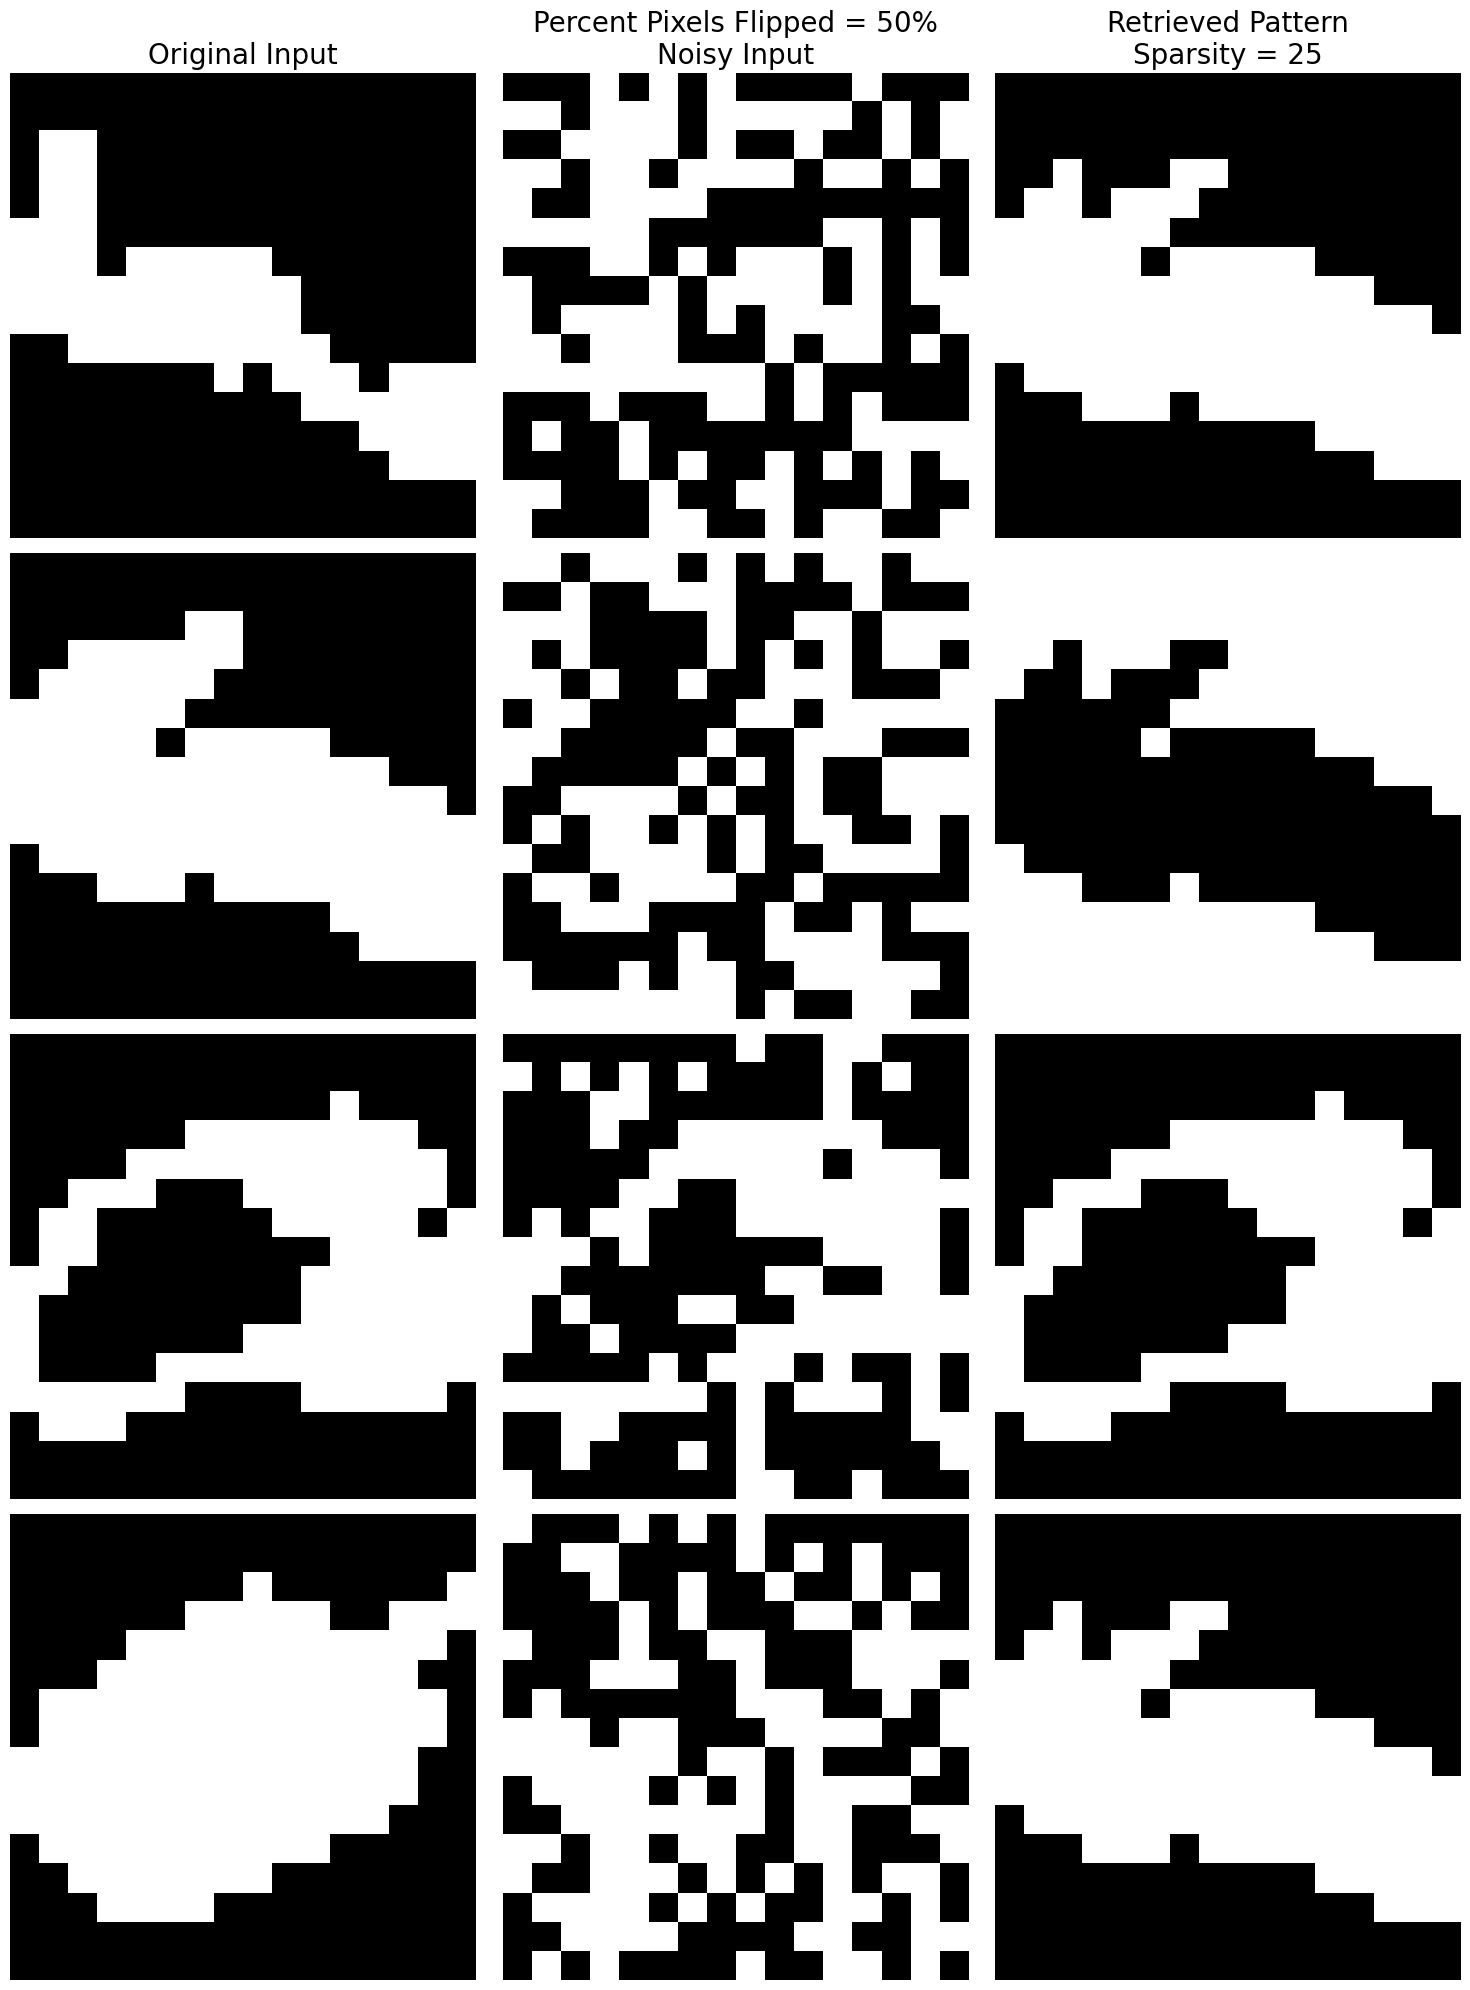

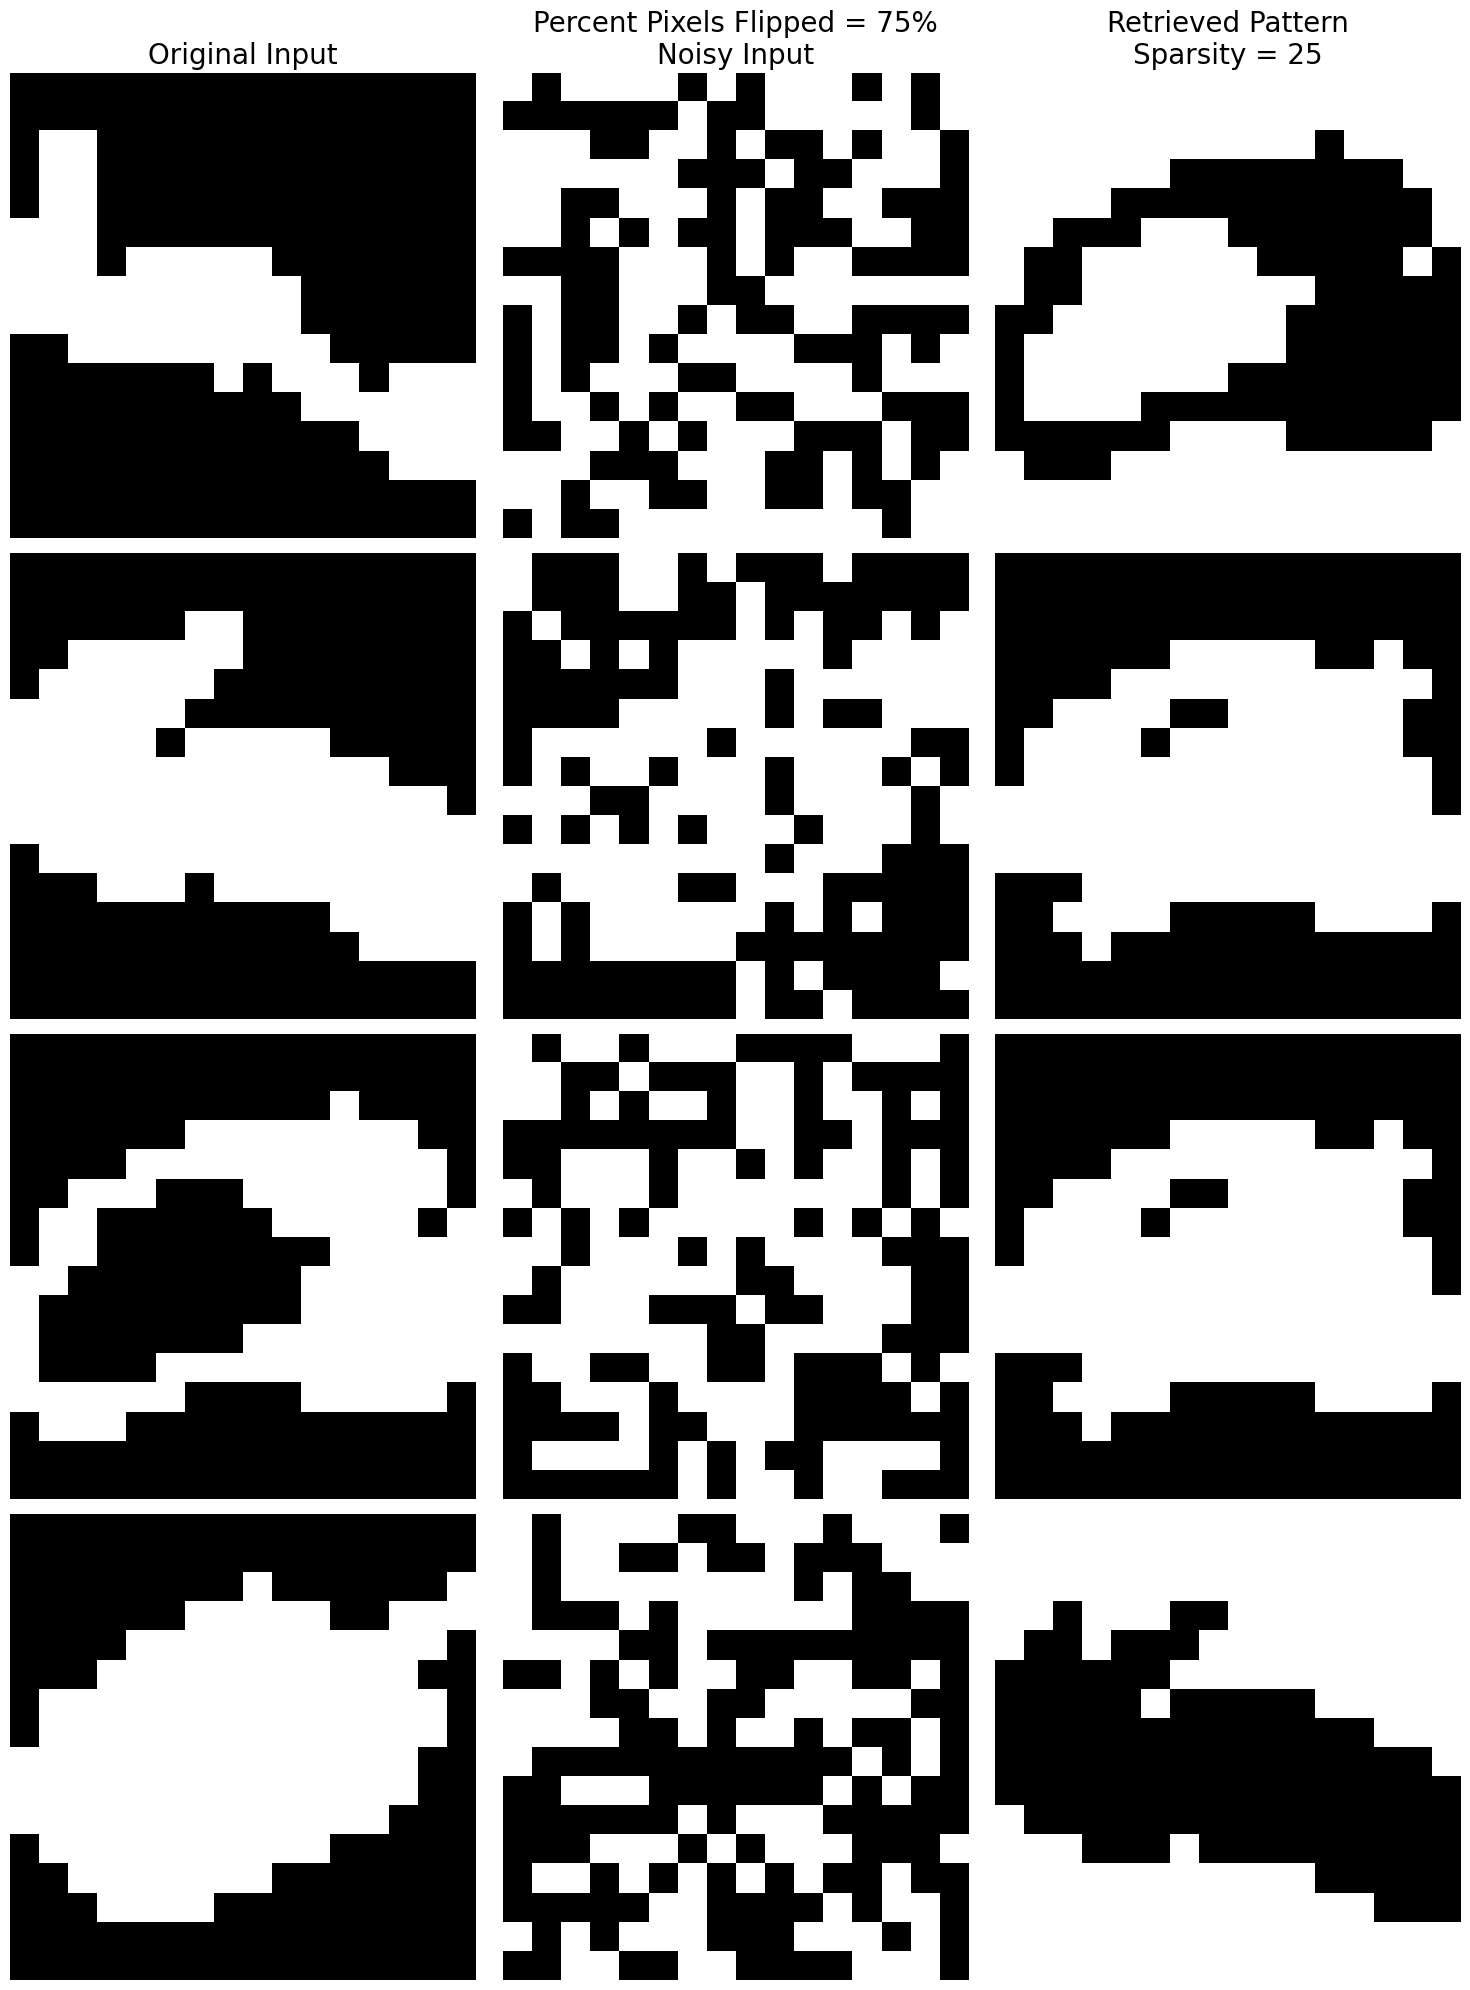

Running trial with a sparsity of 50


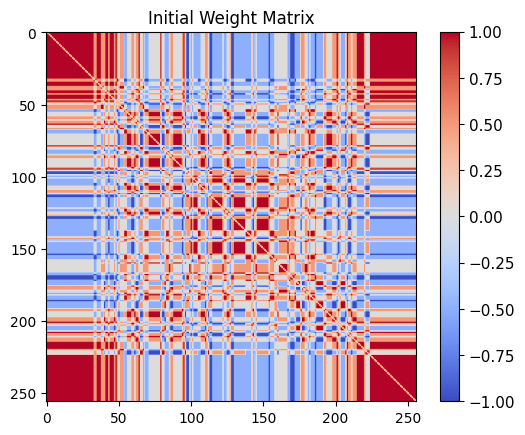

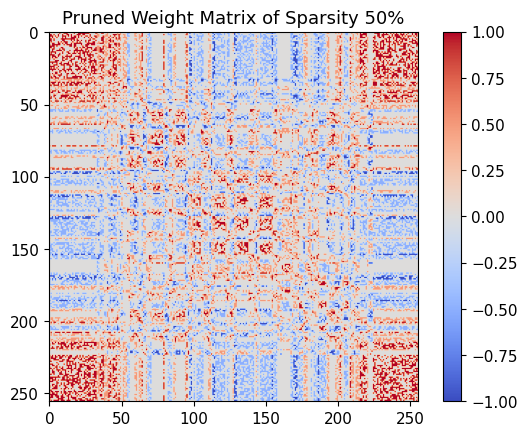

energy values for noisy input 0 [tensor(-6042.), tensor(-6349.5000), tensor(-6373.5000), tensor(-6373.5000)]
energy values for noisy input 1 [tensor(-6042.), tensor(-6349.5000), tensor(-6373.5000), tensor(-6373.5000), tensor(-5891.5000), tensor(-6365.5000), tensor(-6373.5000), tensor(-6373.5000)]
energy values for noisy input 2 [tensor(-6042.), tensor(-6349.5000), tensor(-6373.5000), tensor(-6373.5000), tensor(-5891.5000), tensor(-6365.5000), tensor(-6373.5000), tensor(-6373.5000), tensor(-3385.5000), tensor(-5676.2500), tensor(-5696.5000), tensor(-5696.5000)]
energy values for noisy input 3 [tensor(-6042.), tensor(-6349.5000), tensor(-6373.5000), tensor(-6373.5000), tensor(-5891.5000), tensor(-6365.5000), tensor(-6373.5000), tensor(-6373.5000), tensor(-3385.5000), tensor(-5676.2500), tensor(-5696.5000), tensor(-5696.5000), tensor(-6373.5000), tensor(-6373.5000)]
energy values for noisy input 4 [tensor(-6042.), tensor(-6349.5000), tensor(-6373.5000), tensor(-6373.5000), tensor(-5891.50

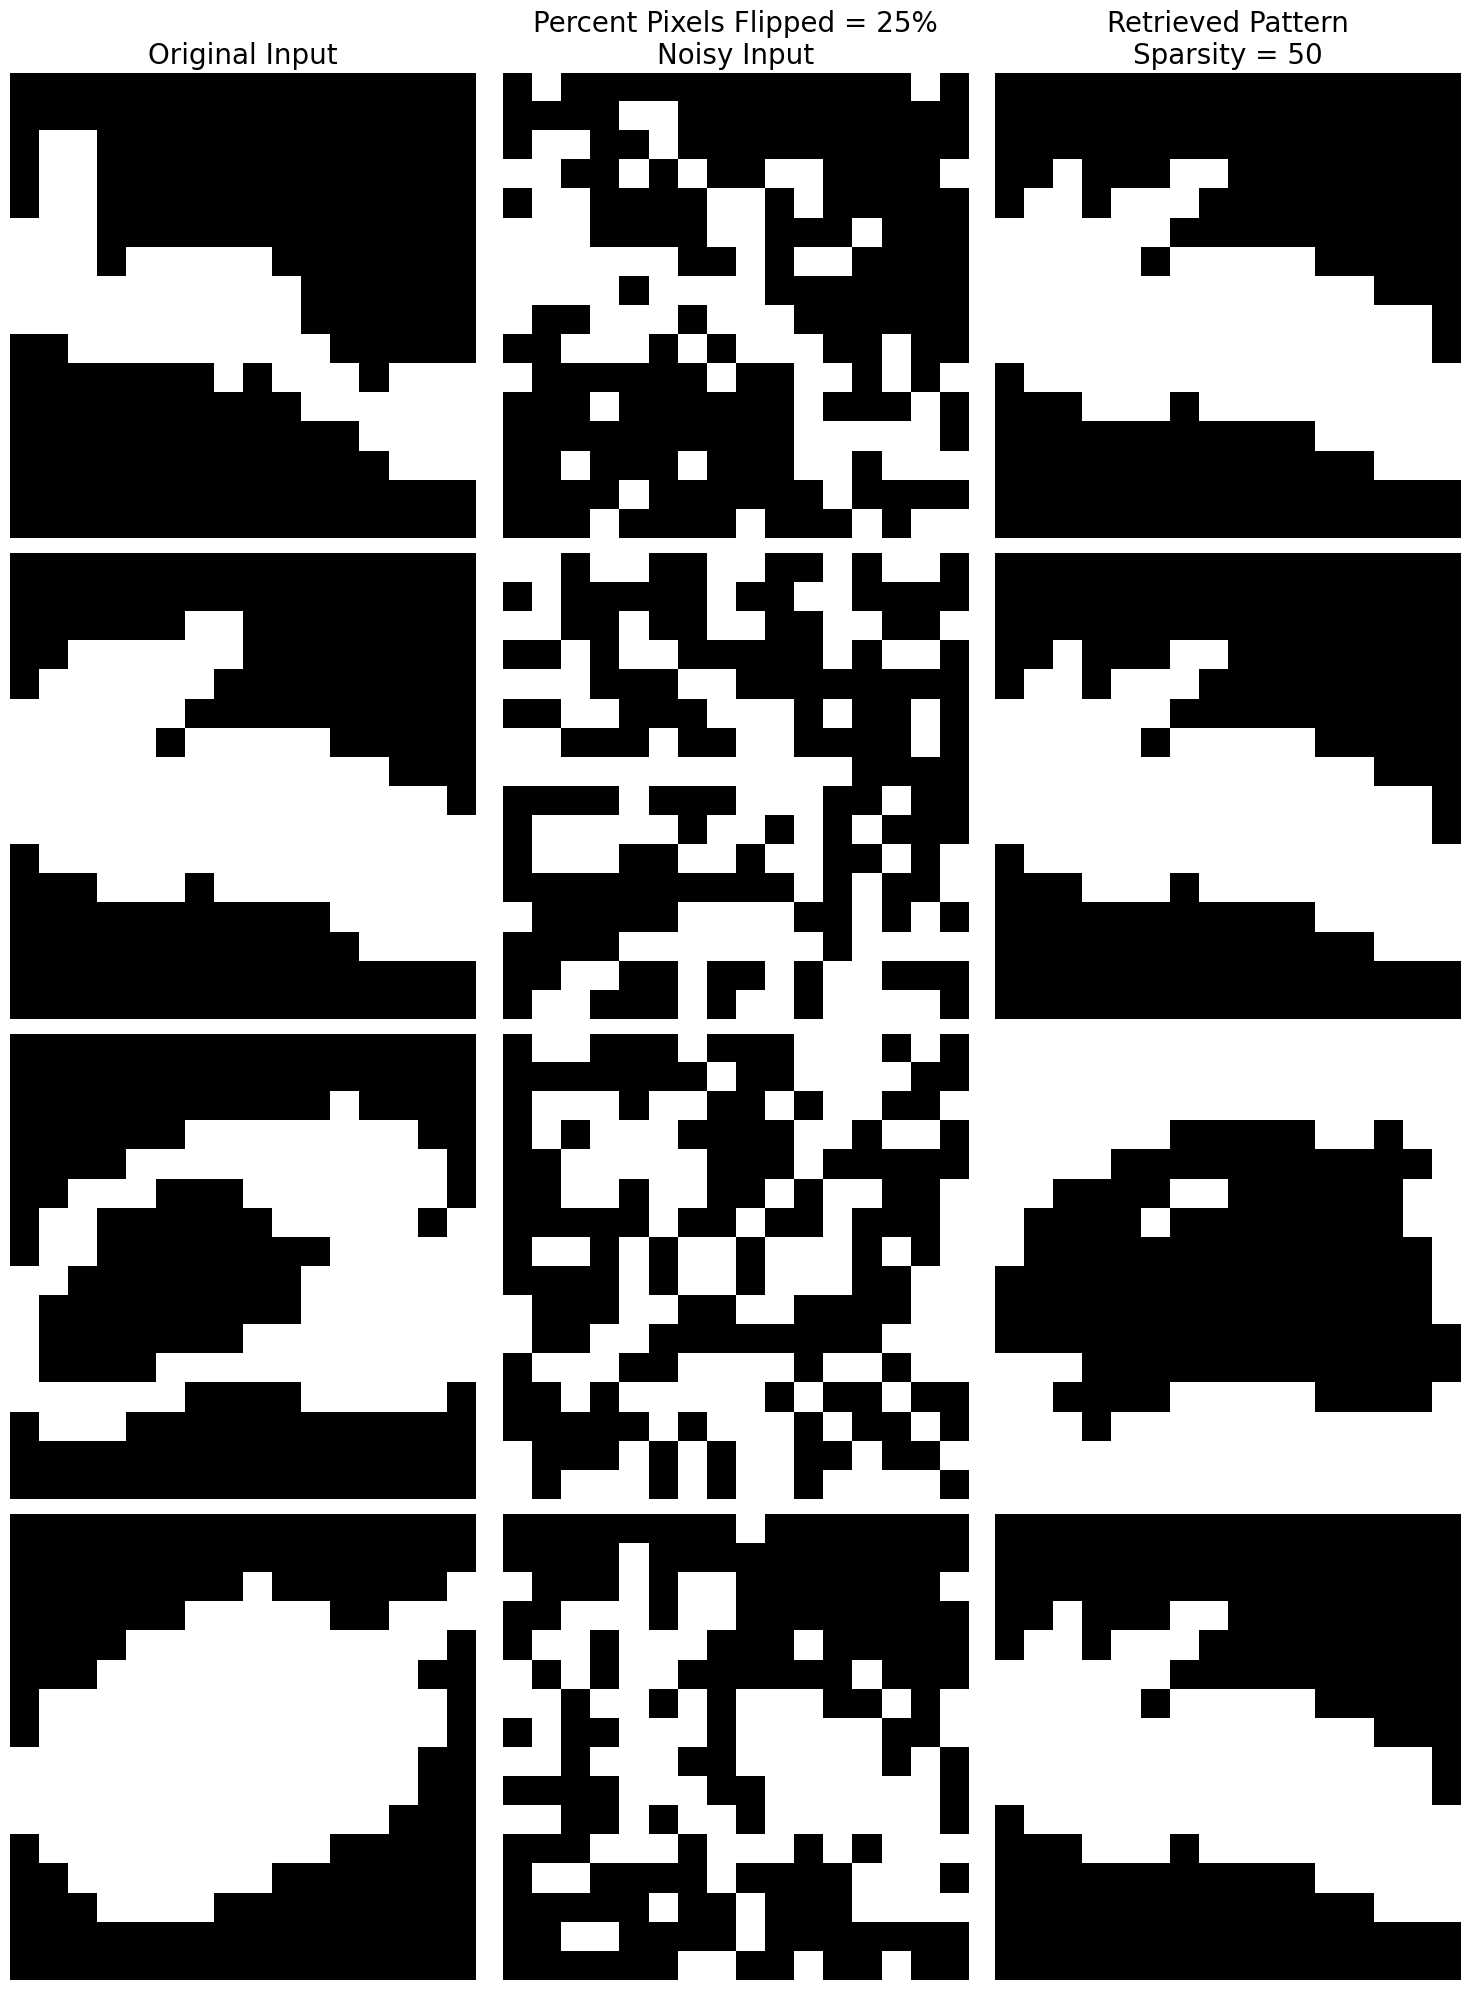

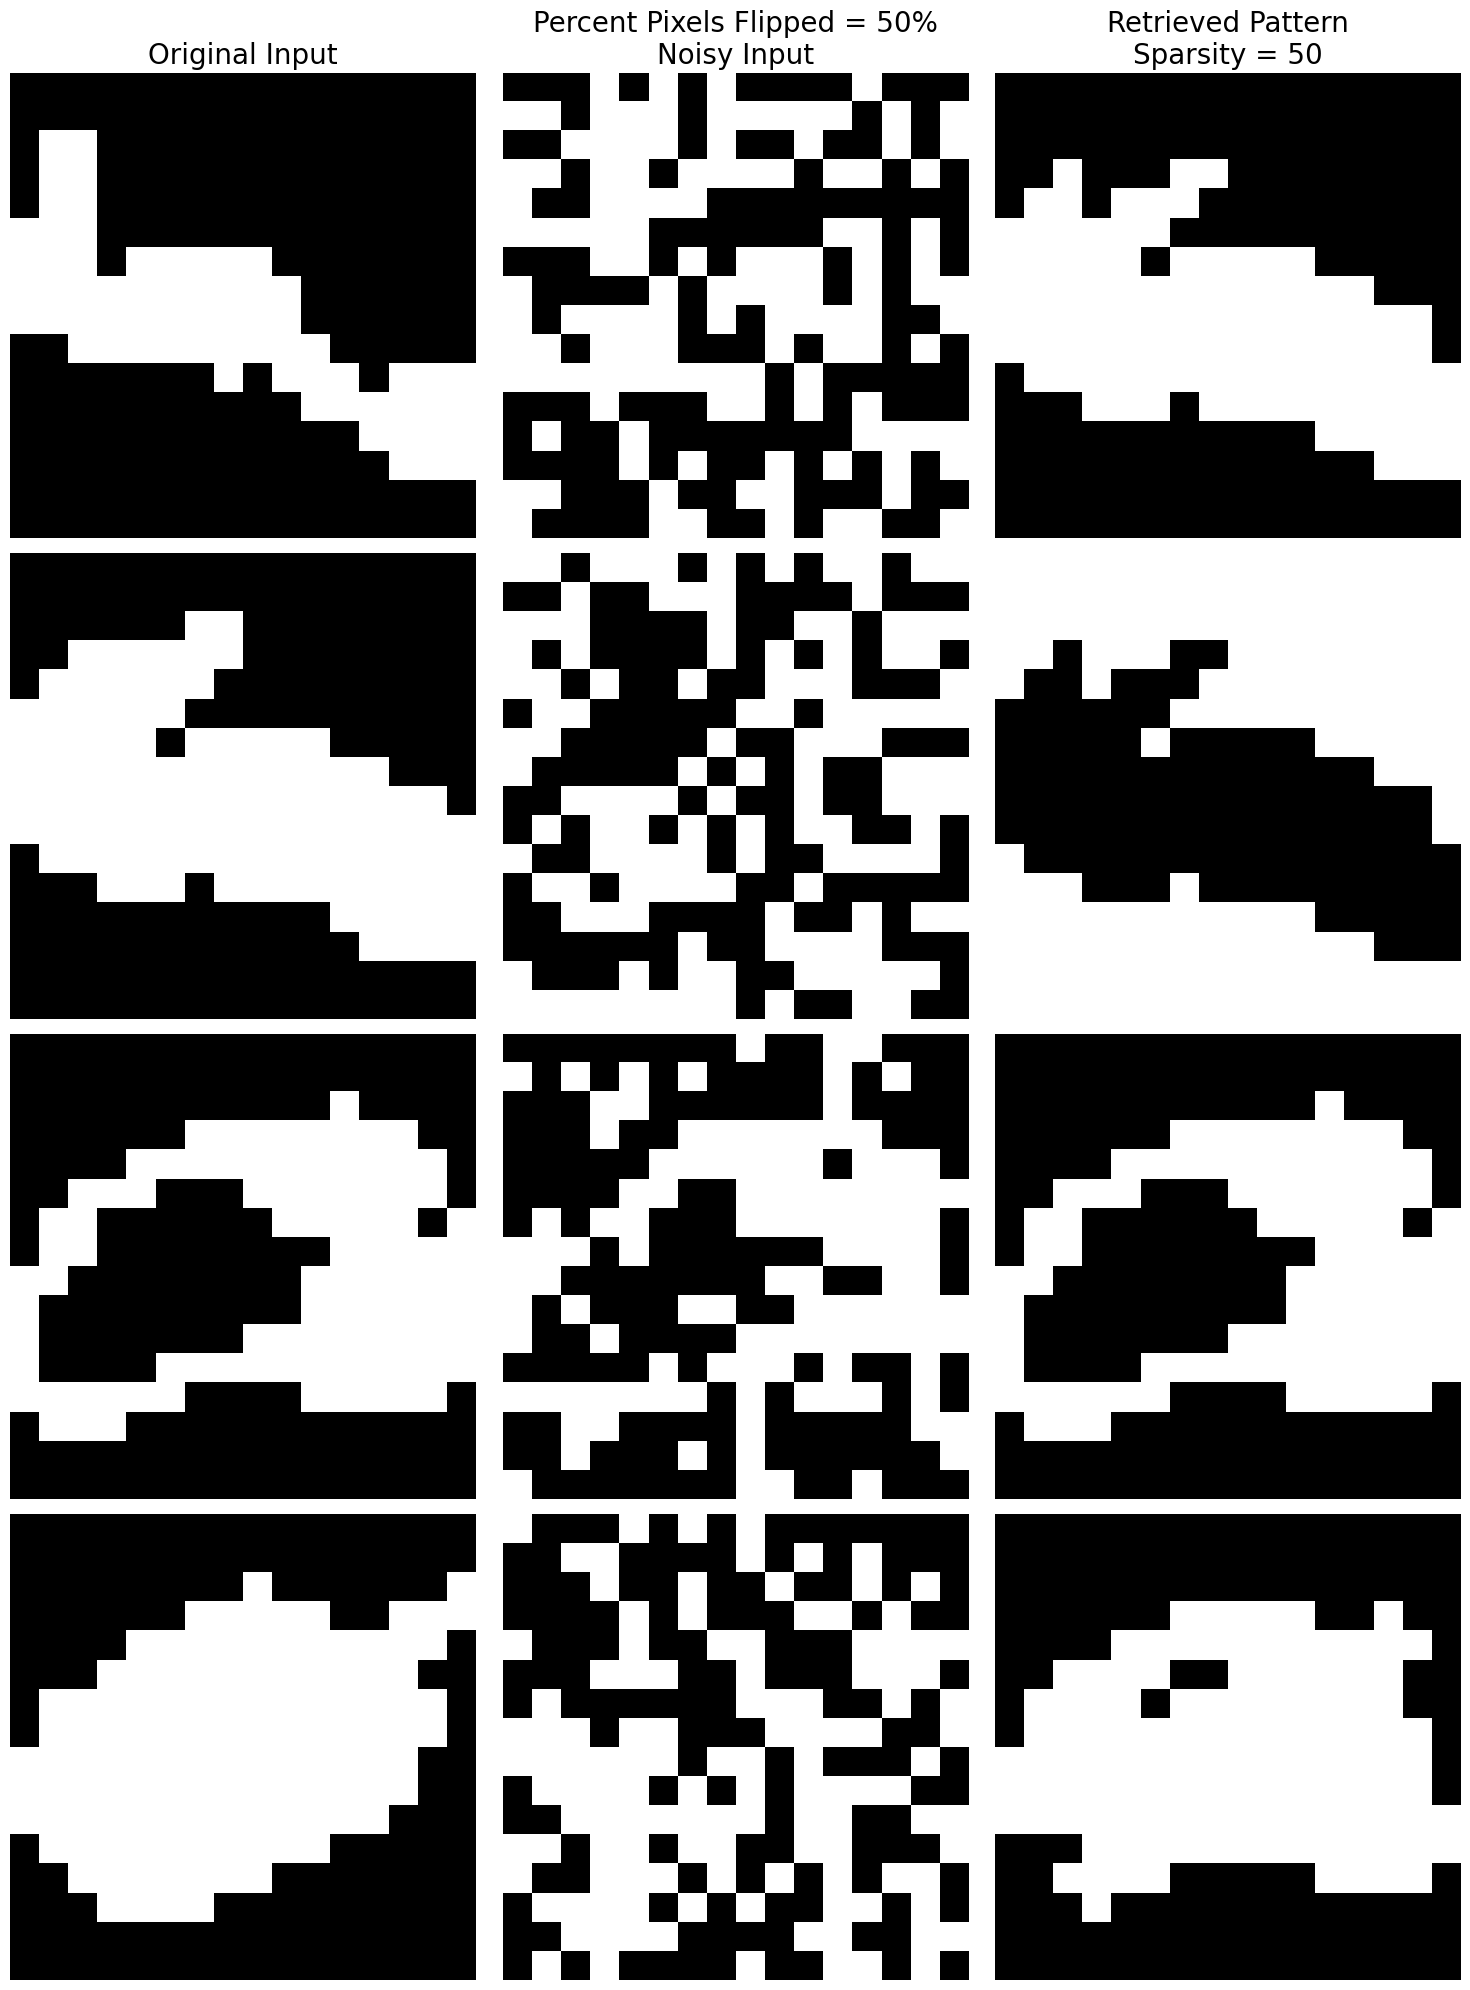

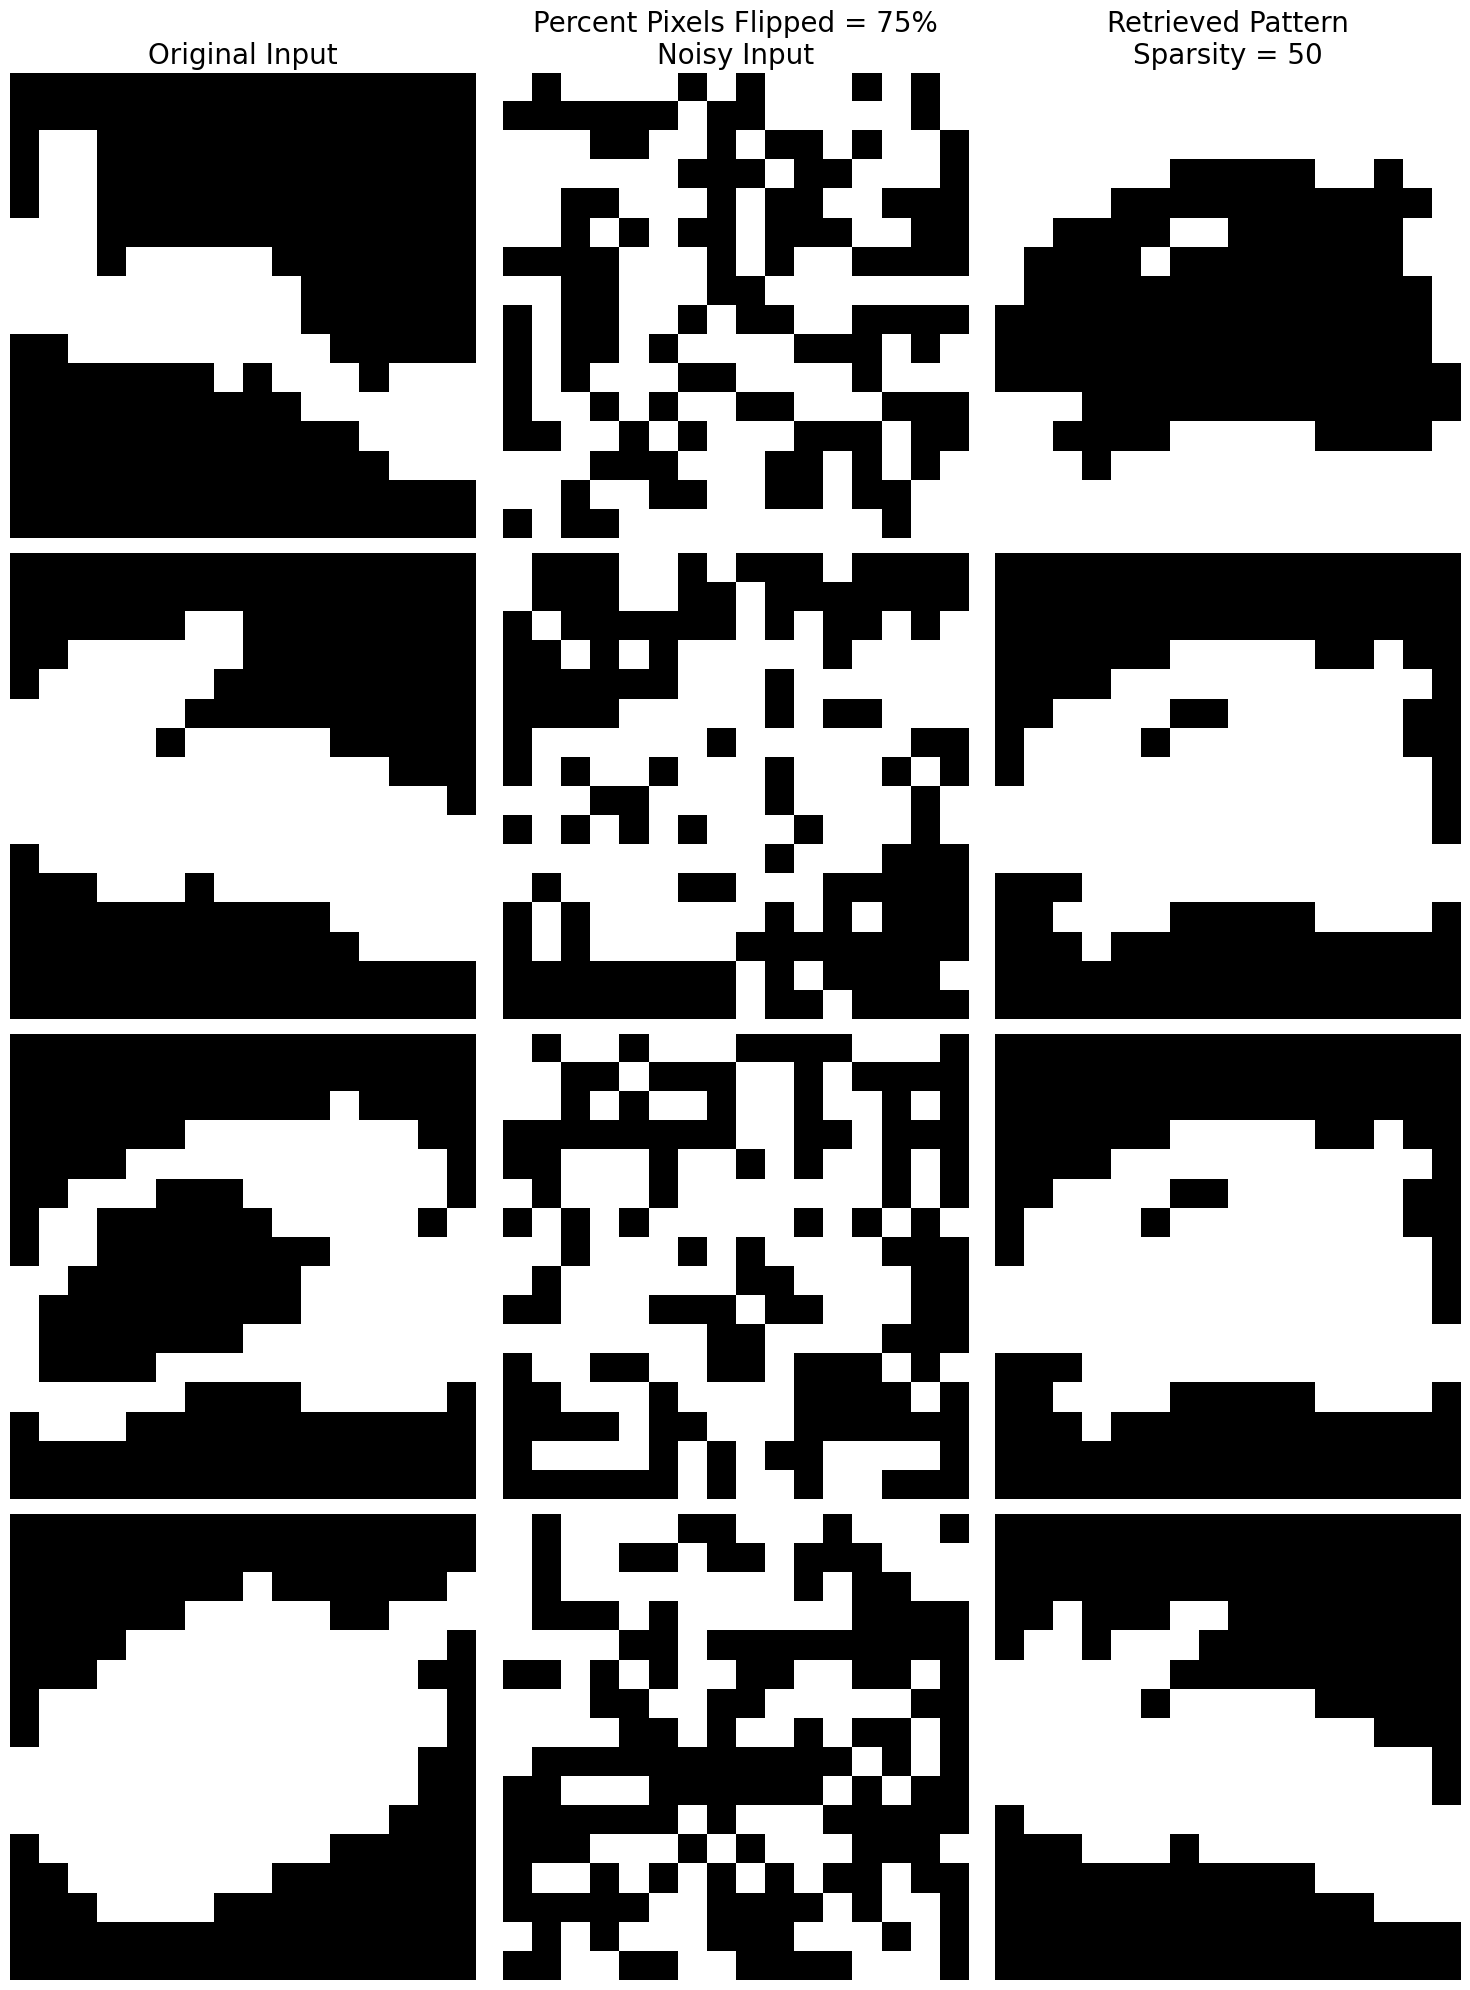

Running trial with a sparsity of 75


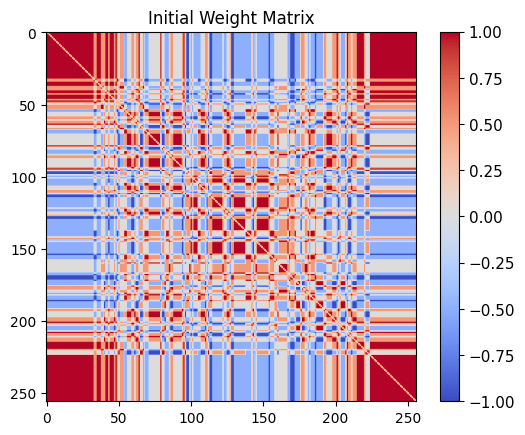

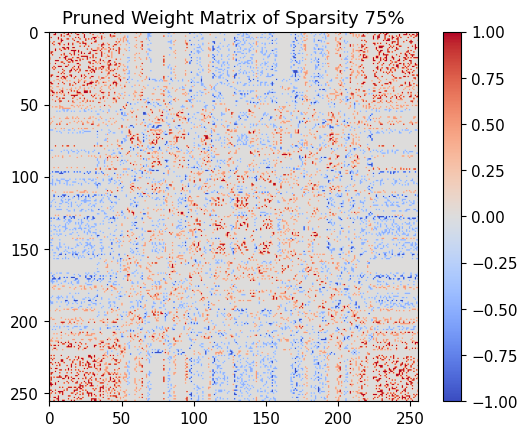

energy values for noisy input 0 [tensor(-2871.5000), tensor(-3130.7500), tensor(-3162.2500), tensor(-3165.7500), tensor(-3165.7500)]
energy values for noisy input 1 [tensor(-2871.5000), tensor(-3130.7500), tensor(-3162.2500), tensor(-3165.7500), tensor(-3165.7500), tensor(-2425.), tensor(-3081.), tensor(-3168.7500), tensor(-3165.7500), tensor(-3165.7500)]
energy values for noisy input 2 [tensor(-2871.5000), tensor(-3130.7500), tensor(-3162.2500), tensor(-3165.7500), tensor(-3165.7500), tensor(-2425.), tensor(-3081.), tensor(-3168.7500), tensor(-3165.7500), tensor(-3165.7500), tensor(-1537.2500), tensor(-2774.7500), tensor(-2995.7500), tensor(-3165.7500), tensor(-3165.7500)]
energy values for noisy input 3 [tensor(-2871.5000), tensor(-3130.7500), tensor(-3162.2500), tensor(-3165.7500), tensor(-3165.7500), tensor(-2425.), tensor(-3081.), tensor(-3168.7500), tensor(-3165.7500), tensor(-3165.7500), tensor(-1537.2500), tensor(-2774.7500), tensor(-2995.7500), tensor(-3165.7500), tensor(-3165

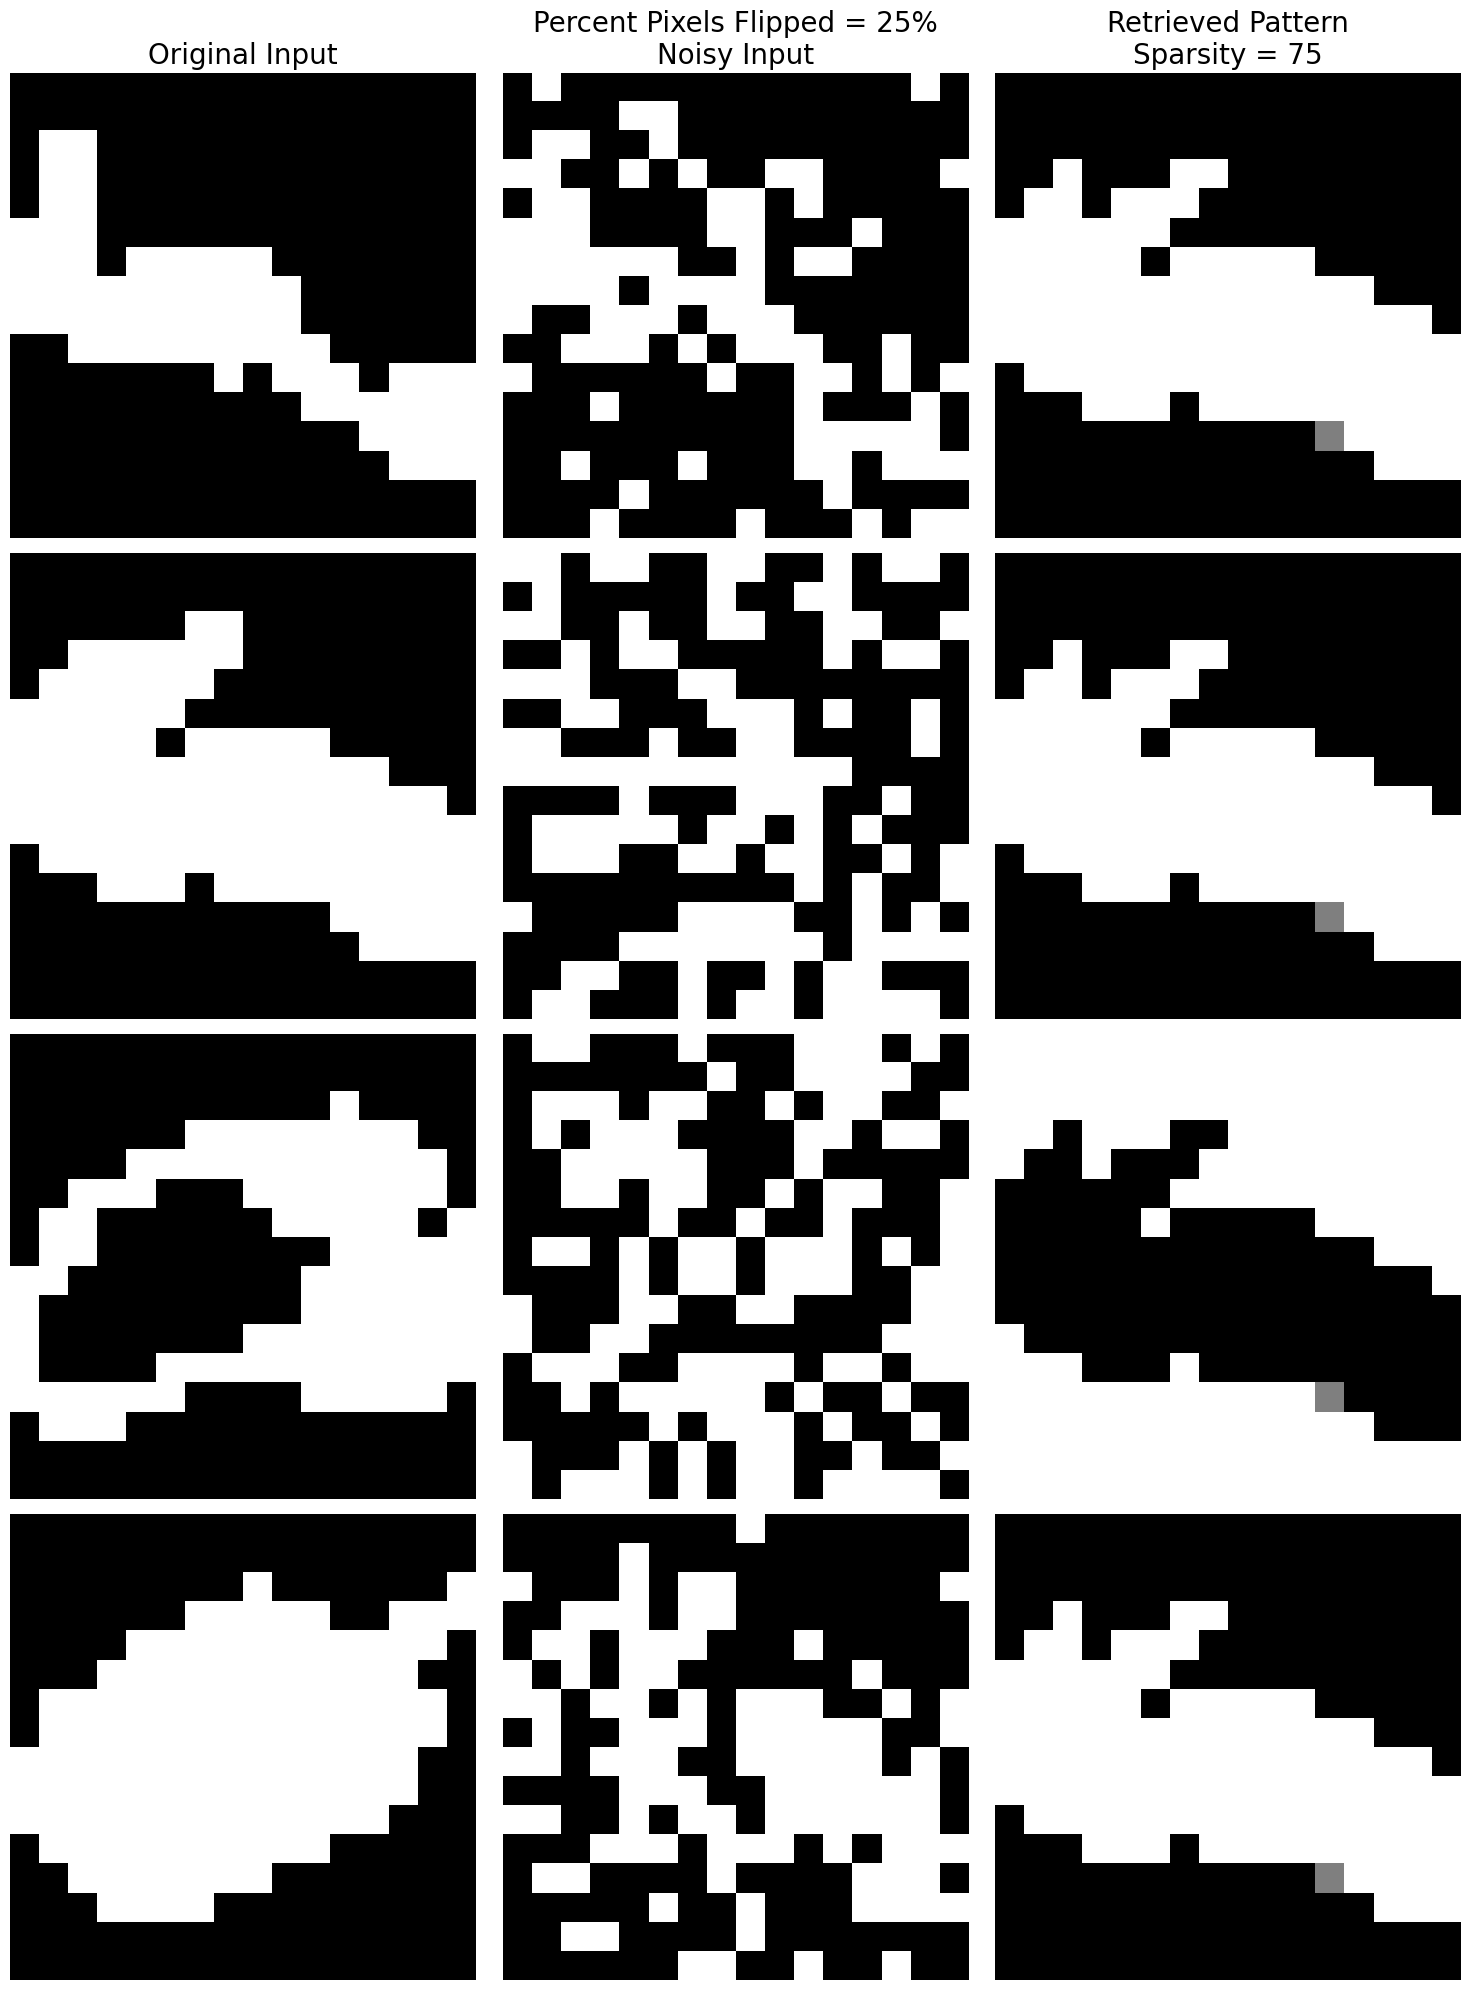

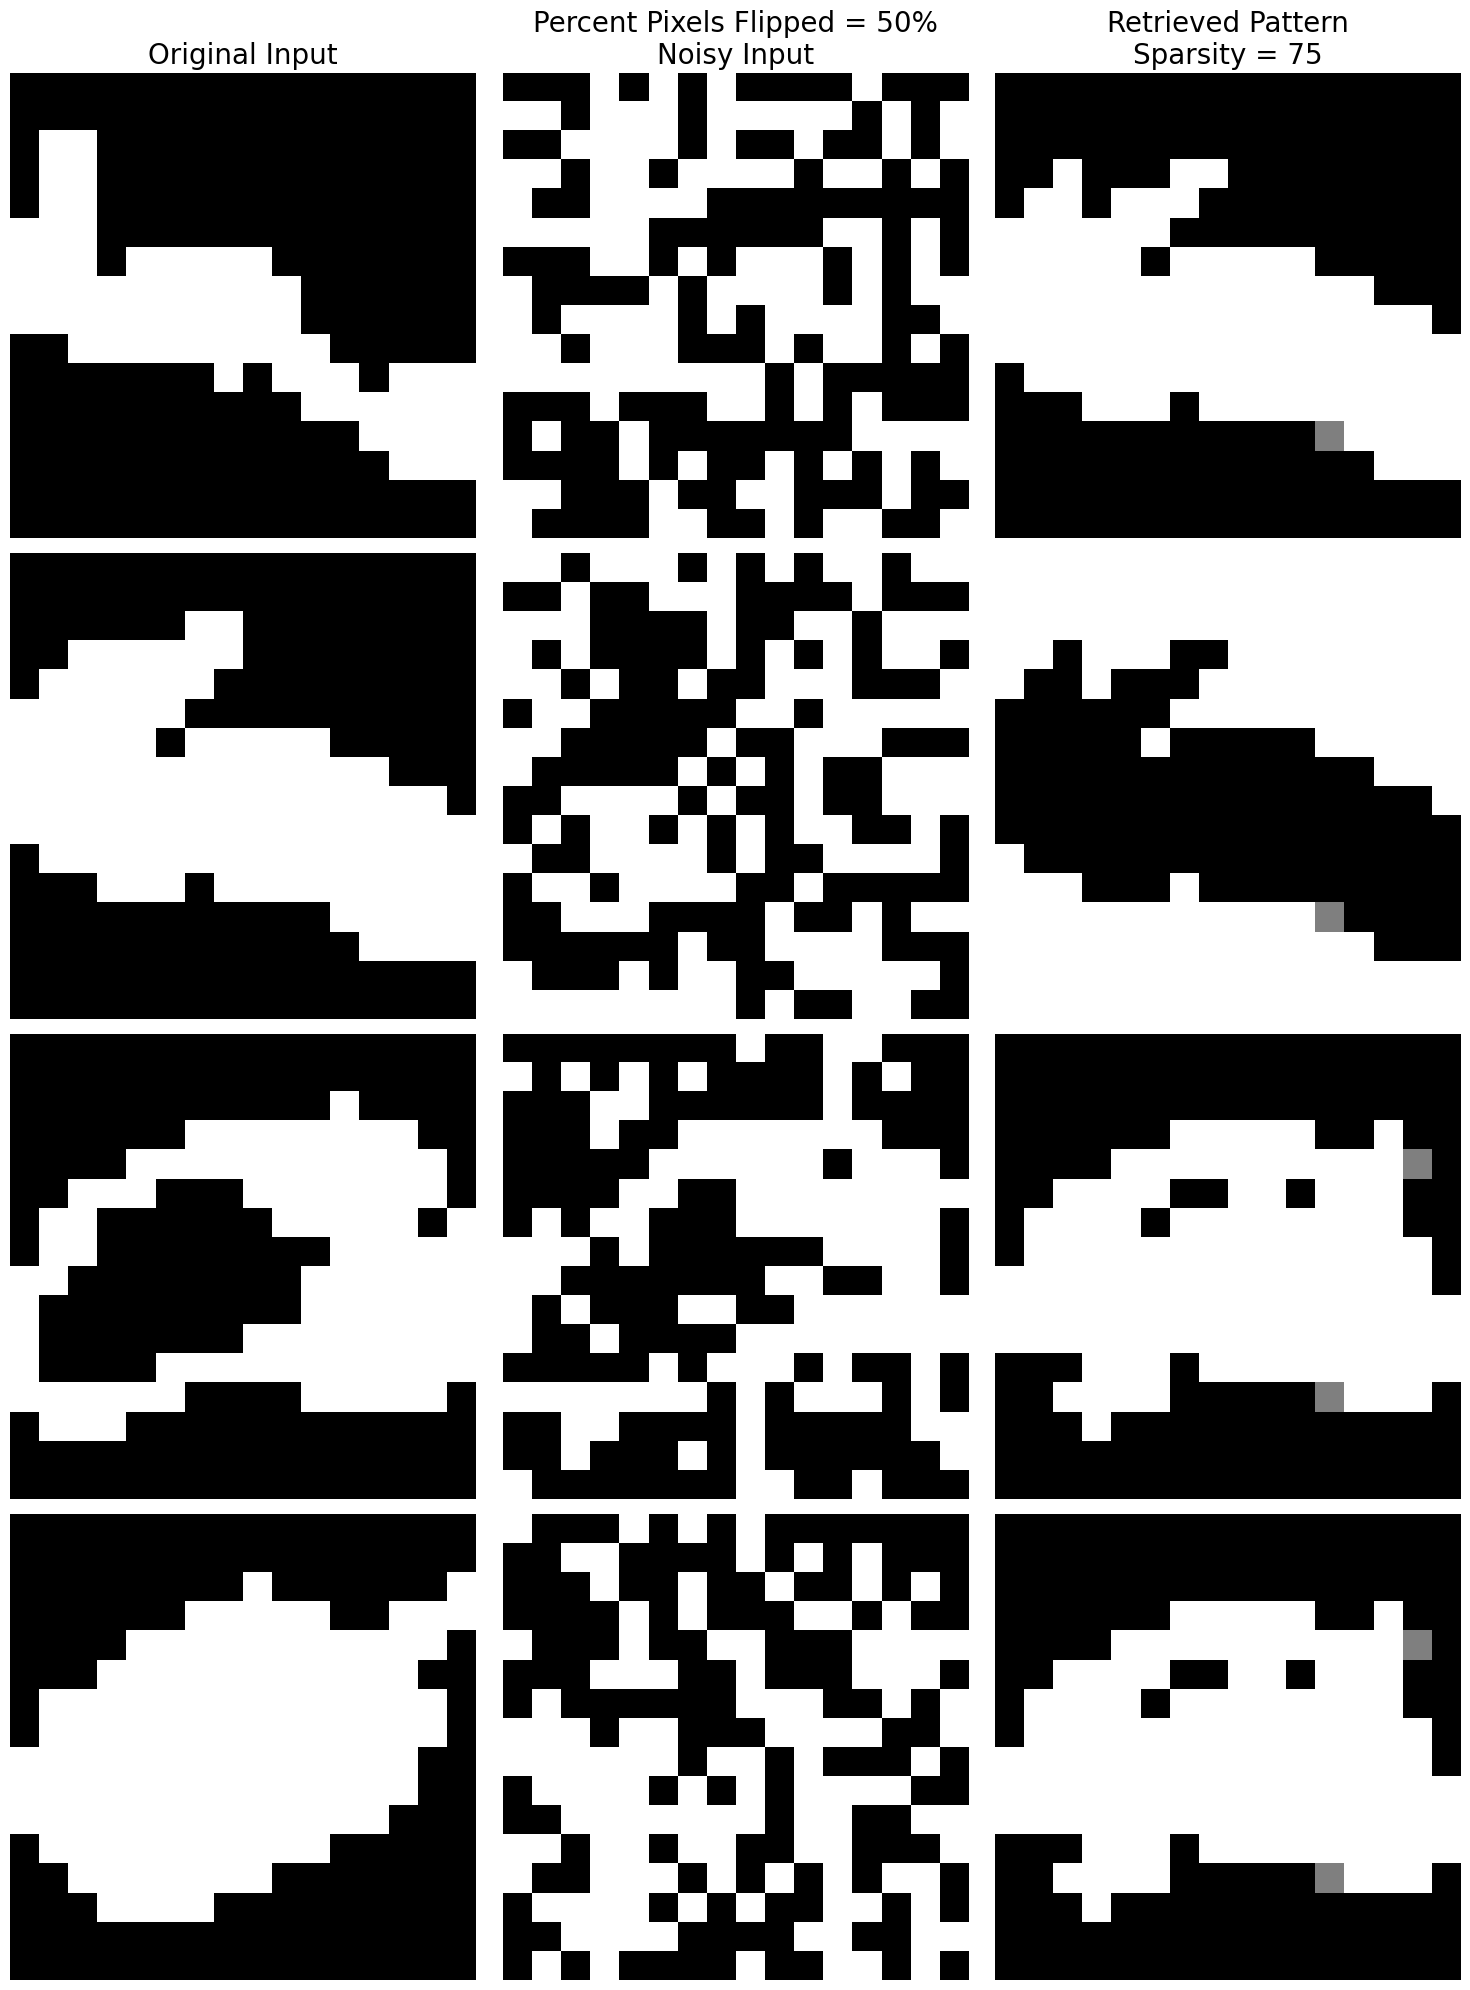

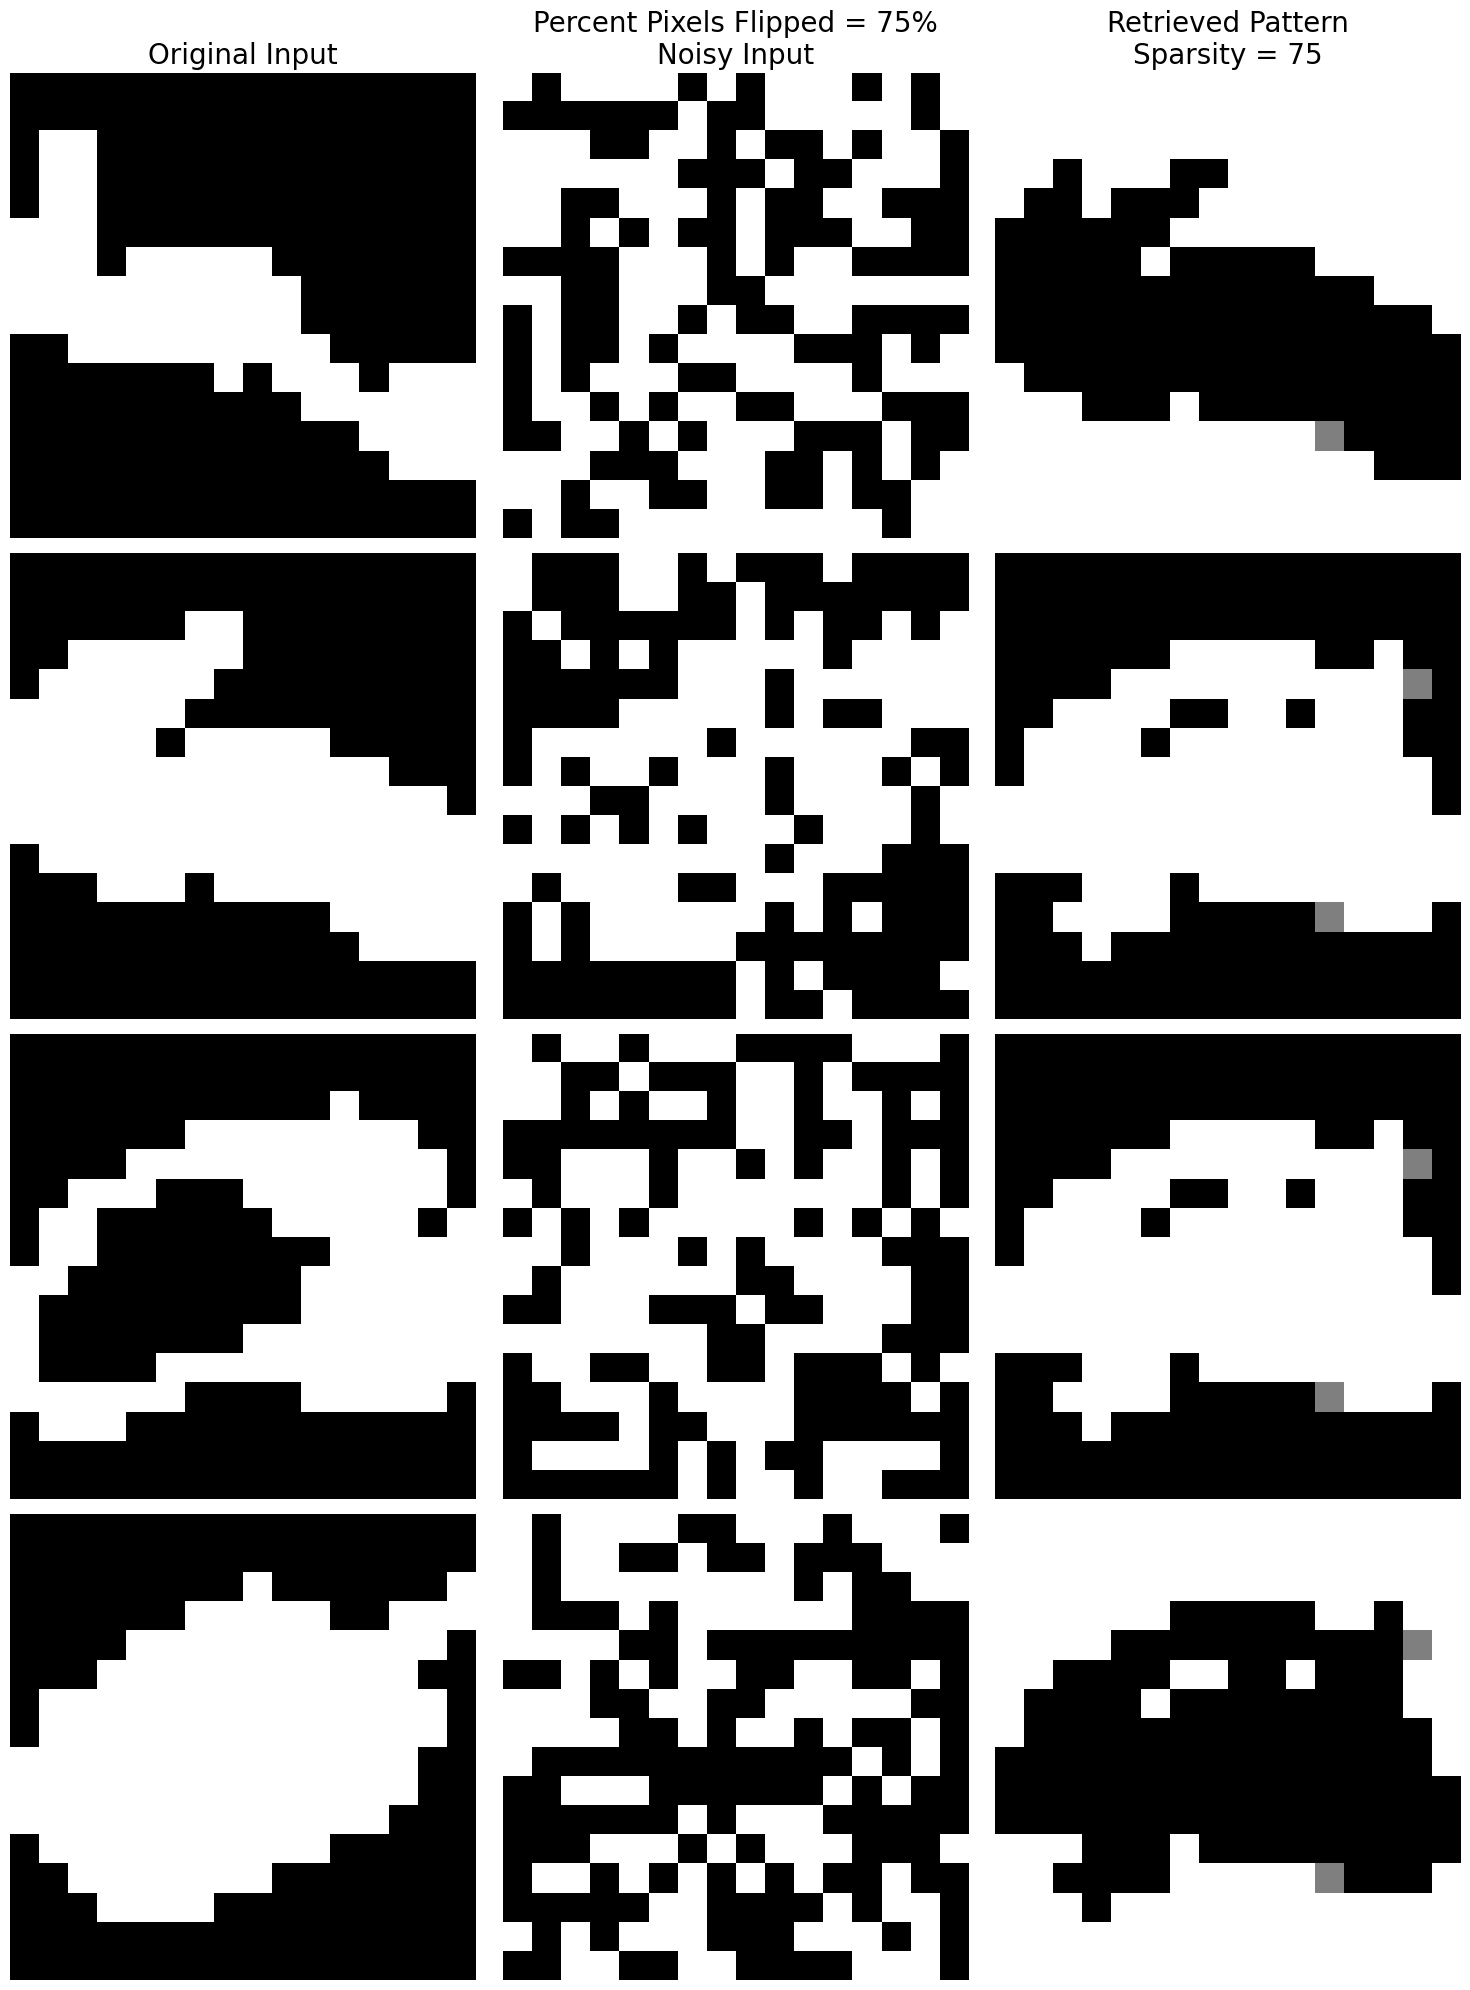

In [15]:
def sparse_pruning(weight_matrix, sparsity, show_plot) -> torch.Tensor:
    """
    Apply sparse pruning the weight matrix a Hopfield network
    
    Args:
        weight_matrix (torch.Tensor): The weight matrix of the Hopfield network.
        sparsity (float): The desired sparsity level, a percentage between 0 and 100.
    
    Returns:
        torch.Tensor: The pruned weight matrix.
    """
    
    # Plot the initial weight matrix
    if show_plot:
        plt.figure(2)
        weight_map = plt.imshow(weight_matrix, cmap=cm.coolwarm)
        color_bar = plt.colorbar(weight_map)
        color_bar.ax.tick_params(labelsize=11)
        plt.title("Initial Weight Matrix")
    
    indices = weight_matrix.flatten(0)
    num_weights = len(indices)
    num_pruned_weights = int(num_weights * (sparsity / 100))
    
    # No weights to prune
    if num_pruned_weights == 0:
        return weight_matrix

    indices_to_prune = np.random.choice(num_weights, num_pruned_weights, replace=False)
    
    pruned_weight_matrix = weight_matrix.clone()
    flat_pruned_weight_mat = pruned_weight_matrix.flatten()
    flat_pruned_weight_mat[indices_to_prune] = 0
    pruned_weight_matrix = flat_pruned_weight_mat.view(weight_matrix.size(0), weight_matrix.size(0))
    
    # Plot the pruned weight matrix
    if show_plot:
        plt.figure(3)
        weight_map = plt.imshow(pruned_weight_matrix, cmap=cm.coolwarm)
        color_bar = plt.colorbar(weight_map)
        color_bar.ax.tick_params(labelsize=11)
        plt.title(f"Pruned Weight Matrix of Sparsity {sparsity}%", fontsize=13)
        plt.xticks(fontsize=11)
        plt.yticks(fontsize=11)
        plt.show()
    
    return pruned_weight_matrix

def run_sparse_pruning(weight, binary_inputs, noisy_inputs, sparsity, bias, show_plot) -> None:
    """
    Runs a trial with the sparsity level
    
    Args:
        sparsity (float): The desired sparsity level, a percentage between 0 and 100.
        bias (torch.Tensor): The bias for the Hopfield network.
        pruning_method (str): The method of pruning to be used.
    """
    pruned_weight = sparse_pruning(weight, sparsity, show_plot)
    model = HopfieldNetwork(num_neurons, pruned_weight, bias)

    async_update = True
    pruning = {'sparse': sparsity}

    sparse_pruned_pat = model.retrieve(dim, weight, binary_inputs, noisy_inputs, removed_percents, num_iterations, async_update, pruning, show_plot)
    
    return sparse_pruned_pat
    
def compare_sparse_pruning(weight, binary_inputs, noisy_inputs, sparsities, bias, show_plot) -> dict:
    """
    Compare the performance of the Hopfield network with different sparsity levels

    Args:
        sparsities (list): List of sparsity levels
        
    Returns:
        dict: A dictionary containing the retrieved patterns for each sparsity level.
    """
    
    sparse_pruned_patterns = {}
    for sparsity in sparsities:
        print(f"Running trial with a sparsity of {sparsity}")
        sparse_pruned_patterns[sparsity] = run_sparse_pruning(weight, binary_inputs, noisy_inputs, sparsity, bias, show_plot)
    
    return sparse_pruned_patterns

sparsities = [25, 50, 75]
sparse_pruned_patterns = compare_sparse_pruning(weight, binary_inputs, noisy_inputs, sparsities, bias, show_plot=True)

# Sparse pruning spectrum

[  0   5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85
  90  95 100]
energy values for noisy input 0 [tensor(-11236.5000), tensor(-11236.5000)]
energy values for noisy input 1 [tensor(-11236.5000), tensor(-11236.5000), tensor(-11387.5000), tensor(-12692.5000), tensor(-12692.5000)]
energy values for noisy input 2 [tensor(-11236.5000), tensor(-11236.5000), tensor(-11387.5000), tensor(-12692.5000), tensor(-12692.5000), tensor(-10340.5000), tensor(-10340.5000)]
energy values for noisy input 3 [tensor(-11236.5000), tensor(-11236.5000), tensor(-11387.5000), tensor(-12692.5000), tensor(-12692.5000), tensor(-10340.5000), tensor(-10340.5000), tensor(-12727.5000), tensor(-12727.5000)]
energy values for noisy input 4 [tensor(-11236.5000), tensor(-11236.5000), tensor(-11387.5000), tensor(-12692.5000), tensor(-12692.5000), tensor(-10340.5000), tensor(-10340.5000), tensor(-12727.5000), tensor(-12727.5000), tensor(-12571.5000), tensor(-12727.5000), tensor(-12727.5000)]
energy values

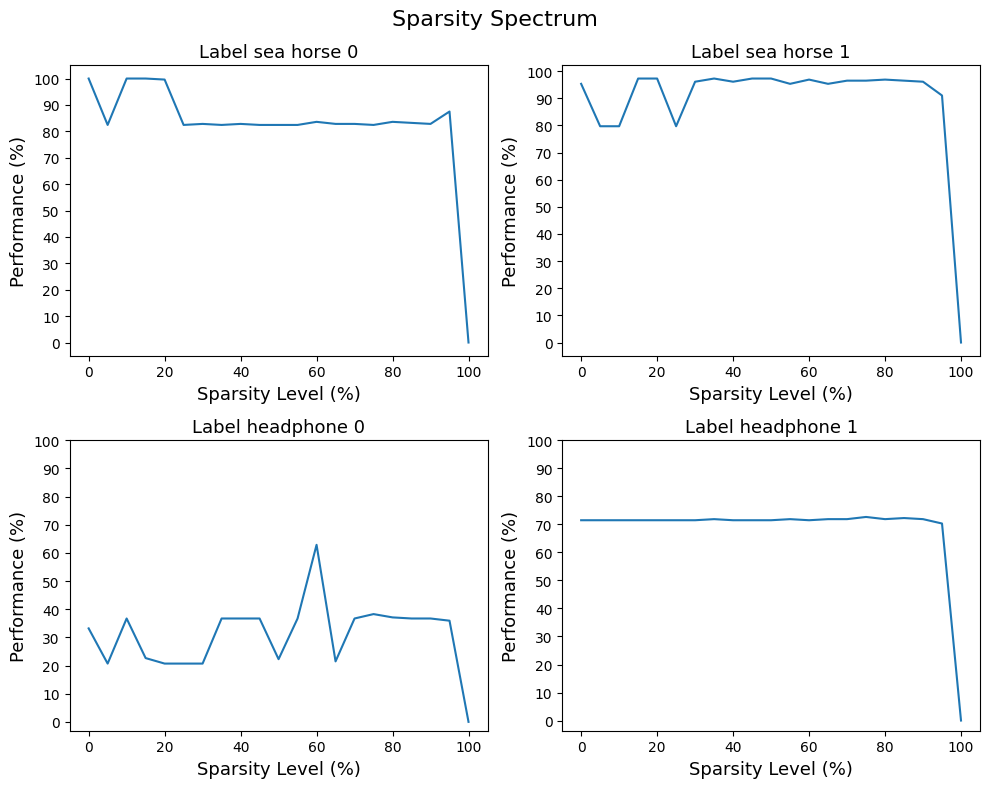

In [16]:

sparsities_spectrum = np.arange(0, 101, 5)
print(sparsities_spectrum)

# Separate the sparsity performace for each input
sparsities_perf = {i: [] for i in range(len(binary_inputs))} 

for sparsity in sparsities_spectrum:
    for i, binary_input in enumerate(binary_inputs):  # Make sure that the binary input and the sparse pruned pattern correspond to each other
        sparse_pruned_pattern = run_sparse_pruning(weight, binary_inputs, noisy_inputs, sparsity, bias, show_plot=False)
        sparse_pruned_pattern = sparse_pruned_pattern[i]
        perf = pruning_performance(binary_input, sparse_pruned_pattern)
        sparsities_perf[i].append(perf)

def plot_sparsities_spectrum(sparsities_spectrum, sparsities_perf, selected_labels, num_labels, num_images_per_label):
    num_rows = num_labels
    num_cols = num_images_per_label

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 4 * num_rows))
    fig.suptitle("Sparsity Spectrum", fontsize=16)

    # Ensure axs is always 2D
    if num_rows == 1 or num_cols == 1:
        axs = np.atleast_2d(axs).reshape(num_rows, num_cols)
    
    for i in range(num_rows):
        for j in range(num_cols):
            idx = i * num_cols + j
            performance = sparsities_perf[idx]
            label = selected_labels[idx]
            axs[i, j].plot(sparsities_spectrum, performance)
            axs[i, j].set_xlabel('Sparsity Level (%)', fontsize=13)
            axs[i, j].set_ylabel('Performance (%)', fontsize=13)
            axs[i, j].set_yticks(range(0, 101, 10), fontsize=10)
            axs[i, j].set_title(f'Label {label} {j}', fontsize=13)
            axs[i, j].axis('on')

    plt.tight_layout()
    plt.xticks(fontsize=10)
    plt.savefig(f"./images/spectrum/sparsity_spectrum.png")
    plt.show()
    plt.close(fig)

plot_sparsities_spectrum(sparsities_spectrum, sparsities_perf, selected_labels, num_labels, num_images_per_label)

# Magnitude Pruning

In [36]:
def magnitude_pruning(weight_matrix, threshold, show_plot) -> torch.Tensor:
    """
    Apply sparse pruning the weight matrix a Hopfield network
    
    Args:
        weight_matrix (torch.Tensor): The weight matrix of the Hopfield network.
        threshold (float): The desired magnitude threshold to keep
    
    Returns:
        torch.Tensor: The pruned weight matrix.
    """
    
    # Plot the initial weight matrix
    if show_plot:
        plt.figure(2)
        weight_map = plt.imshow(weight_matrix, cmap=cm.coolwarm)
        plt.colorbar(weight_map)
        plt.title("Initial Weight Matrix")
    
    weight_arr = weight_matrix.flatten().clone()
    weight_arr[weight_arr <= threshold] = 0
    pruned_weight_matrix = weight_arr.view(weight_matrix.size(0), weight_matrix.size(0)).clone().detach()
    
    # Plot the pruned weight matrix
    if show_plot:
        plt.figure(3)
        weight_map = plt.imshow(pruned_weight_matrix, cmap=cm.coolwarm)
        plt.colorbar(weight_map)
        plt.title(f"Pruned Weight Matrix of Magnitude Threshold {threshold:.2f}", fontsize=10)
        plt.show()

    return pruned_weight_matrix

def run_magnitude_pruning(weight, binary_inputs, noisy_inputs, magnitude, bias, show_plot) -> None:
    """
    Runs a trial with a specified magnitude threshold.
    
    Args:
        threshold (float): The magnitude threshold. Weights above this threshold are retained.
    
    Returns:
        torch.Tensor: 
    """
    pruned_weight = magnitude_pruning(weight, magnitude, show_plot)
    model = HopfieldNetwork(num_neurons, pruned_weight, bias)

    async_update = True
    pruning = {'magnitude': magnitude}

    magnitude_pruned_pat = model.retrieve(dim, weight, binary_inputs, noisy_inputs, removed_percents, num_iterations, async_update, pruning, show_plot)
    
    return magnitude_pruned_pat
    
def compare_magnitude_pruning(weight, binary_inputs, noisy_inputs, magnitudes, bias, show_plot) -> dict:
    """
    Compare the performance of the Hopfield network with different magnitude levels

    Args:
        magnitudes (list): List of magnitudes
        
    Returns:
        dict: A dictionary containing the retrieved patterns for each magnitude level.
    """
    
    magnitude_pruned_patterns = {}
    for magnitude in magnitudes:
        print(f"Running trial with a magnitude of {magnitude:.2f}")
        magnitude_pruned_patterns[magnitude] = run_magnitude_pruning(weight, binary_inputs, noisy_inputs, magnitude, bias, show_plot)
    
    return magnitude_pruned_patterns

median unique values:  0.0
mean unique values:  0.0
Running trial with a magnitude of 0.00


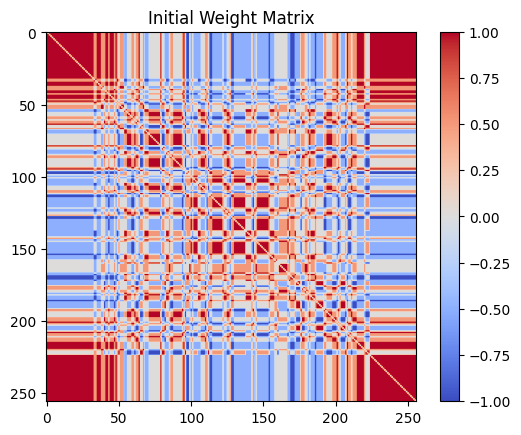

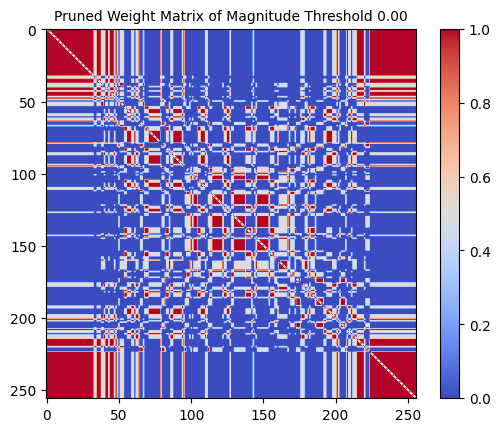

energy values for noisy input 0 [tensor(-7872.5000), tensor(-7877.5000), tensor(-7877.5000)]
energy values for noisy input 1 [tensor(-7872.5000), tensor(-7877.5000), tensor(-7877.5000), tensor(-7816.5000), tensor(-7877.5000), tensor(-7877.5000)]
energy values for noisy input 2 [tensor(-7872.5000), tensor(-7877.5000), tensor(-7877.5000), tensor(-7816.5000), tensor(-7877.5000), tensor(-7877.5000), tensor(-7071.5000), tensor(-7094.5000), tensor(-7094.5000)]
energy values for noisy input 3 [tensor(-7872.5000), tensor(-7877.5000), tensor(-7877.5000), tensor(-7816.5000), tensor(-7877.5000), tensor(-7877.5000), tensor(-7071.5000), tensor(-7094.5000), tensor(-7094.5000), tensor(-7442.5000), tensor(-7442.5000)]
energy values for noisy input 4 [tensor(-7872.5000), tensor(-7877.5000), tensor(-7877.5000), tensor(-7816.5000), tensor(-7877.5000), tensor(-7877.5000), tensor(-7071.5000), tensor(-7094.5000), tensor(-7094.5000), tensor(-7442.5000), tensor(-7442.5000), tensor(-7442.5000), tensor(-7442.50

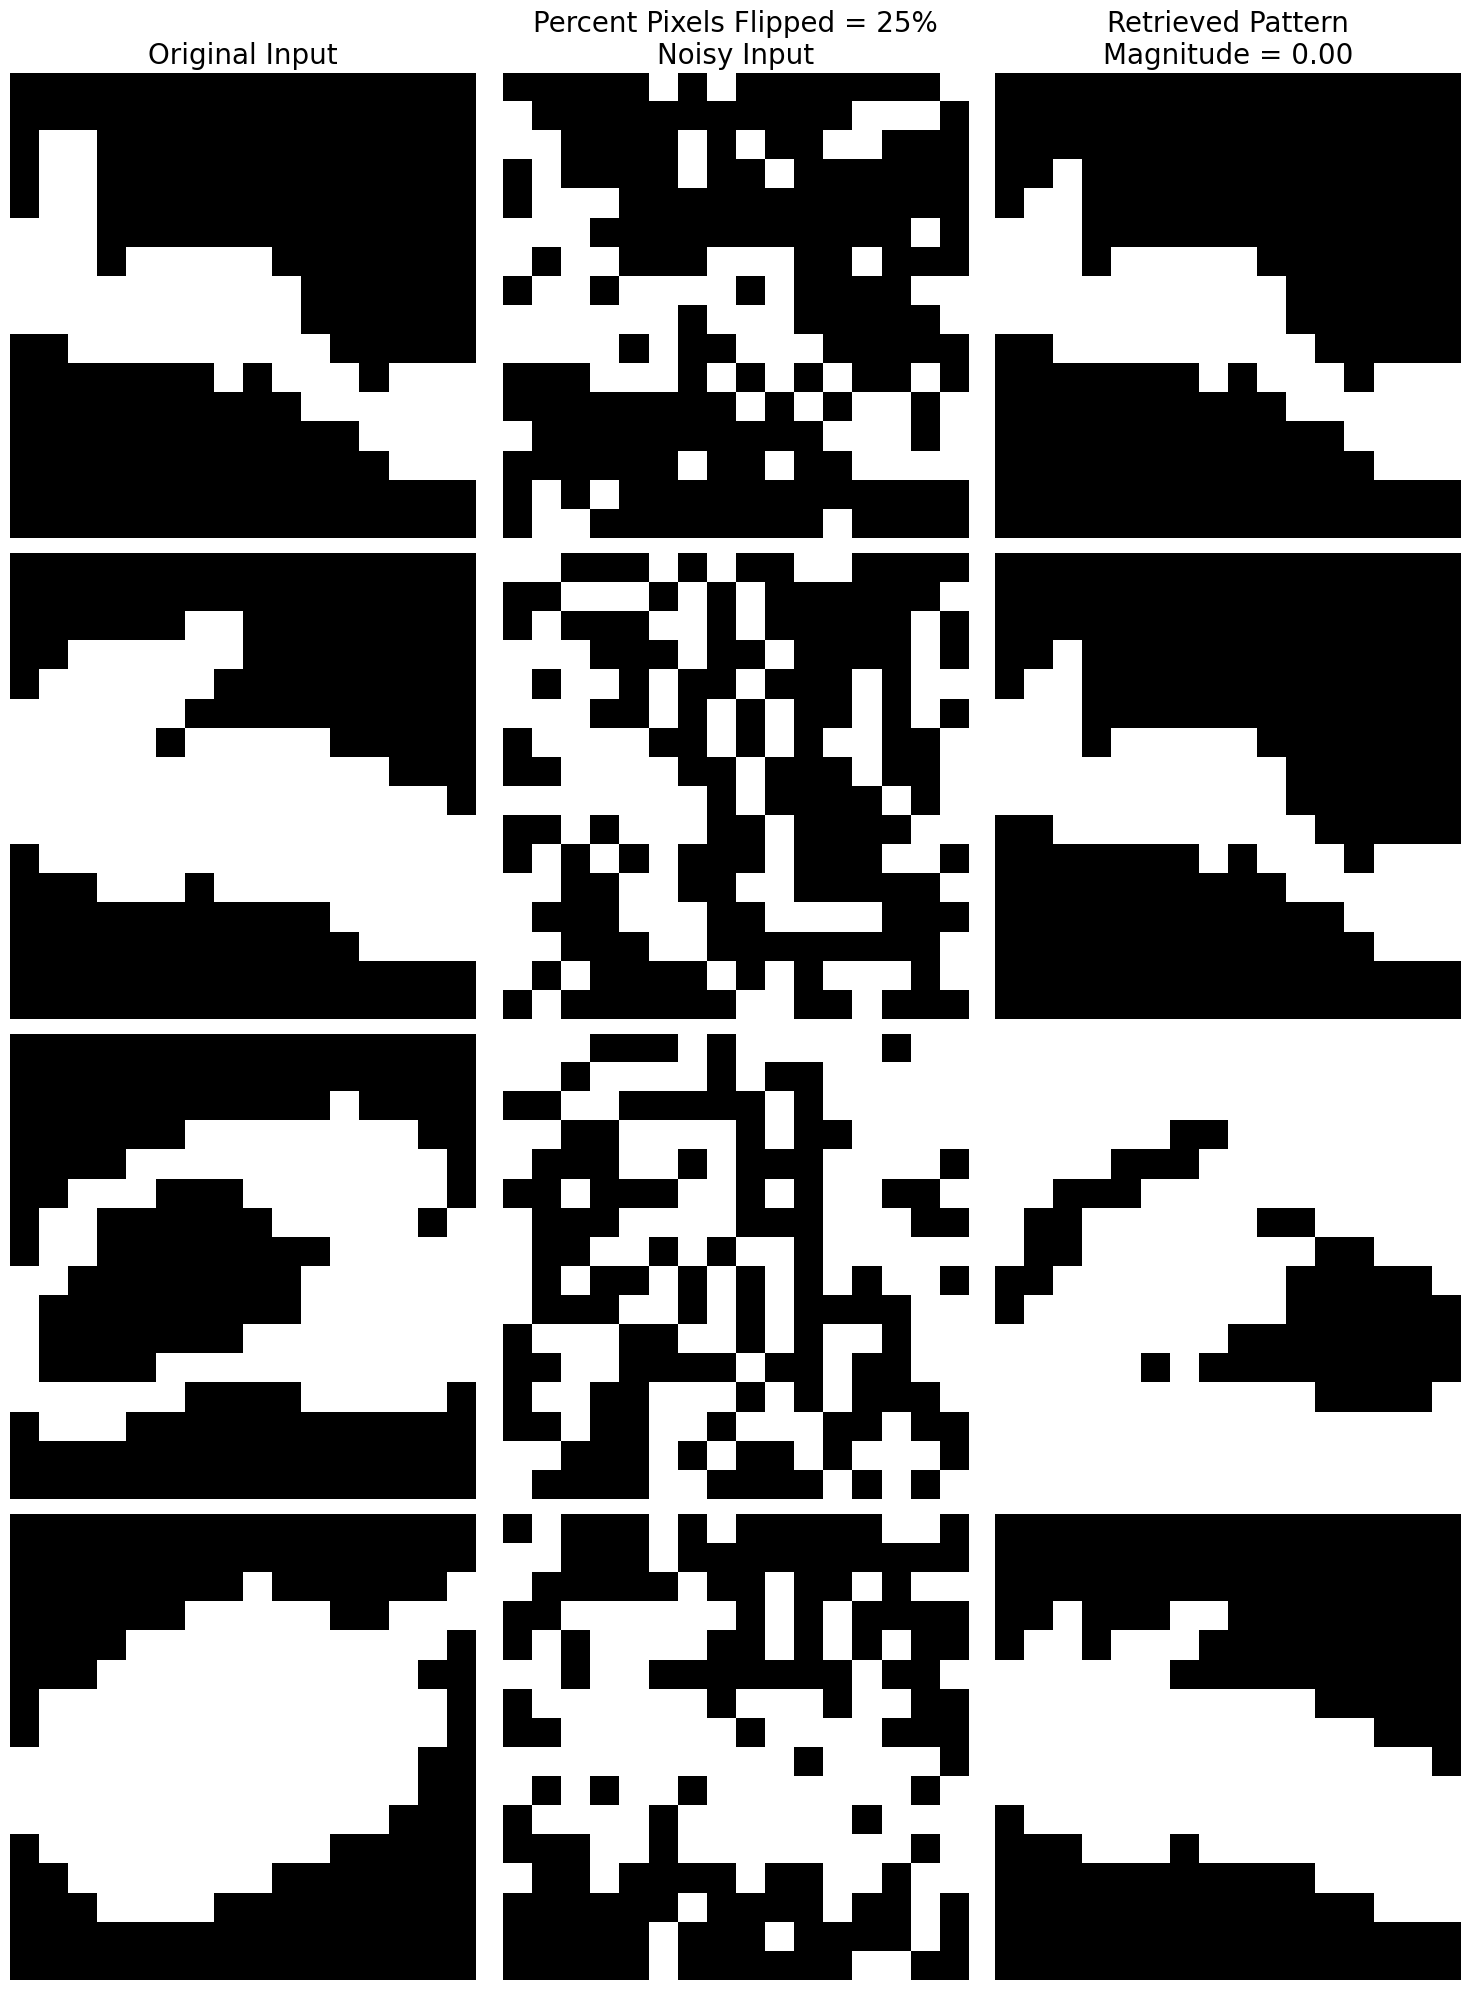

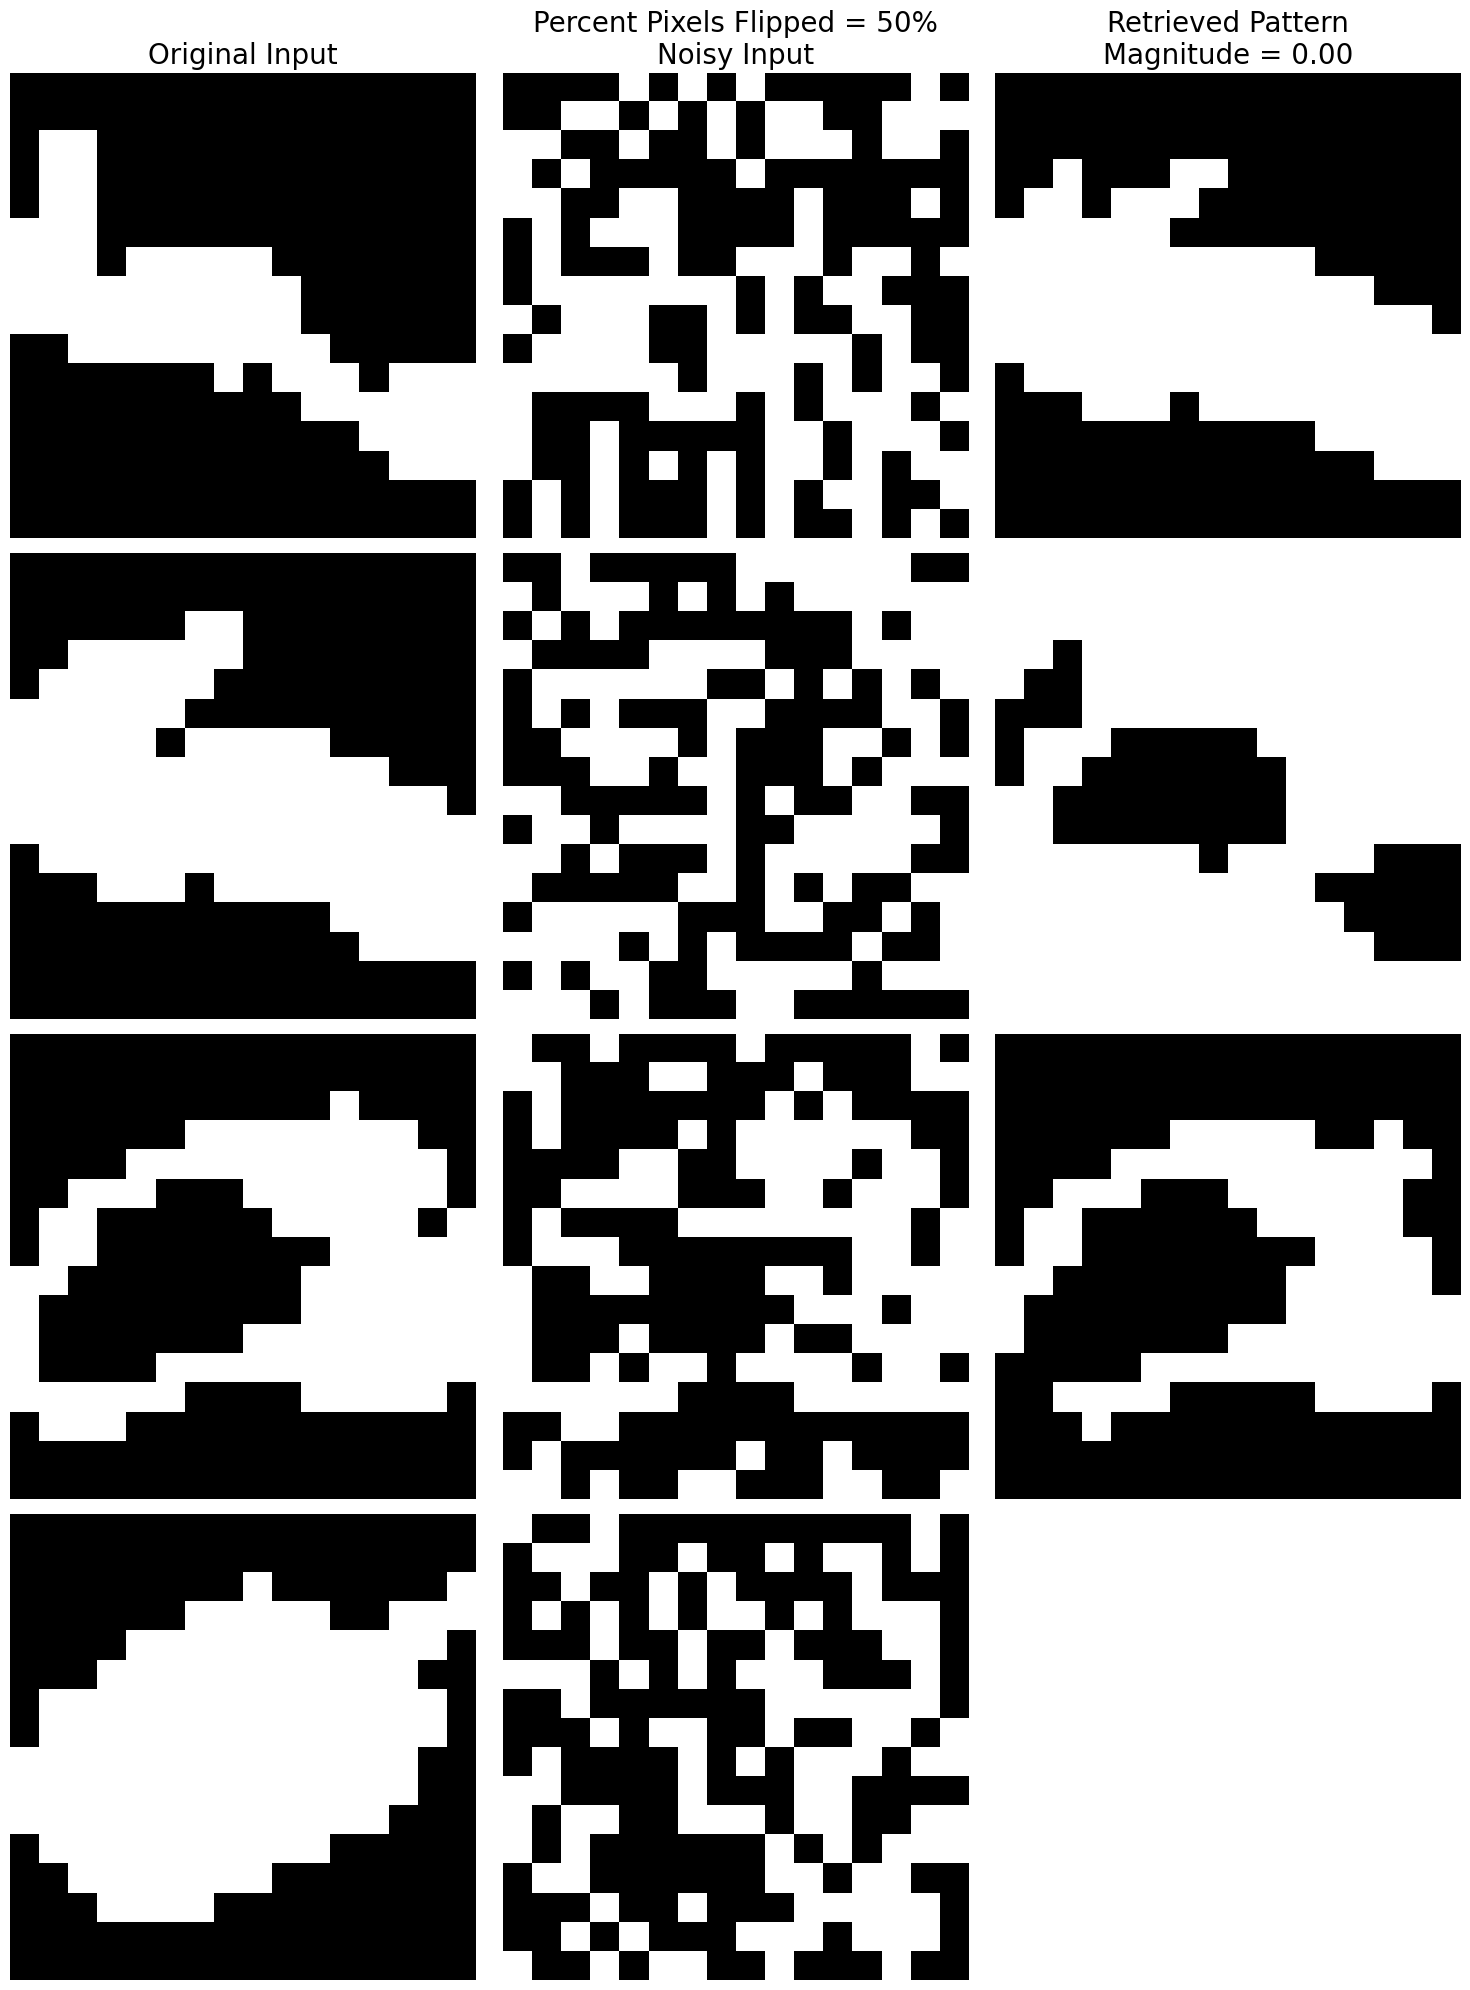

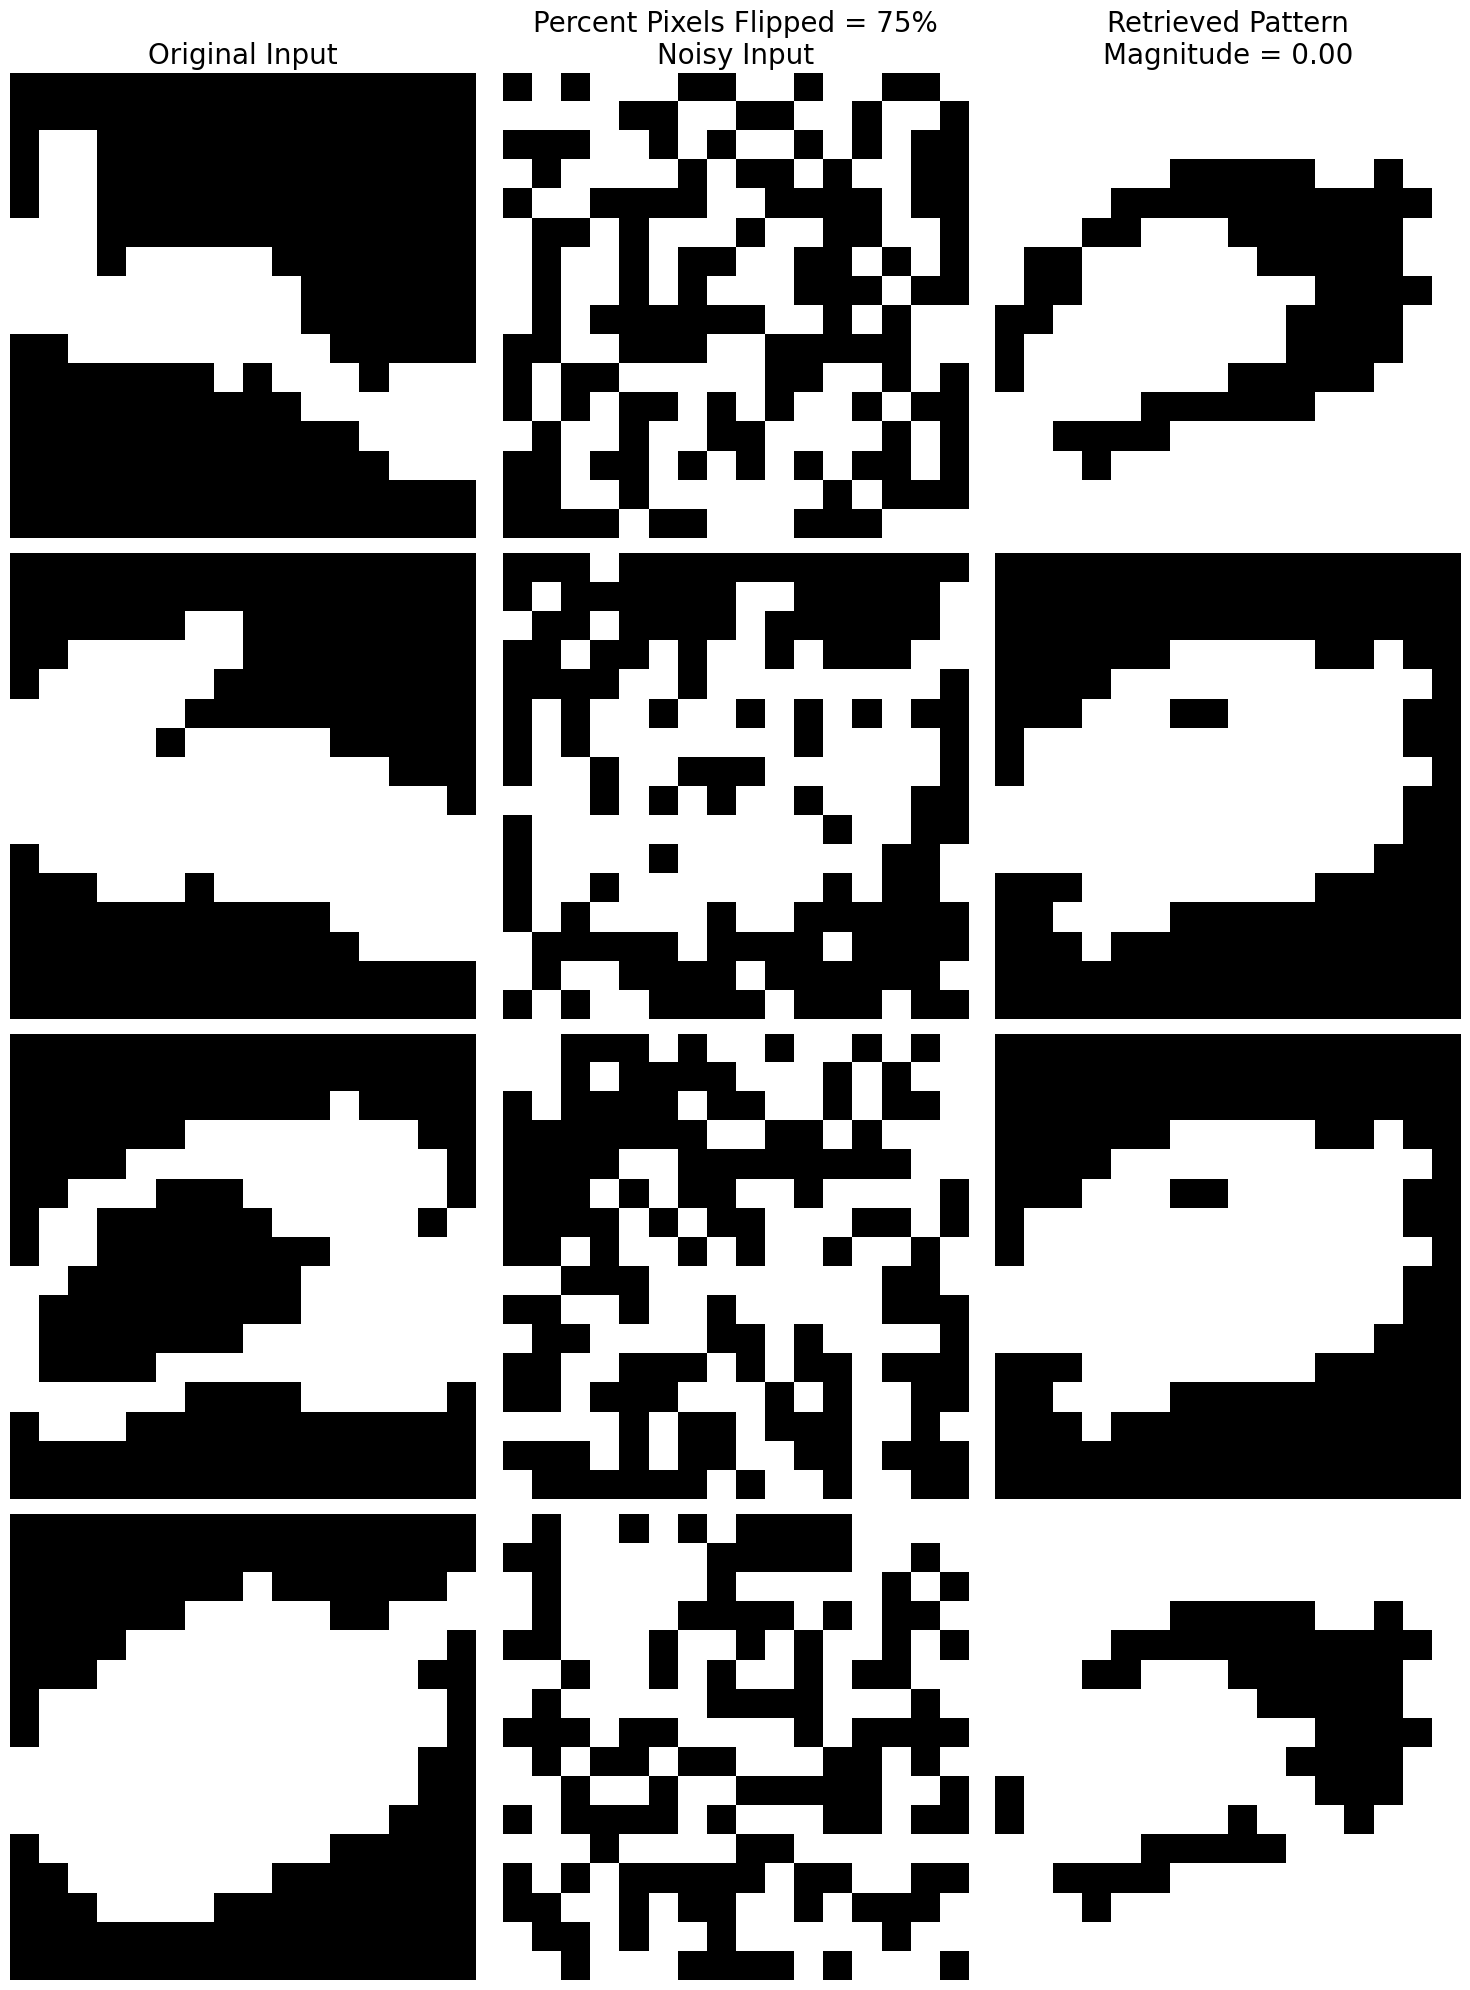

Running trial with a magnitude of 0.00


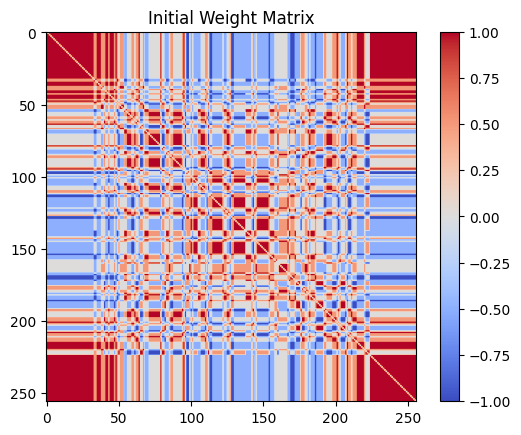

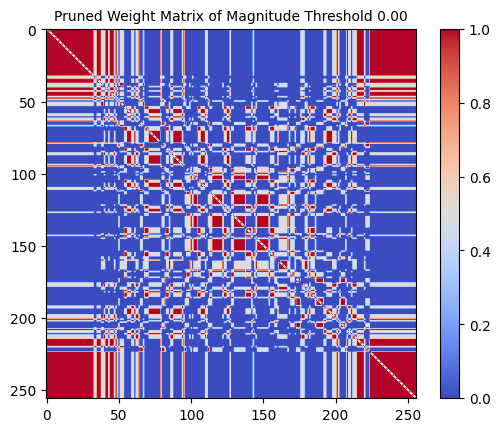

energy values for noisy input 0 [tensor(-7877.5000), tensor(-7877.5000)]
energy values for noisy input 1 [tensor(-7877.5000), tensor(-7877.5000), tensor(-8223.5000), tensor(-8664.5000), tensor(-8664.5000)]
energy values for noisy input 2 [tensor(-7877.5000), tensor(-7877.5000), tensor(-8223.5000), tensor(-8664.5000), tensor(-8664.5000), tensor(-7840.5000), tensor(-8356.5000), tensor(-8664.5000), tensor(-8664.5000)]
energy values for noisy input 3 [tensor(-7877.5000), tensor(-7877.5000), tensor(-8223.5000), tensor(-8664.5000), tensor(-8664.5000), tensor(-7840.5000), tensor(-8356.5000), tensor(-8664.5000), tensor(-8664.5000), tensor(-7442.5000), tensor(-7442.5000)]
energy values for noisy input 4 [tensor(-7877.5000), tensor(-7877.5000), tensor(-8223.5000), tensor(-8664.5000), tensor(-8664.5000), tensor(-7840.5000), tensor(-8356.5000), tensor(-8664.5000), tensor(-8664.5000), tensor(-7442.5000), tensor(-7442.5000), tensor(-7432.5000), tensor(-7442.5000), tensor(-7442.5000)]
energy values f

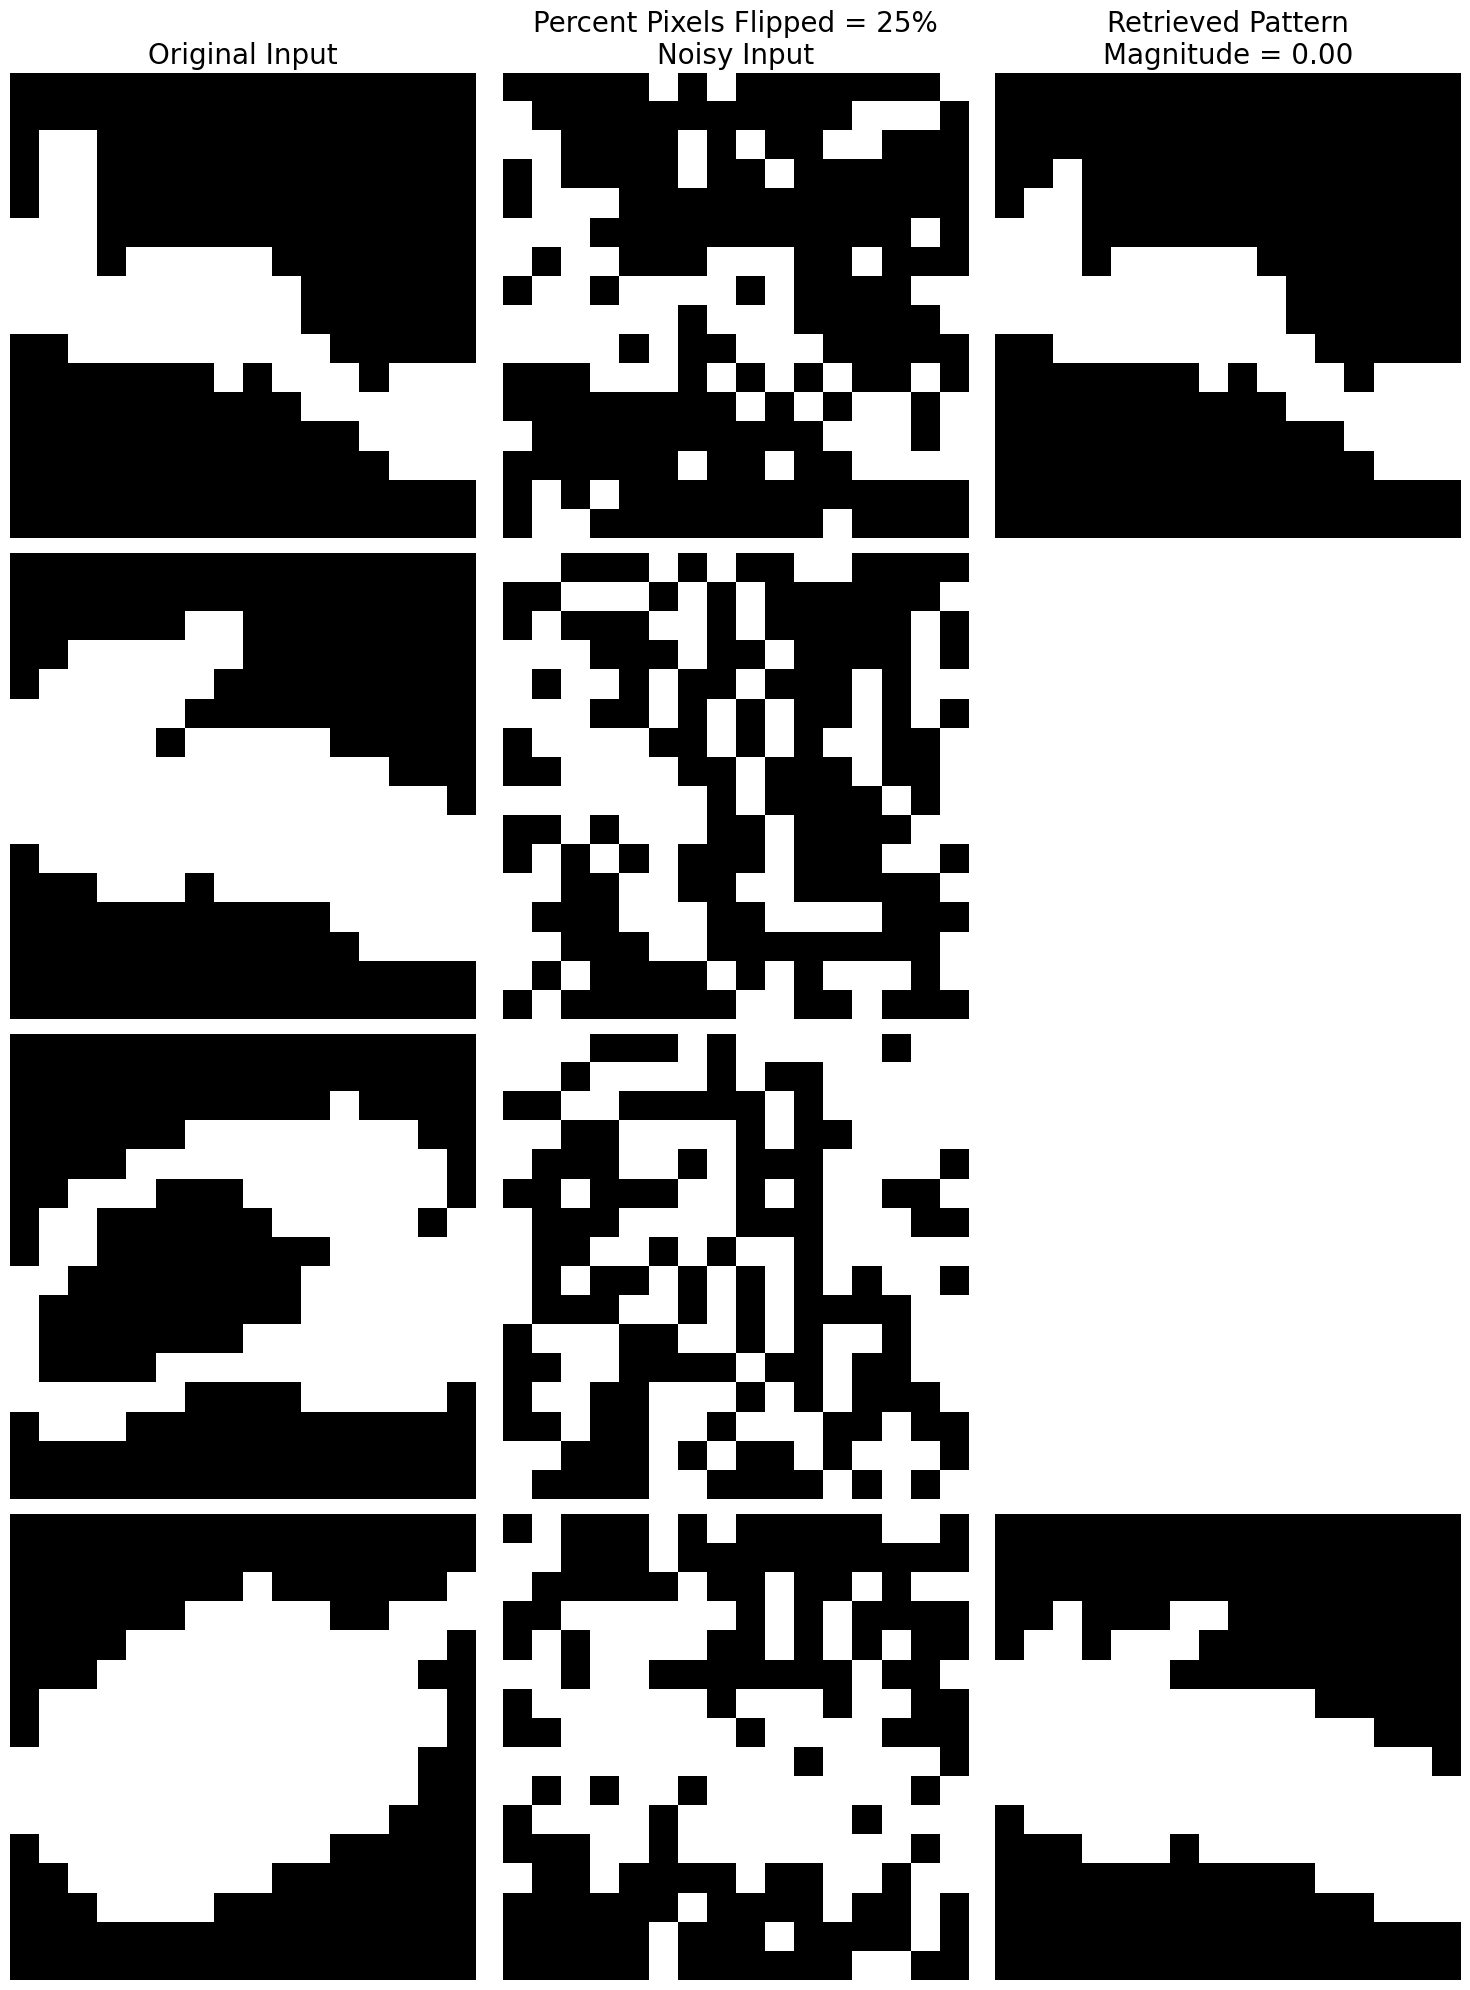

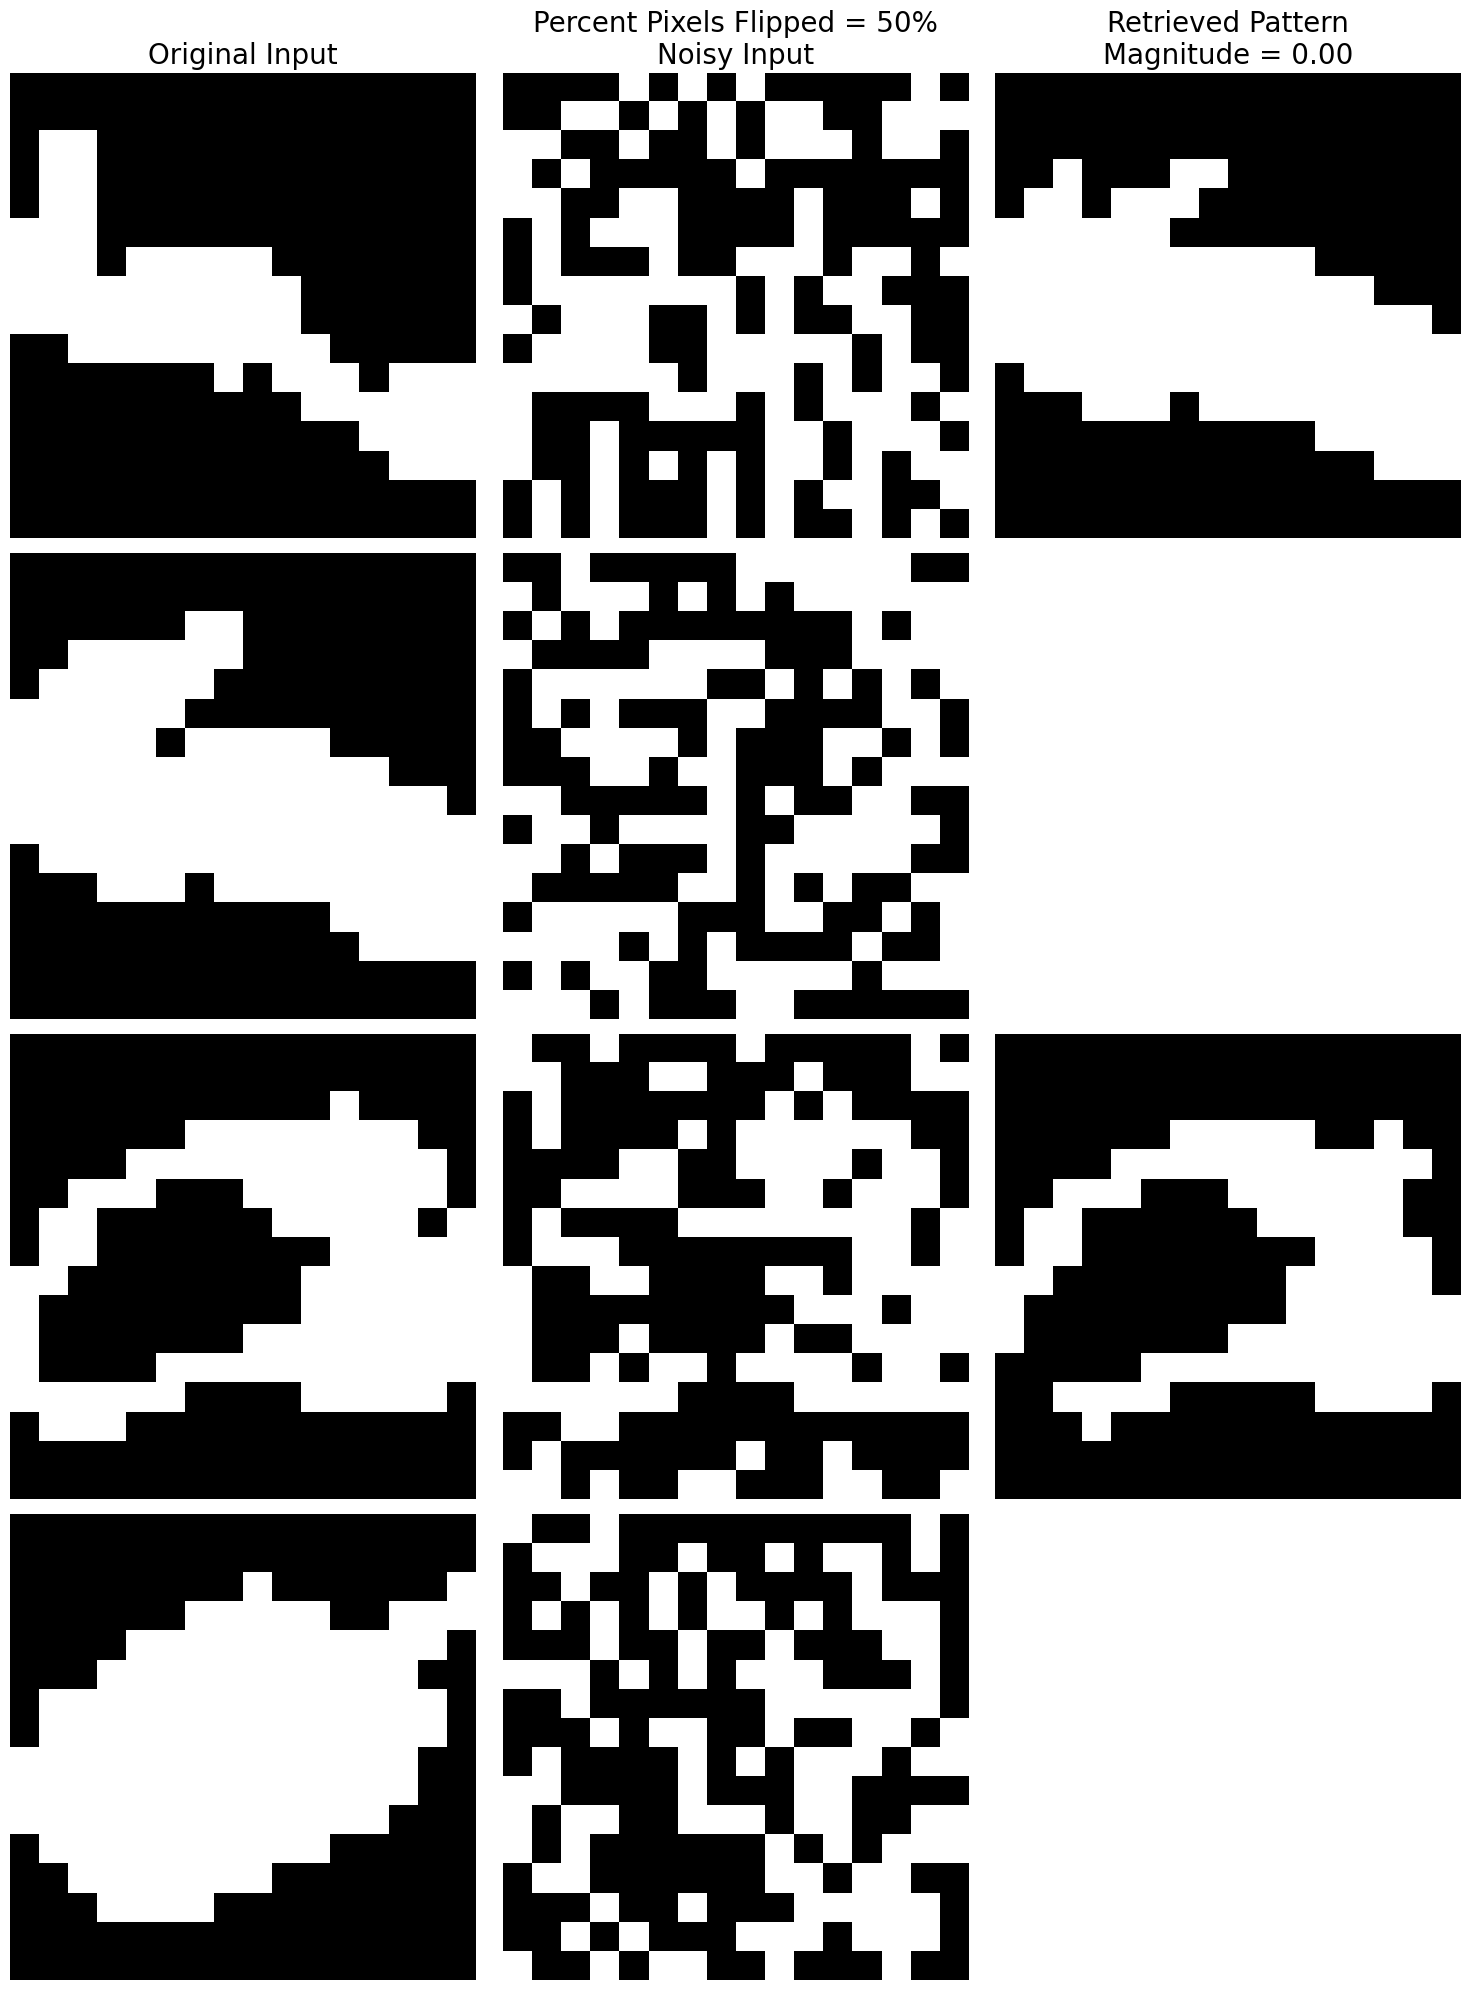

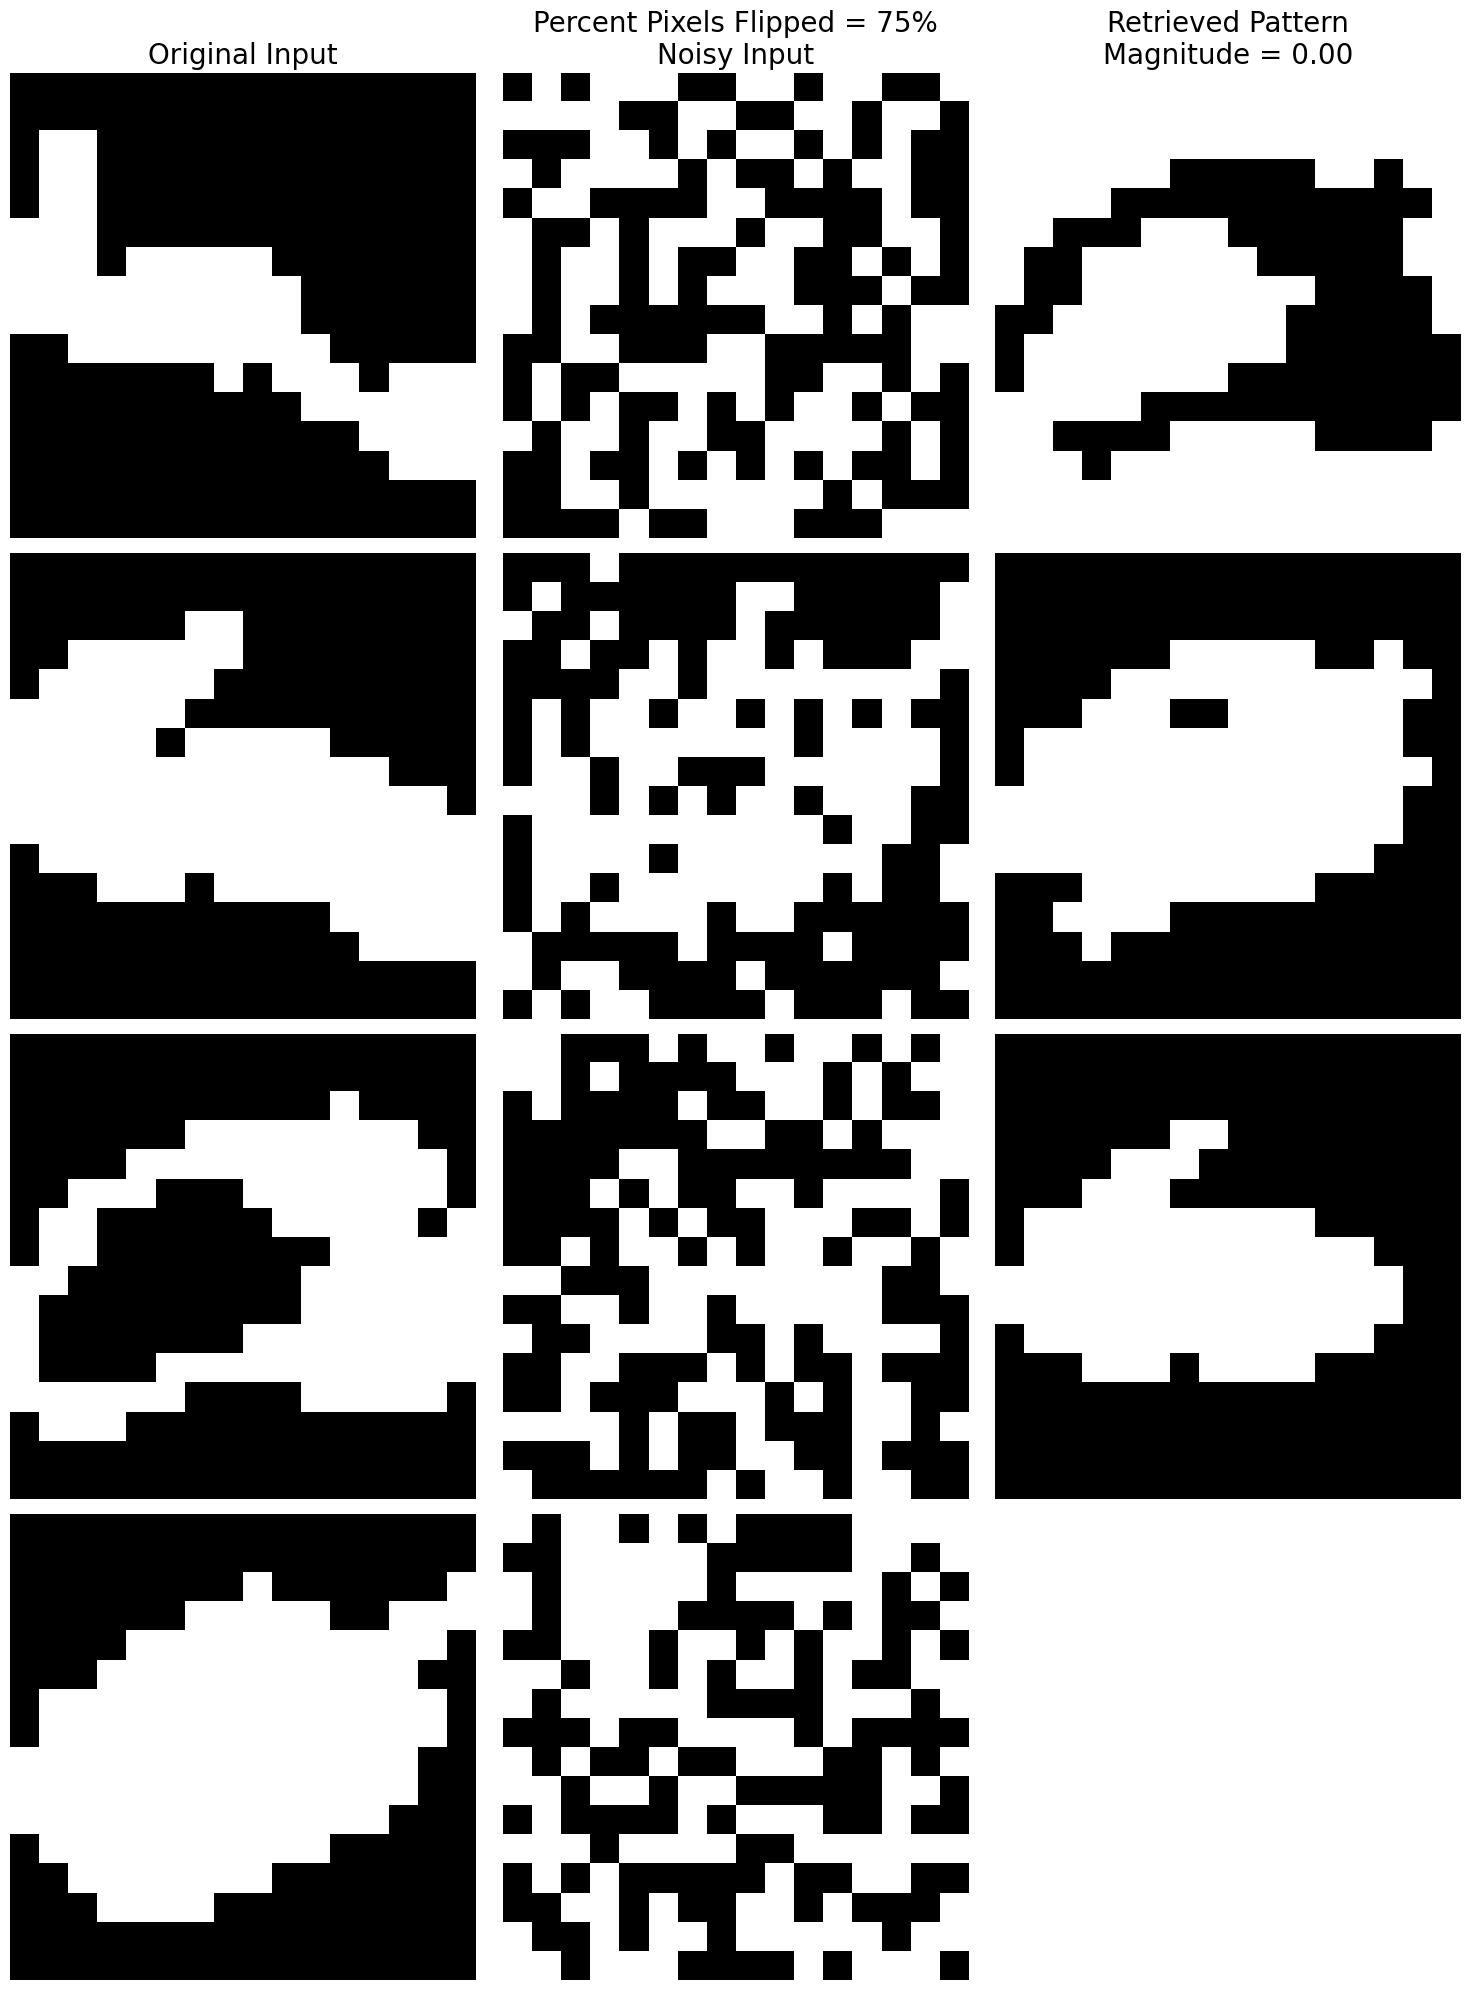

In [37]:
# Run magnitude pruning
weight_val_median = np.median(np.unique(weight))
weight_val_mean = np.mean(np.unique(weight))

print("median unique values: ", weight_val_median)
print("mean unique values: ", weight_val_mean)

magnitudes = [weight_val_median, weight_val_mean]

magnitude_pruned_patterns = compare_magnitude_pruning(weight, binary_inputs, noisy_inputs, magnitudes, bias, show_plot=True)

## Magnitude spectrum of how magnitude pruning the weight matrix affects the performance

magnitude spectrum values:  [-1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75  1.  ]
length of magnitude spectrum:  9
length of binary inputs:  4
energy values for noisy input 0 [tensor(-9470.5000), tensor(-9470.5000)]
energy values for noisy input 1 [tensor(-9470.5000), tensor(-9470.5000), tensor(-9219.5000), tensor(-10815.5000), tensor(-10850.5000), tensor(-10850.5000)]
energy values for noisy input 2 [tensor(-9470.5000), tensor(-9470.5000), tensor(-9219.5000), tensor(-10815.5000), tensor(-10850.5000), tensor(-10850.5000), tensor(-9849.5000), tensor(-10822.5000), tensor(-10850.5000), tensor(-10850.5000)]
energy values for noisy input 3 [tensor(-9470.5000), tensor(-9470.5000), tensor(-9219.5000), tensor(-10815.5000), tensor(-10850.5000), tensor(-10850.5000), tensor(-9849.5000), tensor(-10822.5000), tensor(-10850.5000), tensor(-10850.5000), tensor(-10850.5000), tensor(-10850.5000)]
energy values for noisy input 4 [tensor(-9470.5000), tensor(-9470.5000), tensor(-9219.5000), tensor(-10815

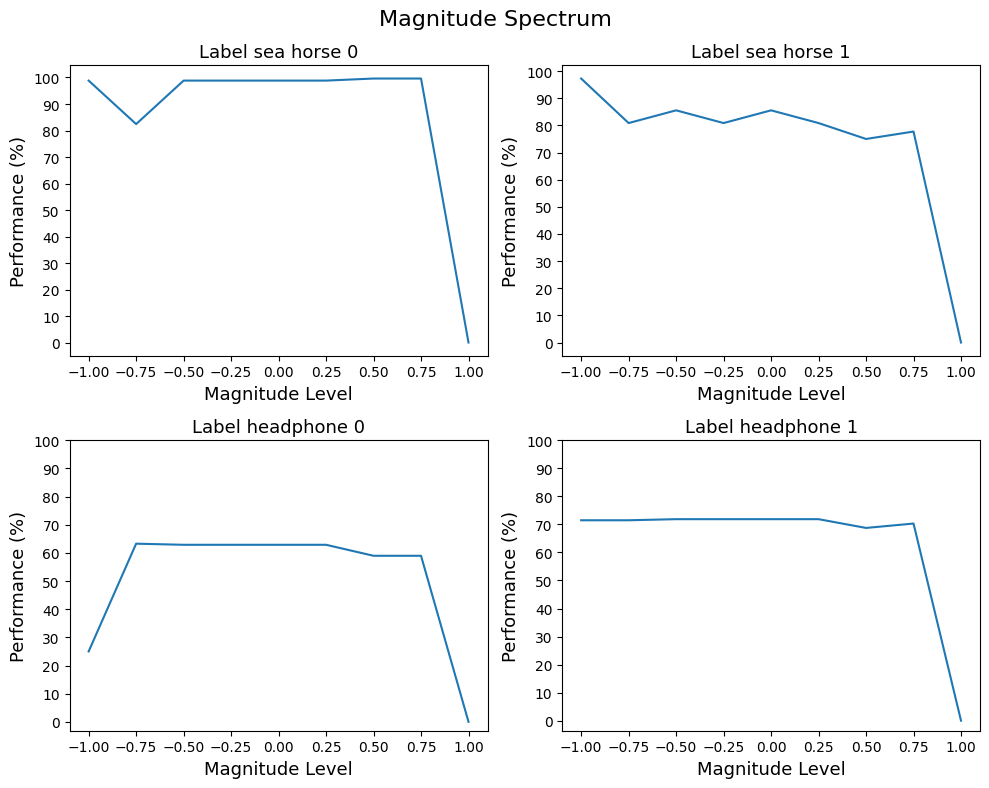

In [19]:
magnitude_gaps = 0.25
magnitude_spectrum = np.arange(-1, 1 + magnitude_gaps, magnitude_gaps)

print("magnitude spectrum values: ", magnitude_spectrum)
print("length of magnitude spectrum: ", len(magnitude_spectrum))
print("length of binary inputs: ", len(binary_inputs))

# Separate the sparsity performace for each input
magnitudes_perf = {i: [] for i in range(len(binary_inputs))} 

for magnitude in magnitude_spectrum:
    for i, binary_input in enumerate(binary_inputs):
        # Get sparse pruned pattern
        magnitude_pruned_pattern = run_magnitude_pruning(weight, binary_inputs, noisy_inputs, magnitude, bias, show_plot=False)

        magnitude_pruned_pattern = magnitude_pruned_pattern[i]
        
        # Get pruning performance
        perf = pruning_performance(binary_input, magnitude_pruned_pattern)
        
        magnitudes_perf[i].append(perf)

def plot_magnitudes_spectrum(magnitudes_spectrum, magnitudes_perf, magnitudes_gaps, selected_labels, num_labels, num_images_per_label):
    num_rows = num_labels
    num_cols = num_images_per_label
    
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 4 * num_rows))
    fig.suptitle('Magnitude Spectrum', fontsize=16)
    
    # Ensure axs is always 2D
    if num_rows == 1 or num_cols == 1:
        axs = np.atleast_2d(axs).reshape(num_rows, num_cols)

    for i in range(num_rows):
        for j in range(num_cols):
            idx = i * num_cols + j
            performance = magnitudes_perf[idx]
            label = selected_labels[idx]
            axs[i, j].plot(magnitudes_spectrum, performance)
            axs[i, j].set_xlabel('Magnitude Level', fontsize=13)
            axs[i, j].set_ylabel('Performance (%)', fontsize=13)
            axs[i, j].set_yticks(range(0, 101, 10), fontsize=8)
            axs[i, j].set_title(f'Label {label} {j}', fontsize=13)
            axs[i, j].axis('on')
            axs[i, j].set_xticks(np.arange(-1, 1 + magnitudes_gaps, magnitudes_gaps), fontsize=6)

    plt.tight_layout()
    plt.savefig(f"./images/spectrum/magnitude_spectrum.png")
    plt.show()
    plt.close(fig)

plot_magnitudes_spectrum(magnitude_spectrum, magnitudes_perf, magnitude_gaps, selected_labels, num_labels, num_images_per_label)

In [20]:
def get_sparse_perf(binary_inputs, sparse_pruned_patterns, sparsities):
    sparse_perf = []
    
    for i in range(len(sparse_pruned_patterns)):
        for j in range(len(binary_inputs)):
            sparse_perf.append(pruning_performance(binary_inputs[j], sparse_pruned_patterns[sparsities[i]][j]))
    
    return sparse_perf

def get_magnitude_perf(binary_inputs, magnitude_pruned_patterns, magnitudes):
    """Get the performance of the magnitude pruning method at the mean and median values of th weight matrix"""
    magnitude_mean_perf = []
    magnitude_median_perf = []
    
    for i in range(len(magnitude_pruned_patterns)):
        for j in range(len(binary_inputs)):
            if i == 0:
                magnitude_median_perf.append(pruning_performance(binary_inputs[j], magnitude_pruned_patterns[magnitudes[i]][j]))
            else:
                magnitude_mean_perf.append(pruning_performance(binary_inputs[j], magnitude_pruned_patterns[magnitudes[i]][j]))
            # magnitude_perf.append(pruning_performance(binary_inputs[j], magnitude_pruned_patterns[magnitudes[i]][j]))
    return magnitude_median_perf, magnitude_mean_perf

def get_single_magnitude_perf(binary_inputs, magnitude_pruned_patterns, magnitudes):
    """Get the performance of the magnitude pruning method at a single magnitude value"""
    magnitude_perf = []
    
    for i in range(len(magnitude_pruned_patterns)):
        for j in range(len(binary_inputs)):
            magnitude_perf.append(pruning_performance(binary_inputs[j], magnitude_pruned_patterns[magnitudes[i]][j]))
    return magnitude_perf

In [21]:
# # Get performances to compare and plot

# sparse_perf = get_sparse_perf(binary_inputs, sparse_pruned_patterns, sparsities)
# magnitude_median_perf, magnitude_mean_perf = get_magnitude_perf(binary_inputs, magnitude_pruned_patterns,magnitudes)

In [22]:
# def plot_performance(sparse_perf, magnitude_median_perf, magnitude_mean_perf) -> None:
#     """
#     Plot the performance of the pruning method
    
#     Args:
#         sparse_perf (list): List of performance values for sparse pruning
#         magnitude_median_perf (list): List of performance values for magnitude pruning with median threshold
#         magnitude_mean_perf (list): List of performance values for magnitude pruning with mean threshold
#     """
    
#     fig, ax = plt.subplots(figsize=(12, 6))
#     ax.plot(range(len(sparse_perf)), sparse_perf, label='Sparse Pruning')
#     ax.plot(range(len(magnitude_median_perf)), magnitude_median_perf, label='Magnitude Pruning (Median)')
#     ax.plot(range(len(magnitude_mean_perf)), magnitude_mean_perf, label='Magnitude Pruning (Mean)')
#     ax.set_xlabel('Label Index')
#     ax.set_ylabel('Percentage of Correct Pixels')
#     ax.set_title('Performance of Sparse and Magnitude Pruning')
#     ax.set_xticks(range(len(sparse_perf)))
#     ax.legend(loc='upper right')
#     plt.show()

# # Idea:
# # TODO: mean line with std bars for each sparsity and magnitude (overlay these graphs together or separate?)
# # Bar plots?
# # Box and whisker plots?

# plot_performance(sparse_perf, magnitude_median_perf, magnitude_mean_perf)

# mean_sparse_perf = np.mean(sparse_perf)
# std_sparse_perf = np.std(sparse_perf)

# # mean_magnitude_perf = np.mean(magnitude_perf)
# # std_magnitude_perf = np.std(magnitude_perf)

# # Magnitude median threshold
# mean_magnitude_median_perf = np.mean(magnitude_median_perf)
# std_magnitude_median_perf = np.std(magnitude_median_perf)

# # plot the box plot of the magnitude median pruning performance

# # Magnitude mean threshold
# mean_magnitude_mean_perf = np.mean(magnitude_mean_perf)
# std_magnitude_mean_perf = np.std(magnitude_mean_perf)

# print("Sparsity: ", sparsities)
# print("Magnitude threshold: ", magnitudes)
# print()

# print("Average sparse pruning performance: ", mean_sparse_perf)
# print("Average magnitude median pruning performance: ", mean_magnitude_median_perf)
# print("Average magnitude mean pruning performance: ", mean_magnitude_mean_perf)
# print()

# print("Standard deviation sparse pruning performance: ", std_sparse_perf)
# print("Standard deviation magnitude median pruning performance: ", std_magnitude_median_perf)
# print("Standard deviation magnitude mean pruning performance: ", std_magnitude_mean_perf)

Running trial with a sparsity of 10
energy values for noisy input 0 [tensor(-10124.), tensor(-10124.)]
energy values for noisy input 1 [tensor(-10124.), tensor(-10124.), tensor(-10240.7500), tensor(-11419.), tensor(-11428.5000), tensor(-11448.5000), tensor(-11448.5000)]
energy values for noisy input 2 [tensor(-10124.), tensor(-10124.), tensor(-10240.7500), tensor(-11419.), tensor(-11428.5000), tensor(-11448.5000), tensor(-11448.5000), tensor(-11067.7500), tensor(-11448.5000), tensor(-11448.5000)]
energy values for noisy input 3 [tensor(-10124.), tensor(-10124.), tensor(-10240.7500), tensor(-11419.), tensor(-11428.5000), tensor(-11448.5000), tensor(-11448.5000), tensor(-11067.7500), tensor(-11448.5000), tensor(-11448.5000), tensor(-11448.5000), tensor(-11448.5000)]
energy values for noisy input 4 [tensor(-10124.), tensor(-10124.), tensor(-10240.7500), tensor(-11419.), tensor(-11428.5000), tensor(-11448.5000), tensor(-11448.5000), tensor(-11067.7500), tensor(-11448.5000), tensor(-11448.5

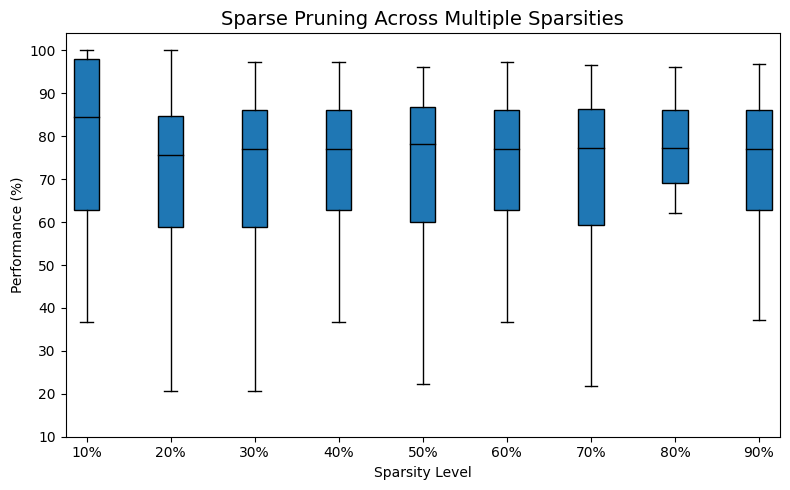

In [23]:
# Box plot: Sparse pruning comparison

pruning_methods = ['Sparse Pruning']
sparsity_interval = 10
sparsities = list(range(10, 100, sparsity_interval))
groups = [
    {pruning_method: [] for pruning_method in pruning_methods} for _ in range(len(sparsities))
]

sparse_pruned_patterns = compare_sparse_pruning(weight, binary_inputs, noisy_inputs, sparsities, bias, show_plot=False)

# Get list of tuples of sparsities and pruned patterns
sparse_pruned_patterns_list = list(sparse_pruned_patterns.items())
for i in range(len(sparsities)):
    # Get the specific sparsity with its sparse pruned pattern
    sparsity, pruned_pattern = sparse_pruned_patterns_list[i]
    sparse_pruned_pat = {sparsity: pruned_pattern}
    
    sparse_perf = get_sparse_perf(binary_inputs, sparse_pruned_pat, [sparsities[i]])
    print("sparse perf for sparsity: ", sparsity, sparse_perf)
    groups[i]['Sparse Pruning'] = sparse_perf

labels = [f"{sparsity}%" for sparsity in sparsities]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 5))

# Create the grouped boxplot
for i, group in enumerate(groups):
    positions = np.arange(len(pruning_methods)) + i * (len(pruning_methods) + 1)
    box_data = [group[method] for method in pruning_methods]
    
    box = ax.boxplot(box_data, positions=positions, patch_artist=True, widths=0.6)
    
    # Show the median
    for median in box['medians']:
        median.set_color('black')

# Set the labels for the x-axis
ax.set_xticklabels(labels, fontsize=10)
ax.set_yticks(np.arange(10, 101, 10))

# Set the labels for the boxplot
ax.set_xlabel('Sparsity Level', fontsize=10)
ax.set_ylabel('Performance (%)', fontsize=10)
ax.set_title('Sparse Pruning Across Multiple Sparsities', fontsize=14)

# Show the plot
plt.tight_layout()
plt.savefig(f"./images/comparison/sparse_pruning_comparison.png")
plt.show()
plt.close(fig)

Running trial with a magnitude of -1.00
energy values for noisy input 0 [tensor(-9774.5000), tensor(-10765.5000), tensor(-10850.5000), tensor(-10850.5000)]
energy values for noisy input 1 [tensor(-9774.5000), tensor(-10765.5000), tensor(-10850.5000), tensor(-10850.5000), tensor(-9235.5000), tensor(-9470.5000), tensor(-9470.5000)]
energy values for noisy input 2 [tensor(-9774.5000), tensor(-10765.5000), tensor(-10850.5000), tensor(-10850.5000), tensor(-9235.5000), tensor(-9470.5000), tensor(-9470.5000), tensor(-8436.5000), tensor(-9470.5000), tensor(-9470.5000)]
energy values for noisy input 3 [tensor(-9774.5000), tensor(-10765.5000), tensor(-10850.5000), tensor(-10850.5000), tensor(-9235.5000), tensor(-9470.5000), tensor(-9470.5000), tensor(-8436.5000), tensor(-9470.5000), tensor(-9470.5000), tensor(-10850.5000), tensor(-10850.5000)]
energy values for noisy input 4 [tensor(-9774.5000), tensor(-10765.5000), tensor(-10850.5000), tensor(-10850.5000), tensor(-9235.5000), tensor(-9470.5000)

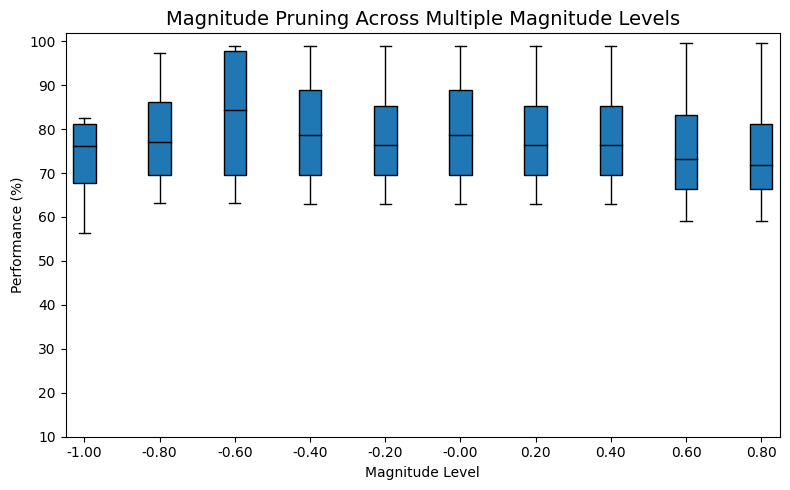

In [24]:
# Box plot: Magnitude pruning comparison

pruning_methods = ['Magnitude Pruning']
magnitude_gaps = 0.2
magnitudes = np.arange(-1, 1, magnitude_gaps)
groups = [
    {pruning_method: [] for pruning_method in pruning_methods} for _ in range(len(magnitudes))
]

magnitude_pruned_patterns = compare_magnitude_pruning(weight, binary_inputs, noisy_inputs, magnitudes, bias, show_plot=False)

# Get list of tuples of sparsities and pruned patterns
magnitude_pruned_patterns_list = list(magnitude_pruned_patterns.items())

for i in range(len(magnitudes)):
    # Get the specific sparsity with its sparse pruned pattern
    magnitude, pruned_pattern = magnitude_pruned_patterns_list[i]
    magn_pruned_pat = {magnitude: pruned_pattern}
    
    magnitude_perf = get_single_magnitude_perf(binary_inputs, magn_pruned_pat, [magnitudes[i]])
    print("magnitude perf at magnitude: ", magnitude, magnitude_perf)
    groups[i]['Magnitude Pruning'] = magnitude_perf

labels = [f"{magnitude:.2f}" for magnitude in magnitudes]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 5))

# Create the grouped boxplot
for i, group in enumerate(groups):
    positions = np.arange(len(pruning_methods)) + i * (len(pruning_methods) + 1)
    box_data = [group[method] for method in pruning_methods]
    
    box = ax.boxplot(box_data, positions=positions, patch_artist=True, widths=0.6)
    
    # Show the median
    for median in box['medians']:
        median.set_color('black')

# Set the labels for the x-axis
ax.set_xticklabels(labels, fontsize=10)
ax.set_yticks(np.arange(10, 101, 10), fontsize=10)

# Set the labels for the boxplot
ax.set_xlabel('Magnitude Level', fontsize=10)
ax.set_ylabel('Performance (%)', fontsize=10)
ax.set_title('Magnitude Pruning Across Multiple Magnitude Levels', fontsize=14)

# Show the plot
plt.tight_layout()
plt.savefig(f"./images/comparison/magnitude_pruning_comparison.png")
plt.show()
plt.close(fig)

energy values for noisy input 0 [tensor(-9215.), tensor(-9531.5000), tensor(-9552.5000), tensor(-9558.), tensor(-9558.)]
energy values for noisy input 1 [tensor(-9215.), tensor(-9531.5000), tensor(-9552.5000), tensor(-9558.), tensor(-9558.), tensor(-9064.2500), tensor(-9534.5000), tensor(-9558.), tensor(-9558.)]
energy values for noisy input 2 [tensor(-9215.), tensor(-9531.5000), tensor(-9552.5000), tensor(-9558.), tensor(-9558.), tensor(-9064.2500), tensor(-9534.5000), tensor(-9558.), tensor(-9558.), tensor(-9430.), tensor(-9558.), tensor(-9558.)]
energy values for noisy input 3 [tensor(-9215.), tensor(-9531.5000), tensor(-9552.5000), tensor(-9558.), tensor(-9558.), tensor(-9064.2500), tensor(-9534.5000), tensor(-9558.), tensor(-9558.), tensor(-9430.), tensor(-9558.), tensor(-9558.), tensor(-9558.), tensor(-9558.)]
energy values for noisy input 0 [tensor(-7877.5000), tensor(-7877.5000)]
energy values for noisy input 1 [tensor(-7877.5000), tensor(-7877.5000), tensor(-7671.5000), tensor

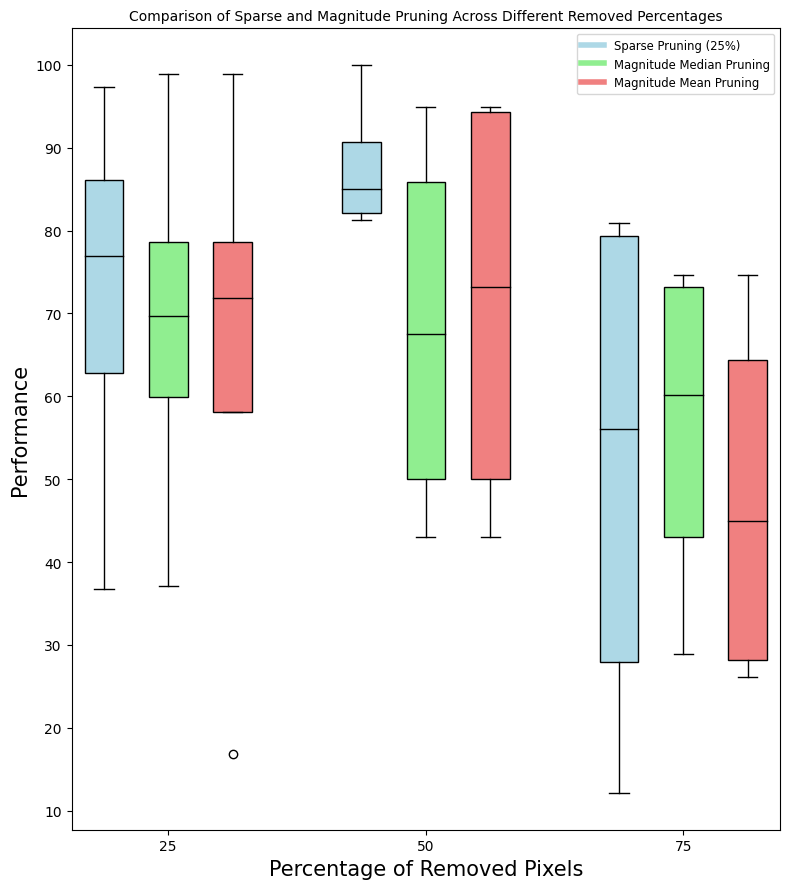

In [31]:
"""
ideas for the groups:
    1. 25% intervals of removed percentages -> the performance of the pruning over different removed percentages
    2. gaps of sparsity values?
        need a good base line
    3. gaps of magnitude values?
        need a good base line
"""

removed_percents_interval = 25
removed_percents = list(range(removed_percents_interval, 100, removed_percents_interval))

pruning_methods = ['Sparse Pruning (25%)', 'Magnitude Median Pruning', 'Magnitude Mean Pruning']
groups = [
    {pruning_method: [] for pruning_method in pruning_methods} for _ in range(len(removed_percents))
]

noisy_inputs = []

# Get noisy inputs
for i in range(len(binary_inputs)):
    for j in range(len(removed_percents)):
        noisy_inputs.append(flip_pixels(binary_inputs[i], removed_percents[j]))

sparsity = 25
magnitudes = [weight_val_median, weight_val_mean]

for i in range(len(removed_percents)):
    # for each interval of binary_input, get the noisy_inputs of that size
    noisy_group = noisy_inputs[i * len(binary_inputs) : (i + 1) * len(binary_inputs)]
    
    # Get the sparse pruned pattern
    sparse_pruned_pat = run_sparse_pruning(weight, binary_inputs, noisy_group, sparsity, bias, show_plot=False)
    sparse_pruned_pat = {sparsity: sparse_pruned_pat}
    sparse_perf = get_sparse_perf(binary_inputs, sparse_pruned_pat, [sparsity])
    groups[i]['Sparse Pruning (25%)'] = sparse_perf
    
    # Get the magnitude median pruned pattern
    magn_median_pruned_pat = run_magnitude_pruning(weight, binary_inputs, noisy_group, magnitudes[0], bias, show_plot=False)
    magn_pruned_pat = {magnitudes[0]: magn_median_pruned_pat}
    magn_perf = get = get_single_magnitude_perf(binary_inputs, magn_pruned_pat, [magnitudes[0]])
    groups[i]['Magnitude Median Pruning'] = magn_perf
    
    # Get the magnitude mean pruned pattern
    magn_mean_pruned_pat = run_magnitude_pruning(weight, binary_inputs, noisy_group, magnitudes[1], bias, show_plot=False)
    magn_pruned_pat = {magnitudes[1]: magn_mean_pruned_pat}
    magn_perf = get_single_magnitude_perf(binary_inputs, magn_pruned_pat, [magnitudes[1]])
    groups[i]['Magnitude Mean Pruning'] = magn_perf

labels = [f"{percent}" for percent in removed_percents]
colors = ['lightblue', 'lightgreen', 'lightcoral']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 9))

# Create the grouped boxplot
for i, group in enumerate(groups):
    # Create a boxplot for each pruning method in the group
    positions = np.arange(len(pruning_methods)) + i * (len(pruning_methods) + 1)
    box_data = [group[method] for method in pruning_methods]
    
    box = ax.boxplot(box_data, positions=positions, widths=0.6, patch_artist=True)
    
    # Set colors
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)
    for median in box['medians']:
        median.set_color('black')

# Set the labels for the x-axis
ax.set_xticks(np.arange(len(labels)) * (len(pruning_methods) + 1) + 1, fontsize=15)
ax.set_xticklabels(labels)
ax.set_yticks(np.arange(10, 101, 10))

# Set the labels for the boxplot
ax.set_xlabel('Percentage of Removed Pixels', fontsize=15)
ax.set_ylabel('Performance', fontsize=15)
ax.set_title('Comparison of Sparse and Magnitude Pruning Across Different Removed Percentages', fontsize=10)

# Create a legend
handles = [plt.Line2D([0], [0], color=color, lw=4) for color in colors]
ax.legend(handles, pruning_methods, loc='upper right', fontsize='small')

# Show the plot
plt.tight_layout()
plt.savefig(f"./images/comparison/comparison_removed_percents.png")
plt.show()
plt.close(fig)